# U4 - Abdullah Barhoum (5041774) - Katharina Müller (5284090)

# Assignment 4: Hough Transform

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color, filters
import numpy as np
from skimage.draw import line
import math 
from collections import defaultdict
import cv2

In [2]:
lane1 = io.imread('images/lane_detection/f00000.png')
lane2 = io.imread('images/lane_detection/f00050.png')
lane3 = io.imread('images/lane_detection/f00090.png')

eye1 = io.imread('images/eye_tracking/0000.jpeg')
eye2 = io.imread('images/eye_tracking/0050.jpeg')
eye3 = io.imread('images/eye_tracking/0090.jpeg')

#fig = plt.figure(figsize=(15, 10))
#ax11 = plt.subplot(2, 3, 1)
#ax12 = plt.subplot(2, 3, 2)
#ax13 = plt.subplot(2, 3, 3)
#ax21 = plt.subplot(2, 3, 4)
#ax22 = plt.subplot(2, 3, 5)
#ax23 = plt.subplot(2, 3, 6)



#ax11.imshow(lane1)
#ax12.imshow(lane2)
#ax13.imshow(lane3)

#ax21.imshow(eye1)
#ax22.imshow(eye2)
#ax23.imshow(eye3)


## Ex. 4.1 Detect lanes and eyes

* there are two datasets available: "images/eye_tracking" and "images/lane_detection" - decide for one of them
* implement the classical Hough Transform for lines (for lane detection) **OR** circles (eye tracking) as shown in the lecture
* use a Canny edge detector to produce edge images for the sequence of images

## OPTION 2: circle detection for eye detection
* use your implementation of the Hough Transform to find the 10 strongest circles in the image
* display your result set (draw those circles on the image) (**RESULT**)
* can you improve the performance by limiting the space of solutions? implement and draw circles again! (**BONUS**)

For each A[a,b,r] = 0;
Process the filtering algorithm on image Gaussian Blurring, convert the image to grayscale ( grayScaling), make Canny operator, The Canny operator gives the edges on image.
Vote the all possible circles in accumulator.
The local maximum voted circles of Accumulator A gives the circle Hough space.
The maximum voted circle of Accumulator gives the circle.
Accumulator array should be A[x,y,r] in the 3D space. Voting should be for each pixels, radius and theta A[x,y,r] += 1

In [3]:
circle_image = io.imread('images/eye_tracking/0090.jpeg', 0)
img_gray = color.rgb2gray(circle_image)
plt.imshow(img_gray, cmap = plt.cm.gray)
img_gray.shape


(480, 720)

(170, 210)

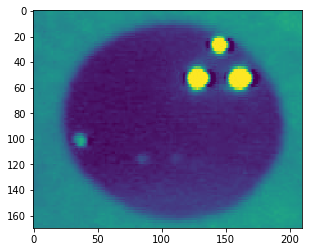

In [4]:
#crop_img = img_gray[200:450, 150:550]
crop_img = img_gray[240:410, 240:450]
plt.imshow(crop_img)
crop_img.shape

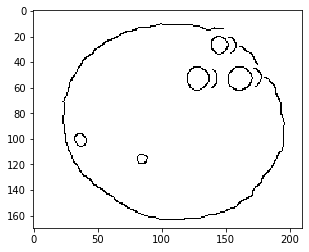

In [5]:
strong = filters.gaussian(crop_img, sigma=1.5)
edges = feature.canny(strong, sigma=0.5)
plt.imshow(edges, cmap = 'binary')

In [6]:
# list of all true values ->3179
my_list = []
for i, value in enumerate (edges.reshape(-1)):
    if value != False:
        my_list.append(i)
    continue
len(my_list)

861

In [7]:
h = int(edges.shape[0]) #480
print(h)
w = int(edges.shape[1]) #720
print(w)
r_range = round(math.sqrt(w**2 + h**2)/2)
print(r_range)
A = np.zeros((w,h,r_range))

radii = [50, 55,60,65,70] #try these values
degrees =[0,25,50,75,100,125,150,175,200,225,250,275,300,325, 350, 360]

170
210
135


In [8]:
# voting: 
def voting (img):
    for y in range(0, w):
        for x in range(0, h):    
            for r in range(30,r_range):    #radius
                for t in degrees: #thata
                    #if img[x][y] != False:
                    print(x)
                    print(y)
                    a = int(x - r * math.cos(t * math.pi / 180));
                    b = int(y - r * math.sin(t * math.pi / 180));                
                    print(a)
                    print(b)
                    print(r)
                    A[a,b,r] +=1;
    return A

In [9]:
res = voting(edges)
res.shape()

0
0
-30
0
30
0
0
-27
-12
30
0
0
-19
-22
30
0
0
-7
-28
30
0
0
5
-29
30
0
0
17
-24
30
0
0
25
-14
30
0
0
29
-2
30
0
0
28
10
30
0
0
21
21
30
0
0
10
28
30
0
0
-2
29
30
0
0
-15
25
30
0
0
-24
17
30
0
0
-29
5
30
0
0
-30
0
30
0
0
-31
0
31
0
0
-28
-13
31
0
0
-19
-23
31
0
0
-8
-29
31
0
0
5
-30
31
0
0
17
-25
31
0
0
26
-15
31
0
0
30
-2
31
0
0
29
10
31
0
0
21
21
31
0
0
10
29
31
0
0
-2
30
31
0
0
-15
26
31
0
0
-25
17
31
0
0
-30
5
31
0
0
-31
0
31
0
0
-32
0
32
0
0
-29
-13
32
0
0
-20
-24
32
0
0
-8
-30
32
0
0
5
-31
32
0
0
18
-26
32
0
0
27
-15
32
0
0
31
-2
32
0
0
30
10
32
0
0
22
22
32
0
0
10
30
32
0
0
-2
31
32
0
0
-16
27
32
0
0
-26
18
32
0
0
-31
5
32
0
0
-32
0
32
0
0
-33
0
33
0
0
-29
-13
33
0
0
-21
-25
33
0
0
-8
-31
33
0
0
5
-32
33
0
0
18
-27
33
0
0
28
-16
33
0
0
32
-2
33
0
0
31
11
33
0
0
23
23
33
0
0
11
31
33
0
0
-2
32
33
0
0
-16
28
33
0
0
-27
18
33
0
0
-32
5
33
0
0
-33
0
33
0
0
-34
0
34
0
0
-30
-14
34
0
0
-21
-26
34
0
0
-8
-32
34
0
0
5
-33
34
0
0
19
-27
34
0
0
29
-16
34
0
0
33
-2
34
0
0
31
11
34
0
0
24
2

0
100
0
0
-101
0
101
0
0
-91
-42
101
0
0
-64
-77
101
0
0
-26
-97
101
0
0
17
-99
101
0
0
57
-82
101
0
0
87
-50
101
0
0
100
-8
101
0
0
94
34
101
0
0
71
71
101
0
0
34
94
101
0
0
-8
100
101
0
0
-50
87
101
0
0
-82
57
101
0
0
-99
17
101
0
0
-101
0
101
0
0
-102
0
102
0
0
-92
-43
102
0
0
-65
-78
102
0
0
-26
-98
102
0
0
17
-100
102
0
0
58
-83
102
0
0
88
-50
102
0
0
101
-8
102
0
0
95
34
102
0
0
72
72
102
0
0
34
95
102
0
0
-8
101
102
0
0
-51
88
102
0
0
-83
58
102
0
0
-100
17
102
0
0
-102
0
102
0
0
-103
0
103
0
0
-93
-43
103
0
0
-66
-78
103
0
0
-26
-99
103
0
0
17
-101
103
0
0
59
-84
103
0
0
89
-51
103
0
0
102
-8
103
0
0
96
35
103
0
0
72
72
103
0
0
35
96
103
0
0
-8
102
103
0
0
-51
89
103
0
0
-84
59
103
0
0
-101
17
103
0
0
-103
0
103
0
0
-104
0
104
0
0
-94
-43
104
0
0
-66
-79
104
0
0
-26
-100
104
0
0
18
-102
104
0
0
59
-85
104
0
0
90
-51
104
0
0
103
-9
104
0
0
97
35
104
0
0
73
73
104
0
0
35
97
104
0
0
-9
103
104
0
0
-52
90
104
0
0
-85
59
104
0
0
-102
18
104
0
0
-104
0
104
0
0
-105
0
105
0
0
-95
-44


-26
32
1
0
28
-15
32
1
0
32
-2
32
1
0
31
10
32
1
0
23
22
32
1
0
11
30
32
1
0
-1
31
32
1
0
-15
27
32
1
0
-25
18
32
1
0
-30
5
32
1
0
-31
0
32
1
0
-32
0
33
1
0
-28
-13
33
1
0
-20
-25
33
1
0
-7
-31
33
1
0
6
-32
33
1
0
19
-27
33
1
0
29
-16
33
1
0
33
-2
33
1
0
32
11
33
1
0
24
23
33
1
0
12
31
33
1
0
-1
32
33
1
0
-15
28
33
1
0
-26
18
33
1
0
-31
5
33
1
0
-32
0
33
1
0
-33
0
34
1
0
-29
-14
34
1
0
-20
-26
34
1
0
-7
-32
34
1
0
6
-33
34
1
0
20
-27
34
1
0
30
-16
34
1
0
34
-2
34
1
0
32
11
34
1
0
25
24
34
1
0
12
31
34
1
0
-1
33
34
1
0
-16
29
34
1
0
-26
19
34
1
0
-32
5
34
1
0
-33
0
34
1
0
-34
0
35
1
0
-30
-14
35
1
0
-21
-26
35
1
0
-8
-33
35
1
0
7
-34
35
1
0
21
-28
35
1
0
31
-17
35
1
0
35
-3
35
1
0
33
11
35
1
0
25
24
35
1
0
12
32
35
1
0
-2
34
35
1
0
-16
30
35
1
0
-27
20
35
1
0
-33
6
35
1
0
-34
0
35
1
0
-35
0
36
1
0
-31
-15
36
1
0
-22
-27
36
1
0
-8
-34
36
1
0
7
-35
36
1
0
21
-29
36
1
0
32
-17
36
1
0
36
-3
36
1
0
34
12
36
1
0
26
25
36
1
0
13
33
36
1
0
-2
35
36
1
0
-17
31
36
1
0
-28
20
36
1
0
-34
6
36
1
0
-

0
-43
-53
70
1
0
-17
-67
70
1
0
13
-68
70
1
0
41
-57
70
1
0
61
-34
70
1
0
70
-6
70
1
0
66
23
70
1
0
50
49
70
1
0
24
65
70
1
0
-5
69
70
1
0
-34
60
70
1
0
-56
40
70
1
0
-67
12
70
1
0
-69
0
70
1
0
-70
0
71
1
0
-63
-30
71
1
0
-44
-54
71
1
0
-17
-68
71
1
0
13
-69
71
1
0
41
-58
71
1
0
62
-35
71
1
0
71
-6
71
1
0
67
24
71
1
0
51
50
71
1
0
25
66
71
1
0
-5
70
71
1
0
-34
61
71
1
0
-57
40
71
1
0
-68
12
71
1
0
-70
0
71
1
0
-71
0
72
1
0
-64
-30
72
1
0
-45
-55
72
1
0
-17
-69
72
1
0
13
-70
72
1
0
42
-58
72
1
0
63
-35
72
1
0
72
-6
72
1
0
68
24
72
1
0
51
50
72
1
0
25
67
72
1
0
-5
71
72
1
0
-35
62
72
1
0
-57
41
72
1
0
-69
12
72
1
0
-71
0
72
1
0
-72
0
73
1
0
-65
-30
73
1
0
-45
-55
73
1
0
-17
-70
73
1
0
13
-71
73
1
0
42
-59
73
1
0
64
-36
73
1
0
73
-6
73
1
0
69
24
73
1
0
52
51
73
1
0
25
68
73
1
0
-5
72
73
1
0
-35
63
73
1
0
-58
41
73
1
0
-70
12
73
1
0
-72
0
73
1
0
-73
0
74
1
0
-66
-31
74
1
0
-46
-56
74
1
0
-18
-71
74
1
0
13
-72
74
1
0
43
-60
74
1
0
65
-36
74
1
0
74
-6
74
1
0
70
25
74
1
0
53
52
74
1
0
26
69
7

0
112
1
0
-100
-47
112
1
0
-70
-85
112
1
0
-27
-108
112
1
0
20
-110
112
1
0
65
-91
112
1
0
97
-55
112
1
0
112
-9
112
1
0
106
38
112
1
0
80
79
112
1
0
39
105
112
1
0
-8
111
112
1
0
-55
96
112
1
0
-90
64
112
1
0
-109
19
112
1
0
-111
0
112
1
0
-112
0
113
1
0
-101
-47
113
1
0
-71
-86
113
1
0
-28
-109
113
1
0
20
-111
113
1
0
65
-92
113
1
0
98
-56
113
1
0
113
-9
113
1
0
107
38
113
1
0
80
79
113
1
0
39
106
113
1
0
-8
112
113
1
0
-55
97
113
1
0
-91
64
113
1
0
-110
19
113
1
0
-112
0
113
1
0
-113
0
114
1
0
-102
-48
114
1
0
-72
-87
114
1
0
-28
-110
114
1
0
20
-112
114
1
0
66
-93
114
1
0
99
-56
114
1
0
114
-9
114
1
0
108
38
114
1
0
81
80
114
1
0
39
107
114
1
0
-8
113
114
1
0
-56
98
114
1
0
-92
65
114
1
0
-111
19
114
1
0
-113
0
114
1
0
-114
0
115
1
0
-103
-48
115
1
0
-72
-88
115
1
0
-28
-111
115
1
0
20
-113
115
1
0
66
-94
115
1
0
100
-57
115
1
0
115
-10
115
1
0
109
39
115
1
0
82
81
115
1
0
40
108
115
1
0
-9
114
115
1
0
-56
99
115
1
0
-93
65
115
1
0
-112
19
115
1
0
-114
0
115
1
0
-115
0
116
1
0
-104

38
41
2
0
-1
40
41
2
0
-18
35
41
2
0
-31
23
41
2
0
-38
7
41
2
0
-39
0
41
2
0
-40
0
42
2
0
-36
-17
42
2
0
-24
-32
42
2
0
-8
-40
42
2
0
9
-41
42
2
0
26
-34
42
2
0
38
-20
42
2
0
43
-3
42
2
0
41
14
42
2
0
31
29
42
2
0
16
39
42
2
0
-1
41
42
2
0
-19
36
42
2
0
-32
24
42
2
0
-39
7
42
2
0
-40
0
42
2
0
-41
0
43
2
0
-36
-18
43
2
0
-25
-32
43
2
0
-9
-41
43
2
0
9
-42
43
2
0
26
-35
43
2
0
39
-21
43
2
0
44
-3
43
2
0
42
14
43
2
0
32
30
43
2
0
16
40
43
2
0
-1
42
43
2
0
-19
37
43
2
0
-33
24
43
2
0
-40
7
43
2
0
-41
0
43
2
0
-42
0
44
2
0
-37
-18
44
2
0
-26
-33
44
2
0
-9
-42
44
2
0
9
-43
44
2
0
27
-36
44
2
0
40
-21
44
2
0
45
-3
44
2
0
43
15
44
2
0
33
31
44
2
0
17
41
44
2
0
-1
43
44
2
0
-20
38
44
2
0
-34
25
44
2
0
-41
7
44
2
0
-42
0
44
2
0
-43
0
45
2
0
-38
-19
45
2
0
-26
-34
45
2
0
-9
-43
45
2
0
9
-44
45
2
0
27
-36
45
2
0
40
-22
45
2
0
46
-3
45
2
0
44
15
45
2
0
33
31
45
2
0
17
42
45
2
0
-1
44
45
2
0
-20
38
45
2
0
-34
25
45
2
0
-42
7
45
2
0
-43
0
45
2
0
-44
0
46
2
0
-39
-19
46
2
0
-27
-35
46
2
0
-9
-44
46
2


-82
85
2
0
16
-83
85
2
0
50
-69
85
2
0
75
-42
85
2
0
86
-7
85
2
0
81
29
85
2
0
62
60
85
2
0
31
79
85
2
0
-5
84
85
2
0
-40
73
85
2
0
-67
48
85
2
0
-81
14
85
2
0
-83
0
85
2
0
-84
0
86
2
0
-75
-36
86
2
0
-53
-65
86
2
0
-20
-83
86
2
0
16
-84
86
2
0
51
-70
86
2
0
76
-42
86
2
0
87
-7
86
2
0
82
29
86
2
0
62
60
86
2
0
31
80
86
2
0
-5
85
86
2
0
-41
74
86
2
0
-68
49
86
2
0
-82
14
86
2
0
-84
0
86
2
0
-85
0
87
2
0
-76
-36
87
2
0
-53
-66
87
2
0
-20
-84
87
2
0
17
-85
87
2
0
51
-71
87
2
0
77
-43
87
2
0
88
-7
87
2
0
83
29
87
2
0
63
61
87
2
0
31
81
87
2
0
-5
86
87
2
0
-41
75
87
2
0
-69
49
87
2
0
-83
15
87
2
0
-85
0
87
2
0
-86
0
88
2
0
-77
-37
88
2
0
-54
-67
88
2
0
-20
-85
88
2
0
17
-86
88
2
0
52
-72
88
2
0
78
-43
88
2
0
89
-7
88
2
0
84
30
88
2
0
64
62
88
2
0
32
82
88
2
0
-5
87
88
2
0
-42
76
88
2
0
-70
50
88
2
0
-84
15
88
2
0
-86
0
88
2
0
-87
0
89
2
0
-78
-37
89
2
0
-55
-68
89
2
0
-21
-85
89
2
0
17
-87
89
2
0
53
-72
89
2
0
79
-44
89
2
0
90
-7
89
2
0
85
30
89
2
0
64
62
89
2
0
32
83
89
2
0
-5
88
89
2
0
-4

0
-109
-51
123
2
0
-77
-94
123
2
0
-29
-118
123
2
0
23
-121
123
2
0
72
-100
123
2
0
108
-61
123
2
0
124
-10
123
2
0
117
42
123
2
0
88
86
123
2
0
44
115
123
2
0
-8
122
123
2
0
-59
106
123
2
0
-98
70
123
2
0
-119
21
123
2
0
-121
0
123
2
0
-122
0
124
2
0
-110
-52
124
2
0
-77
-94
124
2
0
-30
-119
124
2
0
23
-122
124
2
0
73
-101
124
2
0
109
-61
124
2
0
125
-10
124
2
0
118
42
124
2
0
89
87
124
2
0
44
116
124
2
0
-8
123
124
2
0
-60
107
124
2
0
-99
71
124
2
0
-120
21
124
2
0
-122
0
124
2
0
-123
0
125
2
0
-111
-52
125
2
0
-78
-95
125
2
0
-30
-120
125
2
0
23
-123
125
2
0
73
-102
125
2
0
110
-62
125
2
0
126
-10
125
2
0
119
42
125
2
0
90
88
125
2
0
44
117
125
2
0
-8
124
125
2
0
-60
108
125
2
0
-100
71
125
2
0
-121
21
125
2
0
-123
0
125
2
0
-124
0
126
2
0
-112
-53
126
2
0
-78
-96
126
2
0
-30
-121
126
2
0
23
-124
126
2
0
74
-103
126
2
0
111
-62
126
2
0
127
-10
126
2
0
120
43
126
2
0
91
89
126
2
0
45
118
126
2
0
-8
125
126
2
0
-61
109
126
2
0
-101
72
126
2
0
-122
21
126
2
0
-124
0
126
2
0
-125
0
127


0
22
52
56
3
0
-1
55
56
3
0
-25
48
56
3
0
-42
32
56
3
0
-52
9
56
3
0
-53
0
56
3
0
-54
0
57
3
0
-48
-24
57
3
0
-33
-43
57
3
0
-11
-55
57
3
0
12
-56
57
3
0
35
-46
57
3
0
52
-28
57
3
0
59
-4
57
3
0
56
19
57
3
0
43
40
57
3
0
22
53
57
3
0
-1
56
57
3
0
-25
49
57
3
0
-43
32
57
3
0
-53
9
57
3
0
-54
0
57
3
0
-55
0
58
3
0
-49
-24
58
3
0
-34
-44
58
3
0
-12
-56
58
3
0
13
-57
58
3
0
36
-47
58
3
0
53
-28
58
3
0
60
-5
58
3
0
57
19
58
3
0
44
41
58
3
0
22
54
58
3
0
-2
57
58
3
0
-26
50
58
3
0
-44
33
58
3
0
-54
10
58
3
0
-55
0
58
3
0
-56
0
59
3
0
-50
-24
59
3
0
-34
-45
59
3
0
-12
-56
59
3
0
13
-58
59
3
0
36
-48
59
3
0
54
-29
59
3
0
61
-5
59
3
0
58
20
59
3
0
44
41
59
3
0
23
55
59
3
0
-2
58
59
3
0
-26
51
59
3
0
-45
33
59
3
0
-55
10
59
3
0
-56
0
59
3
0
-57
0
60
3
0
-51
-25
60
3
0
-35
-45
60
3
0
-12
-57
60
3
0
13
-59
60
3
0
37
-49
60
3
0
54
-29
60
3
0
62
-5
60
3
0
59
20
60
3
0
45
42
60
3
0
23
56
60
3
0
-2
59
60
3
0
-27
51
60
3
0
-46
34
60
3
0
-56
10
60
3
0
-57
0
60
3
0
-58
0
61
3
0
-52
-25
61
3
0
-36
-46
61


3
0
-90
16
95
3
0
-92
0
95
3
0
-93
0
96
3
0
-84
-40
96
3
0
-58
-73
96
3
0
-21
-92
96
3
0
19
-94
96
3
0
58
-78
96
3
0
86
-47
96
3
0
98
-8
96
3
0
93
32
96
3
0
70
67
96
3
0
35
90
96
3
0
-5
95
96
3
0
-45
83
96
3
0
-75
55
96
3
0
-91
16
96
3
0
-93
0
96
3
0
-94
0
97
3
0
-84
-40
97
3
0
-59
-74
97
3
0
-22
-93
97
3
0
19
-95
97
3
0
58
-79
97
3
0
87
-48
97
3
0
99
-8
97
3
0
94
33
97
3
0
71
68
97
3
0
36
91
97
3
0
-5
96
97
3
0
-45
84
97
3
0
-76
55
97
3
0
-92
16
97
3
0
-94
0
97
3
0
-95
0
98
3
0
-85
-41
98
3
0
-59
-75
98
3
0
-22
-94
98
3
0
20
-96
98
3
0
59
-80
98
3
0
87
-48
98
3
0
100
-8
98
3
0
95
33
98
3
0
72
69
98
3
0
36
92
98
3
0
-5
97
98
3
0
-46
84
98
3
0
-77
56
98
3
0
-93
17
98
3
0
-95
0
98
3
0
-96
0
99
3
0
-86
-41
99
3
0
-60
-75
99
3
0
-22
-95
99
3
0
20
-97
99
3
0
59
-81
99
3
0
88
-49
99
3
0
101
-8
99
3
0
96
33
99
3
0
73
70
99
3
0
36
93
99
3
0
-5
98
99
3
0
-46
85
99
3
0
-78
56
99
3
0
-94
17
99
3
0
-96
0
99
3
0
-97
0
100
3
0
-87
-42
100
3
0
-61
-76
100
3
0
-22
-96
100
3
0
20
-98
100
3
0
60
-81
100

-25
-13
32
4
0
-16
-24
32
4
0
-4
-30
32
4
0
9
-31
32
4
0
22
-26
32
4
0
31
-15
32
4
0
35
-2
32
4
0
34
10
32
4
0
26
22
32
4
0
14
30
32
4
0
1
31
32
4
0
-12
27
32
4
0
-22
18
32
4
0
-27
5
32
4
0
-28
0
32
4
0
-29
0
33
4
0
-25
-13
33
4
0
-17
-25
33
4
0
-4
-31
33
4
0
9
-32
33
4
0
22
-27
33
4
0
32
-16
33
4
0
36
-2
33
4
0
35
11
33
4
0
27
23
33
4
0
15
31
33
4
0
1
32
33
4
0
-12
28
33
4
0
-23
18
33
4
0
-28
5
33
4
0
-29
0
33
4
0
-30
0
34
4
0
-26
-14
34
4
0
-17
-26
34
4
0
-4
-32
34
4
0
9
-33
34
4
0
23
-27
34
4
0
33
-16
34
4
0
37
-2
34
4
0
35
11
34
4
0
28
24
34
4
0
15
31
34
4
0
1
33
34
4
0
-13
29
34
4
0
-23
19
34
4
0
-29
5
34
4
0
-30
0
34
4
0
-31
0
35
4
0
-27
-14
35
4
0
-18
-26
35
4
0
-5
-33
35
4
0
10
-34
35
4
0
24
-28
35
4
0
34
-17
35
4
0
38
-3
35
4
0
36
11
35
4
0
28
24
35
4
0
15
32
35
4
0
0
34
35
4
0
-13
30
35
4
0
-24
20
35
4
0
-30
6
35
4
0
-31
0
35
4
0
-32
0
36
4
0
-28
-15
36
4
0
-19
-27
36
4
0
-5
-34
36
4
0
10
-35
36
4
0
24
-29
36
4
0
35
-17
36
4
0
39
-3
36
4
0
37
12
36
4
0
29
25
36
4
0
16
33
36
4

0
-5
104
105
4
0
-48
90
105
4
0
-82
60
105
4
0
-99
18
105
4
0
-101
0
105
4
0
-102
0
106
4
0
-92
-44
106
4
0
-64
-81
106
4
0
-23
-102
106
4
0
22
-104
106
4
0
64
-86
106
4
0
95
-52
106
4
0
109
-9
106
4
0
103
36
106
4
0
78
74
106
4
0
40
99
106
4
0
-5
105
106
4
0
-49
91
106
4
0
-82
60
106
4
0
-100
18
106
4
0
-102
0
106
4
0
-103
0
107
4
0
-92
-45
107
4
0
-64
-81
107
4
0
-23
-103
107
4
0
22
-105
107
4
0
65
-87
107
4
0
96
-53
107
4
0
110
-9
107
4
0
104
36
107
4
0
79
75
107
4
0
40
100
107
4
0
-5
106
107
4
0
-49
92
107
4
0
-83
61
107
4
0
-101
18
107
4
0
-103
0
107
4
0
-104
0
108
4
0
-93
-45
108
4
0
-65
-82
108
4
0
-23
-104
108
4
0
22
-106
108
4
0
65
-88
108
4
0
97
-53
108
4
0
111
-9
108
4
0
105
36
108
4
0
80
76
108
4
0
40
101
108
4
0
-5
107
108
4
0
-50
93
108
4
0
-84
61
108
4
0
-102
18
108
4
0
-104
0
108
4
0
-105
0
109
4
0
-94
-46
109
4
0
-66
-83
109
4
0
-24
-105
109
4
0
22
-107
109
4
0
66
-89
109
4
0
98
-54
109
4
0
112
-9
109
4
0
106
37
109
4
0
81
77
109
4
0
41
102
109
4
0
-5
108
109
4
0
-50
9

-3
38
5
0
40
12
38
5
0
31
26
38
5
0
17
35
38
5
0
1
37
38
5
0
-14
32
38
5
0
-26
21
38
5
0
-32
6
38
5
0
-33
0
38
5
0
-34
0
39
5
0
-30
-16
39
5
0
-20
-29
39
5
0
-5
-37
39
5
0
11
-38
39
5
0
27
-31
39
5
0
38
-19
39
5
0
43
-3
39
5
0
41
13
39
5
0
32
27
39
5
0
18
36
39
5
0
1
38
39
5
0
-14
33
39
5
0
-26
22
39
5
0
-33
6
39
5
0
-34
0
39
5
0
-35
0
40
5
0
-31
-16
40
5
0
-20
-30
40
5
0
-5
-38
40
5
0
11
-39
40
5
0
27
-32
40
5
0
39
-19
40
5
0
44
-3
40
5
0
42
13
40
5
0
33
28
40
5
0
18
37
40
5
0
1
39
40
5
0
-15
34
40
5
0
-27
22
40
5
0
-34
6
40
5
0
-35
0
40
5
0
-36
0
41
5
0
-32
-17
41
5
0
-21
-31
41
5
0
-5
-39
41
5
0
12
-40
41
5
0
28
-33
41
5
0
40
-20
41
5
0
45
-3
41
5
0
43
14
41
5
0
33
28
41
5
0
19
38
41
5
0
1
40
41
5
0
-15
35
41
5
0
-28
23
41
5
0
-35
7
41
5
0
-36
0
41
5
0
-37
0
42
5
0
-33
-17
42
5
0
-21
-32
42
5
0
-5
-40
42
5
0
12
-41
42
5
0
29
-34
42
5
0
41
-20
42
5
0
46
-3
42
5
0
44
14
42
5
0
34
29
42
5
0
19
39
42
5
0
1
41
42
5
0
-16
36
42
5
0
-29
24
42
5
0
-36
7
42
5
0
-37
0
42
5
0
-38
0
43
5
0
-33


0
82
77
110
5
0
42
103
110
5
0
-4
109
110
5
0
-50
95
110
5
0
-85
63
110
5
0
-103
19
110
5
0
-105
0
110
5
0
-106
0
111
5
0
-95
-46
111
5
0
-66
-85
111
5
0
-23
-107
111
5
0
24
-109
111
5
0
68
-90
111
5
0
101
-55
111
5
0
115
-9
111
5
0
109
37
111
5
0
83
78
111
5
0
42
104
111
5
0
-4
110
111
5
0
-50
96
111
5
0
-85
63
111
5
0
-104
19
111
5
0
-106
0
111
5
0
-107
0
112
5
0
-96
-47
112
5
0
-66
-85
112
5
0
-23
-108
112
5
0
24
-110
112
5
0
69
-91
112
5
0
101
-55
112
5
0
116
-9
112
5
0
110
38
112
5
0
84
79
112
5
0
43
105
112
5
0
-4
111
112
5
0
-51
96
112
5
0
-86
64
112
5
0
-105
19
112
5
0
-107
0
112
5
0
-108
0
113
5
0
-97
-47
113
5
0
-67
-86
113
5
0
-24
-109
113
5
0
24
-111
113
5
0
69
-92
113
5
0
102
-56
113
5
0
117
-9
113
5
0
111
38
113
5
0
84
79
113
5
0
43
106
113
5
0
-4
112
113
5
0
-51
97
113
5
0
-87
64
113
5
0
-106
19
113
5
0
-108
0
113
5
0
-109
0
114
5
0
-98
-48
114
5
0
-68
-87
114
5
0
-24
-110
114
5
0
24
-112
114
5
0
70
-93
114
5
0
103
-56
114
5
0
118
-9
114
5
0
112
38
114
5
0
85
80
114
5
0


48
6
0
-24
-36
48
6
0
-6
-46
48
6
0
14
-47
48
6
0
33
-39
48
6
0
47
-23
48
6
0
53
-4
48
6
0
51
16
48
6
0
39
33
48
6
0
22
45
48
6
0
1
47
48
6
0
-18
41
48
6
0
-33
27
48
6
0
-41
8
48
6
0
-42
0
48
6
0
-43
0
49
6
0
-38
-20
49
6
0
-25
-37
49
6
0
-6
-47
49
6
0
14
-48
49
6
0
34
-40
49
6
0
48
-24
49
6
0
54
-4
49
6
0
52
16
49
6
0
40
34
49
6
0
22
46
49
6
0
1
48
49
6
0
-18
42
49
6
0
-34
28
49
6
0
-42
8
49
6
0
-43
0
49
6
0
-44
0
50
6
0
-39
-21
50
6
0
-26
-38
50
6
0
-6
-48
50
6
0
14
-49
50
6
0
34
-40
50
6
0
49
-24
50
6
0
55
-4
50
6
0
52
17
50
6
0
41
35
50
6
0
23
46
50
6
0
1
49
50
6
0
-19
43
50
6
0
-34
28
50
6
0
-43
8
50
6
0
-44
0
50
6
0
-45
0
51
6
0
-40
-21
51
6
0
-26
-39
51
6
0
-7
-49
51
6
0
14
-50
51
6
0
35
-41
51
6
0
50
-25
51
6
0
56
-4
51
6
0
53
17
51
6
0
42
36
51
6
0
23
47
51
6
0
1
50
51
6
0
-19
44
51
6
0
-35
29
51
6
0
-44
8
51
6
0
-45
0
51
6
0
-46
0
52
6
0
-41
-21
52
6
0
-27
-39
52
6
0
-7
-50
52
6
0
15
-51
52
6
0
35
-42
52
6
0
51
-25
52
6
0
57
-4
52
6
0
54
17
52
6
0
42
36
52
6
0
23
48
52
6
0
1


125
6
0
-119
0
125
6
0
-120
0
126
6
0
-108
-53
126
6
0
-74
-96
126
6
0
-26
-121
126
6
0
27
-124
126
6
0
78
-103
126
6
0
115
-62
126
6
0
131
-10
126
6
0
124
43
126
6
0
95
89
126
6
0
49
118
126
6
0
-4
125
126
6
0
-57
109
126
6
0
-97
72
126
6
0
-118
21
126
6
0
-120
0
126
6
0
-121
0
127
6
0
-109
-53
127
6
0
-75
-97
127
6
0
-26
-122
127
6
0
28
-125
127
6
0
78
-104
127
6
0
115
-63
127
6
0
132
-11
127
6
0
125
43
127
6
0
95
89
127
6
0
49
119
127
6
0
-5
126
127
6
0
-57
109
127
6
0
-98
72
127
6
0
-119
22
127
6
0
-121
0
127
6
0
-122
0
128
6
0
-110
-54
128
6
0
-76
-98
128
6
0
-27
-123
128
6
0
28
-126
128
6
0
79
-104
128
6
0
116
-63
128
6
0
133
-11
128
6
0
126
43
128
6
0
96
90
128
6
0
49
120
128
6
0
-5
127
128
6
0
-58
110
128
6
0
-98
73
128
6
0
-120
22
128
6
0
-122
0
128
6
0
-123
0
129
6
0
-110
-54
129
6
0
-76
-98
129
6
0
-27
-124
129
6
0
28
-127
129
6
0
79
-105
129
6
0
117
-64
129
6
0
134
-11
129
6
0
127
44
129
6
0
97
91
129
6
0
50
121
129
6
0
-5
128
129
6
0
-58
111
129
6
0
-99
73
129
6
0
-121
22


0
-46
-24
59
7
0
-30
-45
59
7
0
-8
-56
59
7
0
17
-58
59
7
0
40
-48
59
7
0
58
-29
59
7
0
65
-5
59
7
0
62
20
59
7
0
48
41
59
7
0
27
55
59
7
0
1
58
59
7
0
-22
51
59
7
0
-41
33
59
7
0
-51
10
59
7
0
-52
0
59
7
0
-53
0
60
7
0
-47
-25
60
7
0
-31
-45
60
7
0
-8
-57
60
7
0
17
-59
60
7
0
41
-49
60
7
0
58
-29
60
7
0
66
-5
60
7
0
63
20
60
7
0
49
42
60
7
0
27
56
60
7
0
1
59
60
7
0
-23
51
60
7
0
-42
34
60
7
0
-52
10
60
7
0
-53
0
60
7
0
-54
0
61
7
0
-48
-25
61
7
0
-32
-46
61
7
0
-8
-58
61
7
0
17
-60
61
7
0
41
-49
61
7
0
59
-30
61
7
0
67
-5
61
7
0
64
20
61
7
0
50
43
61
7
0
27
57
61
7
0
1
60
61
7
0
-23
52
61
7
0
-42
34
61
7
0
-53
10
61
7
0
-54
0
61
7
0
-55
0
62
7
0
-49
-26
62
7
0
-32
-47
62
7
0
-9
-59
62
7
0
17
-61
62
7
0
42
-50
62
7
0
60
-30
62
7
0
68
-5
62
7
0
65
21
62
7
0
50
43
62
7
0
28
58
62
7
0
1
61
62
7
0
-24
53
62
7
0
-43
35
62
7
0
-54
10
62
7
0
-55
0
62
7
0
-56
0
63
7
0
-50
-26
63
7
0
-33
-48
63
7
0
-9
-60
63
7
0
17
-62
63
7
0
43
-51
63
7
0
61
-31
63
7
0
69
-5
63
7
0
66
21
63
7
0
51
44
63
7
0
2

7
0
-4
130
131
7
0
-58
113
131
7
0
-100
75
131
7
0
-122
22
131
7
0
-124
0
131
7
0
-125
0
132
7
0
-112
-55
132
7
0
-77
-101
132
7
0
-27
-127
132
7
0
29
-129
132
7
0
82
-108
132
7
0
121
-65
132
7
0
138
-11
132
7
0
131
45
132
7
0
100
93
132
7
0
52
124
132
7
0
-4
131
132
7
0
-59
114
132
7
0
-101
75
132
7
0
-122
22
132
7
0
-125
0
132
7
0
-126
0
133
7
0
-113
-56
133
7
0
-78
-101
133
7
0
-27
-128
133
7
0
30
-130
133
7
0
83
-108
133
7
0
122
-66
133
7
0
139
-11
133
7
0
131
45
133
7
0
101
94
133
7
0
52
124
133
7
0
-4
132
133
7
0
-59
115
133
7
0
-101
76
133
7
0
-123
23
133
7
0
-126
0
133
7
0
-127
0
134
7
0
-114
-56
134
7
0
-79
-102
134
7
0
-27
-129
134
7
0
30
-131
134
7
0
83
-109
134
7
0
123
-66
134
7
0
140
-11
134
7
0
132
45
134
7
0
101
94
134
7
0
52
125
134
7
0
-4
133
134
7
0
-60
116
134
7
0
-102
76
134
7
0
-124
23
134
7
0
-127
0
134
8
0
-22
0
30
8
0
-19
-12
30
8
0
-11
-22
30
8
0
0
-28
30
8
0
13
-29
30
8
0
25
-24
30
8
0
33
-14
30
8
0
37
-2
30
8
0
36
10
30
8
0
29
21
30
8
0
18
28
30
8
0
5
29
30
8

-82
101
8
0
95
-50
101
8
0
108
-8
101
8
0
102
34
101
8
0
79
71
101
8
0
42
94
101
8
0
0
100
101
8
0
-42
87
101
8
0
-74
57
101
8
0
-91
17
101
8
0
-93
0
101
8
0
-94
0
102
8
0
-84
-43
102
8
0
-57
-78
102
8
0
-18
-98
102
8
0
25
-100
102
8
0
66
-83
102
8
0
96
-50
102
8
0
109
-8
102
8
0
103
34
102
8
0
80
72
102
8
0
42
95
102
8
0
0
101
102
8
0
-43
88
102
8
0
-75
58
102
8
0
-92
17
102
8
0
-94
0
102
8
0
-95
0
103
8
0
-85
-43
103
8
0
-58
-78
103
8
0
-18
-99
103
8
0
25
-101
103
8
0
67
-84
103
8
0
97
-51
103
8
0
110
-8
103
8
0
104
35
103
8
0
80
72
103
8
0
43
96
103
8
0
0
102
103
8
0
-43
89
103
8
0
-76
59
103
8
0
-93
17
103
8
0
-95
0
103
8
0
-96
0
104
8
0
-86
-43
104
8
0
-58
-79
104
8
0
-18
-100
104
8
0
26
-102
104
8
0
67
-85
104
8
0
98
-51
104
8
0
111
-9
104
8
0
105
35
104
8
0
81
73
104
8
0
43
97
104
8
0
-1
103
104
8
0
-44
90
104
8
0
-77
59
104
8
0
-94
18
104
8
0
-96
0
104
8
0
-97
0
105
8
0
-87
-44
105
8
0
-59
-80
105
8
0
-19
-101
105
8
0
26
-103
105
8
0
68
-86
105
8
0
98
-52
105
8
0
112
-9
105
8
0

28
33
9
0
-18
18
33
9
0
-23
5
33
9
0
-24
0
33
9
0
-25
0
34
9
0
-21
-14
34
9
0
-12
-26
34
9
0
0
-32
34
9
0
14
-33
34
9
0
28
-27
34
9
0
38
-16
34
9
0
42
-2
34
9
0
40
11
34
9
0
33
24
34
9
0
20
31
34
9
0
6
33
34
9
0
-8
29
34
9
0
-18
19
34
9
0
-24
5
34
9
0
-25
0
34
9
0
-26
0
35
9
0
-22
-14
35
9
0
-13
-26
35
9
0
0
-33
35
9
0
15
-34
35
9
0
29
-28
35
9
0
39
-17
35
9
0
43
-3
35
9
0
41
11
35
9
0
33
24
35
9
0
20
32
35
9
0
5
34
35
9
0
-8
30
35
9
0
-19
20
35
9
0
-25
6
35
9
0
-26
0
35
9
0
-27
0
36
9
0
-23
-15
36
9
0
-14
-27
36
9
0
0
-34
36
9
0
15
-35
36
9
0
29
-29
36
9
0
40
-17
36
9
0
44
-3
36
9
0
42
12
36
9
0
34
25
36
9
0
21
33
36
9
0
5
35
36
9
0
-9
31
36
9
0
-20
20
36
9
0
-26
6
36
9
0
-27
0
36
9
0
-28
0
37
9
0
-24
-15
37
9
0
-14
-28
37
9
0
0
-35
37
9
0
15
-36
37
9
0
30
-30
37
9
0
41
-18
37
9
0
45
-3
37
9
0
43
12
37
9
0
35
26
37
9
0
21
34
37
9
0
5
36
37
9
0
-9
32
37
9
0
-21
21
37
9
0
-27
6
37
9
0
-28
0
37
9
0
-29
0
38
9
0
-25
-16
38
9
0
-15
-29
38
9
0
0
-36
38
9
0
15
-37
38
9
0
30
-31
38
9
0
41
-18

9
0
-20
-109
113
9
0
28
-111
113
9
0
73
-92
113
9
0
106
-56
113
9
0
121
-9
113
9
0
115
38
113
9
0
88
79
113
9
0
47
106
113
9
0
0
112
113
9
0
-47
97
113
9
0
-83
64
113
9
0
-102
19
113
9
0
-104
0
113
9
0
-105
0
114
9
0
-94
-48
114
9
0
-64
-87
114
9
0
-20
-110
114
9
0
28
-112
114
9
0
74
-93
114
9
0
107
-56
114
9
0
122
-9
114
9
0
116
38
114
9
0
89
80
114
9
0
47
107
114
9
0
0
113
114
9
0
-48
98
114
9
0
-84
65
114
9
0
-103
19
114
9
0
-105
0
114
9
0
-106
0
115
9
0
-95
-48
115
9
0
-64
-88
115
9
0
-20
-111
115
9
0
28
-113
115
9
0
74
-94
115
9
0
108
-57
115
9
0
123
-10
115
9
0
117
39
115
9
0
90
81
115
9
0
48
108
115
9
0
-1
114
115
9
0
-48
99
115
9
0
-85
65
115
9
0
-104
19
115
9
0
-106
0
115
9
0
-107
0
116
9
0
-96
-49
116
9
0
-65
-88
116
9
0
-21
-112
116
9
0
29
-114
116
9
0
75
-95
116
9
0
109
-57
116
9
0
124
-10
116
9
0
118
39
116
9
0
91
82
116
9
0
48
109
116
9
0
-1
115
116
9
0
-49
100
116
9
0
-86
66
116
9
0
-105
20
116
9
0
-107
0
116
9
0
-108
0
117
9
0
-97
-49
117
9
0
-66
-89
117
9
0
-21
-113
11

42
10
0
17
-41
42
10
0
34
-34
42
10
0
46
-20
42
10
0
51
-3
42
10
0
49
14
42
10
0
39
29
42
10
0
24
39
42
10
0
6
41
42
10
0
-11
36
42
10
0
-24
24
42
10
0
-31
7
42
10
0
-32
0
42
10
0
-33
0
43
10
0
-28
-18
43
10
0
-17
-32
43
10
0
-1
-41
43
10
0
17
-42
43
10
0
34
-35
43
10
0
47
-21
43
10
0
52
-3
43
10
0
50
14
43
10
0
40
30
43
10
0
24
40
43
10
0
6
42
43
10
0
-11
37
43
10
0
-25
24
43
10
0
-32
7
43
10
0
-33
0
43
10
0
-34
0
44
10
0
-29
-18
44
10
0
-18
-33
44
10
0
-1
-42
44
10
0
17
-43
44
10
0
35
-36
44
10
0
48
-21
44
10
0
53
-3
44
10
0
51
15
44
10
0
41
31
44
10
0
25
41
44
10
0
6
43
44
10
0
-12
38
44
10
0
-26
25
44
10
0
-33
7
44
10
0
-34
0
44
10
0
-35
0
45
10
0
-30
-19
45
10
0
-18
-34
45
10
0
-1
-43
45
10
0
17
-44
45
10
0
35
-36
45
10
0
48
-22
45
10
0
54
-3
45
10
0
52
15
45
10
0
41
31
45
10
0
25
42
45
10
0
6
44
45
10
0
-12
38
45
10
0
-26
25
45
10
0
-34
7
45
10
0
-35
0
45
10
0
-36
0
46
10
0
-31
-19
46
10
0
-19
-35
46
10
0
-1
-44
46
10
0
17
-45
46
10
0
36
-37
46
10
0
49
-22
46
10
0
55
-4
46
10
0
5

0
85
10
0
-67
-35
85
10
0
-44
-65
85
10
0
-11
-82
85
10
0
24
-83
85
10
0
58
-69
85
10
0
83
-42
85
10
0
94
-7
85
10
0
89
29
85
10
0
70
60
85
10
0
39
79
85
10
0
2
84
85
10
0
-32
73
85
10
0
-59
48
85
10
0
-73
14
85
10
0
-75
0
85
10
0
-76
0
86
10
0
-67
-36
86
10
0
-45
-65
86
10
0
-12
-83
86
10
0
24
-84
86
10
0
59
-70
86
10
0
84
-42
86
10
0
95
-7
86
10
0
90
29
86
10
0
70
60
86
10
0
39
80
86
10
0
2
85
86
10
0
-33
74
86
10
0
-60
49
86
10
0
-74
14
86
10
0
-76
0
86
10
0
-77
0
87
10
0
-68
-36
87
10
0
-45
-66
87
10
0
-12
-84
87
10
0
25
-85
87
10
0
59
-71
87
10
0
85
-43
87
10
0
96
-7
87
10
0
91
29
87
10
0
71
61
87
10
0
39
81
87
10
0
2
86
87
10
0
-33
75
87
10
0
-61
49
87
10
0
-75
15
87
10
0
-77
0
87
10
0
-78
0
88
10
0
-69
-37
88
10
0
-46
-67
88
10
0
-12
-85
88
10
0
25
-86
88
10
0
60
-72
88
10
0
86
-43
88
10
0
97
-7
88
10
0
92
30
88
10
0
72
62
88
10
0
40
82
88
10
0
2
87
88
10
0
-34
76
88
10
0
-62
50
88
10
0
-76
15
88
10
0
-78
0
88
10
0
-79
0
89
10
0
-70
-37
89
10
0
-47
-68
89
10
0
-13
-85
89
10
0
25

-44
0
55
11
0
-38
-23
55
11
0
-24
-42
55
11
0
-3
-53
55
11
0
20
-54
55
11
0
42
-45
55
11
0
58
-27
55
11
0
65
-4
55
11
0
62
18
55
11
0
49
38
55
11
0
29
51
55
11
0
6
54
55
11
0
-16
47
55
11
0
-34
31
55
11
0
-43
9
55
11
0
-44
0
55
11
0
-45
0
56
11
0
-39
-23
56
11
0
-24
-42
56
11
0
-3
-54
56
11
0
20
-55
56
11
0
43
-45
56
11
0
59
-27
56
11
0
66
-4
56
11
0
63
19
56
11
0
50
39
56
11
0
30
52
56
11
0
6
55
56
11
0
-17
48
56
11
0
-34
32
56
11
0
-44
9
56
11
0
-45
0
56
11
0
-46
0
57
11
0
-40
-24
57
11
0
-25
-43
57
11
0
-3
-55
57
11
0
20
-56
57
11
0
43
-46
57
11
0
60
-28
57
11
0
67
-4
57
11
0
64
19
57
11
0
51
40
57
11
0
30
53
57
11
0
6
56
57
11
0
-17
49
57
11
0
-35
32
57
11
0
-45
9
57
11
0
-46
0
57
11
0
-47
0
58
11
0
-41
-24
58
11
0
-26
-44
58
11
0
-4
-56
58
11
0
21
-57
58
11
0
44
-47
58
11
0
61
-28
58
11
0
68
-5
58
11
0
65
19
58
11
0
52
41
58
11
0
30
54
58
11
0
5
57
58
11
0
-18
50
58
11
0
-36
33
58
11
0
-46
10
58
11
0
-47
0
58
11
0
-48
0
59
11
0
-42
-24
59
11
0
-26
-45
59
11
0
-4
-56
59
11
0
21
-58

15
91
11
0
-80
0
91
11
0
-81
0
92
11
0
-72
-38
92
11
0
-48
-70
92
11
0
-12
-88
92
11
0
26
-90
92
11
0
63
-75
92
11
0
90
-45
92
11
0
102
-8
92
11
0
97
31
92
11
0
76
65
92
11
0
42
86
92
11
0
2
91
92
11
0
-35
79
92
11
0
-64
52
92
11
0
-79
15
92
11
0
-81
0
92
11
0
-82
0
93
11
0
-73
-39
93
11
0
-48
-71
93
11
0
-13
-89
93
11
0
27
-91
93
11
0
64
-76
93
11
0
91
-46
93
11
0
103
-8
93
11
0
98
31
93
11
0
76
65
93
11
0
42
87
93
11
0
2
92
93
11
0
-35
80
93
11
0
-65
53
93
11
0
-80
16
93
11
0
-82
0
93
11
0
-83
0
94
11
0
-74
-39
94
11
0
-49
-72
94
11
0
-13
-90
94
11
0
27
-92
94
11
0
64
-77
94
11
0
92
-46
94
11
0
104
-8
94
11
0
99
32
94
11
0
77
66
94
11
0
43
88
94
11
0
2
93
94
11
0
-36
81
94
11
0
-66
53
94
11
0
-81
16
94
11
0
-83
0
94
11
0
-84
0
95
11
0
-75
-40
95
11
0
-50
-72
95
11
0
-13
-91
95
11
0
27
-93
95
11
0
65
-77
95
11
0
93
-47
95
11
0
105
-8
95
11
0
100
32
95
11
0
78
67
95
11
0
43
89
95
11
0
2
94
95
11
0
-36
82
95
11
0
-66
54
95
11
0
-82
16
95
11
0
-84
0
95
11
0
-85
0
96
11
0
-76
-40
96
11
0


130
11
0
55
122
130
11
0
0
129
130
11
0
-54
112
130
11
0
-95
74
130
11
0
-117
22
130
11
0
-119
0
130
11
0
-120
0
131
11
0
-107
-55
131
11
0
-73
-100
131
11
0
-22
-126
131
11
0
33
-129
131
11
0
86
-107
131
11
0
124
-65
131
11
0
141
-11
131
11
0
134
44
131
11
0
103
92
131
11
0
55
123
131
11
0
0
130
131
11
0
-54
113
131
11
0
-96
75
131
11
0
-118
22
131
11
0
-120
0
131
11
0
-121
0
132
11
0
-108
-55
132
11
0
-73
-101
132
11
0
-23
-127
132
11
0
33
-129
132
11
0
86
-108
132
11
0
125
-65
132
11
0
142
-11
132
11
0
135
45
132
11
0
104
93
132
11
0
56
124
132
11
0
0
131
132
11
0
-55
114
132
11
0
-97
75
132
11
0
-118
22
132
11
0
-121
0
132
11
0
-122
0
133
11
0
-109
-56
133
11
0
-74
-101
133
11
0
-23
-128
133
11
0
34
-130
133
11
0
87
-108
133
11
0
126
-66
133
11
0
143
-11
133
11
0
135
45
133
11
0
105
94
133
11
0
56
124
133
11
0
0
132
133
11
0
-55
115
133
11
0
-97
76
133
11
0
-119
23
133
11
0
-122
0
133
11
0
-123
0
134
11
0
-110
-56
134
11
0
-75
-102
134
11
0
-23
-129
134
11
0
34
-131
134
11
0
87
-10

51
-56
69
12
0
71
-34
69
12
0
80
-6
69
12
0
76
23
69
12
0
60
48
69
12
0
35
64
69
12
0
5
68
69
12
0
-22
59
69
12
0
-44
39
69
12
0
-55
11
69
12
0
-57
0
69
12
0
-58
0
70
12
0
-51
-29
70
12
0
-32
-53
70
12
0
-6
-67
70
12
0
24
-68
70
12
0
52
-57
70
12
0
72
-34
70
12
0
81
-6
70
12
0
77
23
70
12
0
61
49
70
12
0
35
65
70
12
0
5
69
70
12
0
-23
60
70
12
0
-45
40
70
12
0
-56
12
70
12
0
-58
0
70
12
0
-59
0
71
12
0
-52
-30
71
12
0
-33
-54
71
12
0
-6
-68
71
12
0
24
-69
71
12
0
52
-58
71
12
0
73
-35
71
12
0
82
-6
71
12
0
78
24
71
12
0
62
50
71
12
0
36
66
71
12
0
5
70
71
12
0
-23
61
71
12
0
-46
40
71
12
0
-57
12
71
12
0
-59
0
71
12
0
-60
0
72
12
0
-53
-30
72
12
0
-34
-55
72
12
0
-6
-69
72
12
0
24
-70
72
12
0
53
-58
72
12
0
74
-35
72
12
0
83
-6
72
12
0
79
24
72
12
0
62
50
72
12
0
36
67
72
12
0
5
71
72
12
0
-24
62
72
12
0
-46
41
72
12
0
-58
12
72
12
0
-60
0
72
12
0
-61
0
73
12
0
-54
-30
73
12
0
-34
-55
73
12
0
-6
-70
73
12
0
24
-71
73
12
0
53
-59
73
12
0
75
-36
73
12
0
84
-6
73
12
0
80
24
73
12
0
63
51


12
36
13
0
38
25
36
13
0
25
33
36
13
0
9
35
36
13
0
-5
31
36
13
0
-16
20
36
13
0
-22
6
36
13
0
-23
0
36
13
0
-24
0
37
13
0
-20
-15
37
13
0
-10
-28
37
13
0
3
-35
37
13
0
19
-36
37
13
0
34
-30
37
13
0
45
-18
37
13
0
49
-3
37
13
0
47
12
37
13
0
39
26
37
13
0
25
34
37
13
0
9
36
37
13
0
-5
32
37
13
0
-17
21
37
13
0
-23
6
37
13
0
-24
0
37
13
0
-25
0
38
13
0
-21
-16
38
13
0
-11
-29
38
13
0
3
-36
38
13
0
19
-37
38
13
0
34
-31
38
13
0
45
-18
38
13
0
50
-3
38
13
0
48
12
38
13
0
39
26
38
13
0
25
35
38
13
0
9
37
38
13
0
-6
32
38
13
0
-18
21
38
13
0
-24
6
38
13
0
-25
0
38
13
0
-26
0
39
13
0
-22
-16
39
13
0
-12
-29
39
13
0
2
-37
39
13
0
19
-38
39
13
0
35
-31
39
13
0
46
-19
39
13
0
51
-3
39
13
0
49
13
39
13
0
40
27
39
13
0
26
36
39
13
0
9
38
39
13
0
-6
33
39
13
0
-18
22
39
13
0
-25
6
39
13
0
-26
0
39
13
0
-27
0
40
13
0
-23
-16
40
13
0
-12
-30
40
13
0
2
-38
40
13
0
19
-39
40
13
0
35
-32
40
13
0
47
-19
40
13
0
52
-3
40
13
0
50
13
40
13
0
41
28
40
13
0
26
37
40
13
0
9
39
40
13
0
-7
34
40
13
0
-19
22
40


74
13
0
-54
-31
74
13
0
-34
-56
74
13
0
-6
-71
74
13
0
25
-72
74
13
0
55
-60
74
13
0
77
-36
74
13
0
86
-6
74
13
0
82
25
74
13
0
65
52
74
13
0
38
69
74
13
0
6
73
74
13
0
-24
64
74
13
0
-47
42
74
13
0
-59
12
74
13
0
-61
0
74
13
0
-62
0
75
13
0
-54
-31
75
13
0
-35
-57
75
13
0
-6
-72
75
13
0
26
-73
75
13
0
56
-61
75
13
0
77
-37
75
13
0
87
-6
75
13
0
83
25
75
13
0
66
53
75
13
0
38
70
75
13
0
6
74
75
13
0
-24
64
75
13
0
-48
43
75
13
0
-60
13
75
13
0
-62
0
75
13
0
-63
0
76
13
0
-55
-32
76
13
0
-35
-58
76
13
0
-6
-73
76
13
0
26
-74
76
13
0
56
-62
76
13
0
78
-37
76
13
0
88
-6
76
13
0
84
25
76
13
0
66
53
76
13
0
38
71
76
13
0
6
75
76
13
0
-25
65
76
13
0
-49
43
76
13
0
-61
13
76
13
0
-63
0
76
13
0
-64
0
77
13
0
-56
-32
77
13
0
-36
-58
77
13
0
-6
-74
77
13
0
26
-75
77
13
0
57
-63
77
13
0
79
-38
77
13
0
89
-6
77
13
0
85
26
77
13
0
67
54
77
13
0
39
72
77
13
0
6
76
77
13
0
-25
66
77
13
0
-50
44
77
13
0
-62
13
77
13
0
-64
0
77
13
0
-65
0
78
13
0
-57
-32
78
13
0
-37
-59
78
13
0
-7
-75
78
13
0
26
-76
78

121
-9
109
13
0
115
37
109
13
0
90
77
109
13
0
50
102
109
13
0
3
108
109
13
0
-41
94
109
13
0
-76
62
109
13
0
-94
18
109
13
0
-96
0
109
13
0
-97
0
110
13
0
-86
-46
110
13
0
-57
-84
110
13
0
-15
-106
110
13
0
32
-108
110
13
0
76
-90
110
13
0
108
-54
110
13
0
122
-9
110
13
0
116
37
110
13
0
90
77
110
13
0
50
103
110
13
0
3
109
110
13
0
-42
95
110
13
0
-77
63
110
13
0
-95
19
110
13
0
-97
0
110
13
0
-98
0
111
13
0
-87
-46
111
13
0
-58
-85
111
13
0
-15
-107
111
13
0
32
-109
111
13
0
76
-90
111
13
0
109
-55
111
13
0
123
-9
111
13
0
117
37
111
13
0
91
78
111
13
0
50
104
111
13
0
3
110
111
13
0
-42
96
111
13
0
-77
63
111
13
0
-96
19
111
13
0
-98
0
111
13
0
-99
0
112
13
0
-88
-47
112
13
0
-58
-85
112
13
0
-15
-108
112
13
0
32
-110
112
13
0
77
-91
112
13
0
109
-55
112
13
0
124
-9
112
13
0
118
38
112
13
0
92
79
112
13
0
51
105
112
13
0
3
111
112
13
0
-43
96
112
13
0
-78
64
112
13
0
-97
19
112
13
0
-99
0
112
13
0
-100
0
113
13
0
-89
-47
113
13
0
-59
-86
113
13
0
-16
-109
113
13
0
32
-111
113
13
0


26
46
14
0
-31
7
46
14
0
-32
0
46
14
0
-33
0
47
14
0
-28
-19
47
14
0
-16
-36
47
14
0
1
-45
47
14
0
22
-46
47
14
0
40
-38
47
14
0
54
-23
47
14
0
60
-4
47
14
0
58
16
47
14
0
47
33
47
14
0
30
44
47
14
0
9
46
47
14
0
-9
40
47
14
0
-24
26
47
14
0
-32
8
47
14
0
-33
0
47
14
0
-34
0
48
14
0
-29
-20
48
14
0
-16
-36
48
14
0
1
-46
48
14
0
22
-47
48
14
0
41
-39
48
14
0
55
-23
48
14
0
61
-4
48
14
0
59
16
48
14
0
47
33
48
14
0
30
45
48
14
0
9
47
48
14
0
-10
41
48
14
0
-25
27
48
14
0
-33
8
48
14
0
-34
0
48
14
0
-35
0
49
14
0
-30
-20
49
14
0
-17
-37
49
14
0
1
-47
49
14
0
22
-48
49
14
0
42
-40
49
14
0
56
-24
49
14
0
62
-4
49
14
0
60
16
49
14
0
48
34
49
14
0
30
46
49
14
0
9
48
49
14
0
-10
42
49
14
0
-26
28
49
14
0
-34
8
49
14
0
-35
0
49
14
0
-36
0
50
14
0
-31
-21
50
14
0
-18
-38
50
14
0
1
-48
50
14
0
22
-49
50
14
0
42
-40
50
14
0
57
-24
50
14
0
63
-4
50
14
0
60
17
50
14
0
49
35
50
14
0
31
46
50
14
0
9
49
50
14
0
-11
43
50
14
0
-26
28
50
14
0
-35
8
50
14
0
-36
0
50
14
0
-37
0
51
14
0
-32
-21
51
14
0
-18


77
82
14
0
6
81
82
14
0
-27
71
82
14
0
-53
47
82
14
0
-66
14
82
14
0
-68
0
82
14
0
-69
0
83
14
0
-61
-35
83
14
0
-39
-63
83
14
0
-7
-80
83
14
0
28
-81
83
14
0
61
-67
83
14
0
85
-41
83
14
0
96
-7
83
14
0
91
28
83
14
0
72
58
83
14
0
42
77
83
14
0
6
82
83
14
0
-27
71
83
14
0
-53
47
83
14
0
-67
14
83
14
0
-69
0
83
14
0
-70
0
84
14
0
-62
-35
84
14
0
-39
-64
84
14
0
-7
-81
84
14
0
28
-82
84
14
0
62
-68
84
14
0
86
-41
84
14
0
97
-7
84
14
0
92
28
84
14
0
73
59
84
14
0
42
78
84
14
0
6
83
84
14
0
-28
72
84
14
0
-54
48
84
14
0
-68
14
84
14
0
-70
0
84
14
0
-71
0
85
14
0
-63
-35
85
14
0
-40
-65
85
14
0
-7
-82
85
14
0
28
-83
85
14
0
62
-69
85
14
0
87
-42
85
14
0
98
-7
85
14
0
93
29
85
14
0
74
60
85
14
0
43
79
85
14
0
6
84
85
14
0
-28
73
85
14
0
-55
48
85
14
0
-69
14
85
14
0
-71
0
85
14
0
-72
0
86
14
0
-63
-36
86
14
0
-41
-65
86
14
0
-8
-83
86
14
0
28
-84
86
14
0
63
-70
86
14
0
88
-42
86
14
0
99
-7
86
14
0
94
29
86
14
0
74
60
86
14
0
43
80
86
14
0
6
85
86
14
0
-29
74
86
14
0
-56
49
86
14
0
-70
14
86


14
0
129
-10
116
14
0
123
39
116
14
0
96
82
116
14
0
53
109
116
14
0
3
115
116
14
0
-44
100
116
14
0
-81
66
116
14
0
-100
20
116
14
0
-102
0
116
14
0
-103
0
117
14
0
-92
-49
117
14
0
-61
-89
117
14
0
-16
-113
117
14
0
34
-115
117
14
0
81
-95
117
14
0
115
-58
117
14
0
130
-10
117
14
0
123
40
117
14
0
96
82
117
14
0
54
109
117
14
0
3
116
117
14
0
-44
101
117
14
0
-81
67
117
14
0
-101
20
117
14
0
-103
0
117
14
0
-104
0
118
14
0
-92
-49
118
14
0
-61
-90
118
14
0
-16
-113
118
14
0
34
-116
118
14
0
81
-96
118
14
0
116
-58
118
14
0
131
-10
118
14
0
124
40
118
14
0
97
83
118
14
0
54
110
118
14
0
3
117
118
14
0
-45
102
118
14
0
-82
67
118
14
0
-102
20
118
14
0
-104
0
118
14
0
-105
0
119
14
0
-93
-50
119
14
0
-62
-91
119
14
0
-16
-114
119
14
0
34
-117
119
14
0
82
-97
119
14
0
117
-59
119
14
0
132
-10
119
14
0
125
40
119
14
0
98
84
119
14
0
54
111
119
14
0
3
118
119
14
0
-45
103
119
14
0
-83
68
119
14
0
-103
20
119
14
0
-105
0
119
14
0
-106
0
120
14
0
-94
-50
120
14
0
-63
-91
120
14
0
-17
-115
12

0
50
35
50
15
0
32
46
50
15
0
10
49
50
15
0
-10
43
50
15
0
-25
28
50
15
0
-34
8
50
15
0
-35
0
50
15
0
-36
0
51
15
0
-31
-21
51
15
0
-17
-39
51
15
0
1
-49
51
15
0
23
-50
51
15
0
44
-41
51
15
0
59
-25
51
15
0
65
-4
51
15
0
62
17
51
15
0
51
36
51
15
0
32
47
51
15
0
10
50
51
15
0
-10
44
51
15
0
-26
29
51
15
0
-35
8
51
15
0
-36
0
51
15
0
-37
0
52
15
0
-32
-21
52
15
0
-18
-39
52
15
0
1
-50
52
15
0
24
-51
52
15
0
44
-42
52
15
0
60
-25
52
15
0
66
-4
52
15
0
63
17
52
15
0
51
36
52
15
0
32
48
52
15
0
10
51
52
15
0
-11
45
52
15
0
-27
29
52
15
0
-36
9
52
15
0
-37
0
52
15
0
-38
0
53
15
0
-33
-22
53
15
0
-19
-40
53
15
0
1
-51
53
15
0
24
-52
53
15
0
45
-43
53
15
0
60
-26
53
15
0
67
-4
53
15
0
64
18
53
15
0
52
37
53
15
0
33
49
53
15
0
10
52
53
15
0
-11
45
53
15
0
-28
30
53
15
0
-37
9
53
15
0
-38
0
53
15
0
-39
0
54
15
0
-33
-22
54
15
0
-19
-41
54
15
0
1
-52
54
15
0
24
-53
54
15
0
45
-44
54
15
0
61
-26
54
15
0
68
-4
54
15
0
65
18
54
15
0
53
38
54
15
0
33
50
54
15
0
10
53
54
15
0
-12
46
54
15
0
-29
30
54

87
15
0
-73
0
88
15
0
-64
-37
88
15
0
-41
-67
88
15
0
-7
-85
88
15
0
30
-86
88
15
0
65
-72
88
15
0
91
-43
88
15
0
102
-7
88
15
0
97
30
88
15
0
77
62
88
15
0
45
82
88
15
0
7
87
88
15
0
-29
76
88
15
0
-57
50
88
15
0
-71
15
88
15
0
-73
0
88
15
0
-74
0
89
15
0
-65
-37
89
15
0
-42
-68
89
15
0
-8
-85
89
15
0
30
-87
89
15
0
66
-72
89
15
0
92
-44
89
15
0
103
-7
89
15
0
98
30
89
15
0
77
62
89
15
0
45
83
89
15
0
7
88
89
15
0
-29
77
89
15
0
-57
51
89
15
0
-72
15
89
15
0
-74
0
89
15
0
-75
0
90
15
0
-66
-38
90
15
0
-42
-68
90
15
0
-8
-86
90
15
0
30
-88
90
15
0
66
-73
90
15
0
92
-44
90
15
0
104
-7
90
15
0
99
30
90
15
0
78
63
90
15
0
45
84
90
15
0
7
89
90
15
0
-30
77
90
15
0
-58
51
90
15
0
-73
15
90
15
0
-75
0
90
15
0
-76
0
91
15
0
-67
-38
91
15
0
-43
-69
91
15
0
-8
-87
91
15
0
30
-89
91
15
0
67
-74
91
15
0
93
-45
91
15
0
105
-7
91
15
0
100
31
91
15
0
79
64
91
15
0
46
85
91
15
0
7
90
91
15
0
-30
78
91
15
0
-59
52
91
15
0
-74
15
91
15
0
-76
0
91
15
0
-77
0
92
15
0
-68
-38
92
15
0
-44
-70
92
15
0
-8
-8

15
0
-47
107
124
15
0
-86
71
124
15
0
-107
21
124
15
0
-109
0
124
15
0
-110
0
125
15
0
-98
-52
125
15
0
-65
-95
125
15
0
-17
-120
125
15
0
36
-123
125
15
0
86
-102
125
15
0
123
-62
125
15
0
139
-10
125
15
0
132
42
125
15
0
103
88
125
15
0
57
117
125
15
0
4
124
125
15
0
-47
108
125
15
0
-87
71
125
15
0
-108
21
125
15
0
-110
0
125
15
0
-111
0
126
15
0
-99
-53
126
15
0
-65
-96
126
15
0
-17
-121
126
15
0
36
-124
126
15
0
87
-103
126
15
0
124
-62
126
15
0
140
-10
126
15
0
133
43
126
15
0
104
89
126
15
0
58
118
126
15
0
4
125
126
15
0
-48
109
126
15
0
-88
72
126
15
0
-109
21
126
15
0
-111
0
126
15
0
-112
0
127
15
0
-100
-53
127
15
0
-66
-97
127
15
0
-17
-122
127
15
0
37
-125
127
15
0
87
-104
127
15
0
124
-63
127
15
0
141
-11
127
15
0
134
43
127
15
0
104
89
127
15
0
58
119
127
15
0
3
126
127
15
0
-48
109
127
15
0
-89
72
127
15
0
-110
22
127
15
0
-112
0
127
15
0
-113
0
128
15
0
-101
-54
128
15
0
-67
-98
128
15
0
-18
-123
128
15
0
37
-126
128
15
0
88
-104
128
15
0
125
-63
128
15
0
142
-11
128
1

49
-48
59
16
0
67
-29
59
16
0
74
-5
59
16
0
71
20
59
16
0
57
41
59
16
0
36
55
59
16
0
10
58
59
16
0
-13
51
59
16
0
-32
33
59
16
0
-42
10
59
16
0
-43
0
59
16
0
-44
0
60
16
0
-38
-25
60
16
0
-22
-45
60
16
0
0
-57
60
16
0
26
-59
60
16
0
50
-49
60
16
0
67
-29
60
16
0
75
-5
60
16
0
72
20
60
16
0
58
42
60
16
0
36
56
60
16
0
10
59
60
16
0
-14
51
60
16
0
-33
34
60
16
0
-43
10
60
16
0
-44
0
60
16
0
-45
0
61
16
0
-39
-25
61
16
0
-23
-46
61
16
0
0
-58
61
16
0
26
-60
61
16
0
50
-49
61
16
0
68
-30
61
16
0
76
-5
61
16
0
73
20
61
16
0
59
43
61
16
0
36
57
61
16
0
10
60
61
16
0
-14
52
61
16
0
-33
34
61
16
0
-44
10
61
16
0
-45
0
61
16
0
-46
0
62
16
0
-40
-26
62
16
0
-23
-47
62
16
0
0
-59
62
16
0
26
-61
62
16
0
51
-50
62
16
0
69
-30
62
16
0
77
-5
62
16
0
74
21
62
16
0
59
43
62
16
0
37
58
62
16
0
10
61
62
16
0
-15
53
62
16
0
-34
35
62
16
0
-45
10
62
16
0
-46
0
62
16
0
-47
0
63
16
0
-41
-26
63
16
0
-24
-48
63
16
0
0
-60
63
16
0
26
-62
63
16
0
52
-51
63
16
0
70
-31
63
16
0
78
-5
63
16
0
75
21
63
16
0
60
44


-45
-72
95
16
0
-8
-91
95
16
0
32
-93
95
16
0
70
-77
95
16
0
98
-47
95
16
0
110
-8
95
16
0
105
32
95
16
0
83
67
95
16
0
48
89
95
16
0
7
94
95
16
0
-31
82
95
16
0
-61
54
95
16
0
-77
16
95
16
0
-79
0
95
16
0
-80
0
96
16
0
-71
-40
96
16
0
-45
-73
96
16
0
-8
-92
96
16
0
32
-94
96
16
0
71
-78
96
16
0
99
-47
96
16
0
111
-8
96
16
0
106
32
96
16
0
83
67
96
16
0
48
90
96
16
0
7
95
96
16
0
-32
83
96
16
0
-62
55
96
16
0
-78
16
96
16
0
-80
0
96
16
0
-81
0
97
16
0
-71
-40
97
16
0
-46
-74
97
16
0
-9
-93
97
16
0
32
-95
97
16
0
71
-79
97
16
0
100
-48
97
16
0
112
-8
97
16
0
107
33
97
16
0
84
68
97
16
0
49
91
97
16
0
7
96
97
16
0
-32
84
97
16
0
-63
55
97
16
0
-79
16
97
16
0
-81
0
97
16
0
-82
0
98
16
0
-72
-41
98
16
0
-46
-75
98
16
0
-9
-94
98
16
0
33
-96
98
16
0
72
-80
98
16
0
100
-48
98
16
0
113
-8
98
16
0
108
33
98
16
0
85
69
98
16
0
49
92
98
16
0
7
97
98
16
0
-33
84
98
16
0
-64
56
98
16
0
-80
17
98
16
0
-82
0
98
16
0
-83
0
99
16
0
-73
-41
99
16
0
-47
-75
99
16
0
-9
-95
99
16
0
33
-97
99
16
0
72
-81
9

44
131
16
0
108
92
131
16
0
60
123
131
16
0
4
130
131
16
0
-49
113
131
16
0
-91
75
131
16
0
-113
22
131
16
0
-115
0
131
16
0
-116
0
132
16
0
-103
-55
132
16
0
-68
-101
132
16
0
-18
-127
132
16
0
38
-129
132
16
0
91
-108
132
16
0
130
-65
132
16
0
147
-11
132
16
0
140
45
132
16
0
109
93
132
16
0
61
124
132
16
0
4
131
132
16
0
-50
114
132
16
0
-92
75
132
16
0
-113
22
132
16
0
-116
0
132
16
0
-117
0
133
16
0
-104
-56
133
16
0
-69
-101
133
16
0
-18
-128
133
16
0
39
-130
133
16
0
92
-108
133
16
0
131
-66
133
16
0
148
-11
133
16
0
140
45
133
16
0
110
94
133
16
0
61
124
133
16
0
4
132
133
16
0
-50
115
133
16
0
-92
76
133
16
0
-114
23
133
16
0
-117
0
133
16
0
-118
0
134
16
0
-105
-56
134
16
0
-70
-102
134
16
0
-18
-129
134
16
0
39
-131
134
16
0
92
-109
134
16
0
132
-66
134
16
0
149
-11
134
16
0
141
45
134
16
0
110
94
134
16
0
61
125
134
16
0
4
133
134
16
0
-51
116
134
16
0
-93
76
134
16
0
-115
23
134
16
0
-118
0
134
17
0
-13
0
30
17
0
-10
-12
30
17
0
-2
-22
30
17
0
9
-28
30
17
0
22
-29
30
17
0


93
17
0
109
-8
93
17
0
104
31
93
17
0
82
65
93
17
0
48
87
93
17
0
8
92
93
17
0
-29
80
93
17
0
-59
53
93
17
0
-74
16
93
17
0
-76
0
93
17
0
-77
0
94
17
0
-68
-39
94
17
0
-43
-72
94
17
0
-7
-90
94
17
0
33
-92
94
17
0
70
-77
94
17
0
98
-46
94
17
0
110
-8
94
17
0
105
32
94
17
0
83
66
94
17
0
49
88
94
17
0
8
93
94
17
0
-30
81
94
17
0
-60
53
94
17
0
-75
16
94
17
0
-77
0
94
17
0
-78
0
95
17
0
-69
-40
95
17
0
-44
-72
95
17
0
-7
-91
95
17
0
33
-93
95
17
0
71
-77
95
17
0
99
-47
95
17
0
111
-8
95
17
0
106
32
95
17
0
84
67
95
17
0
49
89
95
17
0
8
94
95
17
0
-30
82
95
17
0
-60
54
95
17
0
-76
16
95
17
0
-78
0
95
17
0
-79
0
96
17
0
-70
-40
96
17
0
-44
-73
96
17
0
-7
-92
96
17
0
33
-94
96
17
0
72
-78
96
17
0
100
-47
96
17
0
112
-8
96
17
0
107
32
96
17
0
84
67
96
17
0
49
90
96
17
0
8
95
96
17
0
-31
83
96
17
0
-61
55
96
17
0
-77
16
96
17
0
-79
0
96
17
0
-80
0
97
17
0
-70
-40
97
17
0
-45
-74
97
17
0
-8
-93
97
17
0
33
-95
97
17
0
72
-79
97
17
0
101
-48
97
17
0
113
-8
97
17
0
108
33
97
17
0
85
68
97
17
0
50

128
-64
129
17
0
145
-11
129
17
0
138
44
129
17
0
108
91
129
17
0
61
121
129
17
0
5
128
129
17
0
-47
111
129
17
0
-88
73
129
17
0
-110
22
129
17
0
-112
0
129
17
0
-113
0
130
17
0
-100
-54
130
17
0
-66
-99
130
17
0
-16
-125
130
17
0
39
-128
130
17
0
91
-106
130
17
0
129
-64
130
17
0
146
-11
130
17
0
139
44
130
17
0
108
91
130
17
0
61
122
130
17
0
5
129
130
17
0
-48
112
130
17
0
-89
74
130
17
0
-111
22
130
17
0
-113
0
130
17
0
-114
0
131
17
0
-101
-55
131
17
0
-67
-100
131
17
0
-16
-126
131
17
0
39
-129
131
17
0
92
-107
131
17
0
130
-65
131
17
0
147
-11
131
17
0
140
44
131
17
0
109
92
131
17
0
61
123
131
17
0
5
130
131
17
0
-48
113
131
17
0
-90
75
131
17
0
-112
22
131
17
0
-114
0
131
17
0
-115
0
132
17
0
-102
-55
132
17
0
-67
-101
132
17
0
-17
-127
132
17
0
39
-129
132
17
0
92
-108
132
17
0
131
-65
132
17
0
148
-11
132
17
0
141
45
132
17
0
110
93
132
17
0
62
124
132
17
0
5
131
132
17
0
-49
114
132
17
0
-91
75
132
17
0
-112
22
132
17
0
-115
0
132
17
0
-116
0
133
17
0
-103
-56
133
17
0
-68

0
77
-5
60
18
0
74
20
60
18
0
60
42
60
18
0
38
56
60
18
0
12
59
60
18
0
-12
51
60
18
0
-31
34
60
18
0
-41
10
60
18
0
-42
0
60
18
0
-43
0
61
18
0
-37
-25
61
18
0
-21
-46
61
18
0
2
-58
61
18
0
28
-60
61
18
0
52
-49
61
18
0
70
-30
61
18
0
78
-5
61
18
0
75
20
61
18
0
61
43
61
18
0
38
57
61
18
0
12
60
61
18
0
-12
52
61
18
0
-31
34
61
18
0
-42
10
61
18
0
-43
0
61
18
0
-44
0
62
18
0
-38
-26
62
18
0
-21
-47
62
18
0
1
-59
62
18
0
28
-61
62
18
0
53
-50
62
18
0
71
-30
62
18
0
79
-5
62
18
0
76
21
62
18
0
61
43
62
18
0
39
58
62
18
0
12
61
62
18
0
-13
53
62
18
0
-32
35
62
18
0
-43
10
62
18
0
-44
0
62
18
0
-45
0
63
18
0
-39
-26
63
18
0
-22
-48
63
18
0
1
-60
63
18
0
28
-62
63
18
0
54
-51
63
18
0
72
-31
63
18
0
80
-5
63
18
0
77
21
63
18
0
62
44
63
18
0
39
59
63
18
0
12
62
63
18
0
-13
54
63
18
0
-33
36
63
18
0
-44
10
63
18
0
-45
0
63
18
0
-46
0
64
18
0
-40
-27
64
18
0
-23
-49
64
18
0
1
-61
64
18
0
29
-63
64
18
0
54
-52
64
18
0
73
-31
64
18
0
81
-5
64
18
0
78
21
64
18
0
63
45
64
18
0
39
60
64
18
0
12
63


131
18
0
-111
22
131
18
0
-113
0
131
18
0
-114
0
132
18
0
-101
-55
132
18
0
-66
-101
132
18
0
-16
-127
132
18
0
40
-129
132
18
0
93
-108
132
18
0
132
-65
132
18
0
149
-11
132
18
0
142
45
132
18
0
111
93
132
18
0
63
124
132
18
0
6
131
132
18
0
-48
114
132
18
0
-90
75
132
18
0
-111
22
132
18
0
-114
0
132
18
0
-115
0
133
18
0
-102
-56
133
18
0
-67
-101
133
18
0
-16
-128
133
18
0
41
-130
133
18
0
94
-108
133
18
0
133
-66
133
18
0
150
-11
133
18
0
142
45
133
18
0
112
94
133
18
0
63
124
133
18
0
6
132
133
18
0
-48
115
133
18
0
-90
76
133
18
0
-112
23
133
18
0
-115
0
133
18
0
-116
0
134
18
0
-103
-56
134
18
0
-68
-102
134
18
0
-16
-129
134
18
0
41
-131
134
18
0
94
-109
134
18
0
134
-66
134
18
0
151
-11
134
18
0
143
45
134
18
0
112
94
134
18
0
63
125
134
18
0
6
133
134
18
0
-49
116
134
18
0
-91
76
134
18
0
-113
23
134
18
0
-116
0
134
19
0
-11
0
30
19
0
-8
-12
30
19
0
0
-22
30
19
0
11
-28
30
19
0
24
-29
30
19
0
36
-24
30
19
0
44
-14
30
19
0
48
-2
30
19
0
47
10
30
19
0
40
21
30
19
0
29
28
30
19


22
65
19
0
64
45
65
19
0
41
61
65
19
0
13
64
65
19
0
-13
56
65
19
0
-34
37
65
19
0
-45
11
65
19
0
-46
0
65
19
0
-47
0
66
19
0
-40
-27
66
19
0
-23
-50
66
19
0
1
-63
66
19
0
30
-64
66
19
0
56
-54
66
19
0
76
-32
66
19
0
84
-5
66
19
0
81
22
66
19
0
65
46
66
19
0
41
62
66
19
0
13
65
66
19
0
-14
57
66
19
0
-35
37
66
19
0
-45
11
66
19
0
-47
0
66
19
0
-48
0
67
19
0
-41
-28
67
19
0
-24
-51
67
19
0
1
-64
67
19
0
30
-65
67
19
0
57
-54
67
19
0
77
-33
67
19
0
85
-5
67
19
0
81
22
67
19
0
66
47
67
19
0
41
62
67
19
0
13
66
67
19
0
-14
58
67
19
0
-35
38
67
19
0
-46
11
67
19
0
-48
0
67
19
0
-49
0
68
19
0
-42
-28
68
19
0
-24
-52
68
19
0
1
-65
68
19
0
30
-66
68
19
0
58
-55
68
19
0
77
-33
68
19
0
86
-5
68
19
0
82
23
68
19
0
67
48
68
19
0
42
63
68
19
0
13
67
68
19
0
-15
58
68
19
0
-36
39
68
19
0
-47
11
68
19
0
-49
0
68
19
0
-50
0
69
19
0
-43
-29
69
19
0
-25
-52
69
19
0
1
-66
69
19
0
30
-67
69
19
0
58
-56
69
19
0
78
-34
69
19
0
87
-6
69
19
0
83
23
69
19
0
67
48
69
19
0
42
64
69
19
0
12
68
69
19
0
-15
59
69
1

-77
101
19
0
-7
-97
101
19
0
36
-99
101
19
0
76
-82
101
19
0
106
-50
101
19
0
119
-8
101
19
0
113
34
101
19
0
90
71
101
19
0
53
94
101
19
0
10
100
101
19
0
-31
87
101
19
0
-63
57
101
19
0
-80
17
101
19
0
-82
0
101
19
0
-83
0
102
19
0
-73
-43
102
19
0
-46
-78
102
19
0
-7
-98
102
19
0
36
-100
102
19
0
77
-83
102
19
0
107
-50
102
19
0
120
-8
102
19
0
114
34
102
19
0
91
72
102
19
0
53
95
102
19
0
10
101
102
19
0
-32
88
102
19
0
-64
58
102
19
0
-81
17
102
19
0
-83
0
102
19
0
-84
0
103
19
0
-74
-43
103
19
0
-47
-78
103
19
0
-7
-99
103
19
0
36
-101
103
19
0
78
-84
103
19
0
108
-51
103
19
0
121
-8
103
19
0
115
35
103
19
0
91
72
103
19
0
54
96
103
19
0
10
102
103
19
0
-32
89
103
19
0
-65
59
103
19
0
-82
17
103
19
0
-84
0
103
19
0
-85
0
104
19
0
-75
-43
104
19
0
-47
-79
104
19
0
-7
-100
104
19
0
37
-102
104
19
0
78
-85
104
19
0
109
-51
104
19
0
122
-9
104
19
0
116
35
104
19
0
92
73
104
19
0
54
97
104
19
0
9
103
104
19
0
-33
90
104
19
0
-66
59
104
19
0
-83
18
104
19
0
-85
0
104
19
0
-86
0
105
19


20
0
33
36
39
20
0
16
38
39
20
0
0
33
39
20
0
-11
22
39
20
0
-18
6
39
20
0
-19
0
39
20
0
-20
0
40
20
0
-16
-16
40
20
0
-5
-30
40
20
0
9
-38
40
20
0
26
-39
40
20
0
42
-32
40
20
0
54
-19
40
20
0
59
-3
40
20
0
57
13
40
20
0
48
28
40
20
0
33
37
40
20
0
16
39
40
20
0
0
34
40
20
0
-12
22
40
20
0
-19
6
40
20
0
-20
0
40
20
0
-21
0
41
20
0
-17
-17
41
20
0
-6
-31
41
20
0
9
-39
41
20
0
27
-40
41
20
0
43
-33
41
20
0
55
-20
41
20
0
60
-3
41
20
0
58
14
41
20
0
48
28
41
20
0
34
38
41
20
0
16
40
41
20
0
0
35
41
20
0
-13
23
41
20
0
-20
7
41
20
0
-21
0
41
20
0
-22
0
42
20
0
-18
-17
42
20
0
-6
-32
42
20
0
9
-40
42
20
0
27
-41
42
20
0
44
-34
42
20
0
56
-20
42
20
0
61
-3
42
20
0
59
14
42
20
0
49
29
42
20
0
34
39
42
20
0
16
41
42
20
0
-1
36
42
20
0
-14
24
42
20
0
-21
7
42
20
0
-22
0
42
20
0
-23
0
43
20
0
-18
-18
43
20
0
-7
-32
43
20
0
8
-41
43
20
0
27
-42
43
20
0
44
-35
43
20
0
57
-21
43
20
0
62
-3
43
20
0
60
14
43
20
0
50
30
43
20
0
34
40
43
20
0
16
42
43
20
0
-1
37
43
20
0
-15
24
43
20
0
-22
7
43
20
0
-23

110
20
0
83
-90
110
20
0
115
-54
110
20
0
129
-9
110
20
0
123
37
110
20
0
97
77
110
20
0
57
103
110
20
0
10
109
110
20
0
-35
95
110
20
0
-70
63
110
20
0
-88
19
110
20
0
-90
0
110
20
0
-91
0
111
20
0
-80
-46
111
20
0
-51
-85
111
20
0
-8
-107
111
20
0
39
-109
111
20
0
83
-90
111
20
0
116
-55
111
20
0
130
-9
111
20
0
124
37
111
20
0
98
78
111
20
0
57
104
111
20
0
10
110
111
20
0
-35
96
111
20
0
-70
63
111
20
0
-89
19
111
20
0
-91
0
111
20
0
-92
0
112
20
0
-81
-47
112
20
0
-51
-85
112
20
0
-8
-108
112
20
0
39
-110
112
20
0
84
-91
112
20
0
116
-55
112
20
0
131
-9
112
20
0
125
38
112
20
0
99
79
112
20
0
58
105
112
20
0
10
111
112
20
0
-36
96
112
20
0
-71
64
112
20
0
-90
19
112
20
0
-92
0
112
20
0
-93
0
113
20
0
-82
-47
113
20
0
-52
-86
113
20
0
-9
-109
113
20
0
39
-111
113
20
0
84
-92
113
20
0
117
-56
113
20
0
132
-9
113
20
0
126
38
113
20
0
99
79
113
20
0
58
106
113
20
0
10
112
113
20
0
-36
97
113
20
0
-72
64
113
20
0
-91
19
113
20
0
-93
0
113
20
0
-94
0
114
20
0
-83
-48
114
20
0
-53
-87
11

21
0
64
15
46
21
0
53
32
46
21
0
36
43
46
21
0
16
45
46
21
0
-2
39
46
21
0
-16
26
46
21
0
-24
7
46
21
0
-25
0
46
21
0
-26
0
47
21
0
-21
-19
47
21
0
-9
-36
47
21
0
8
-45
47
21
0
29
-46
47
21
0
47
-38
47
21
0
61
-23
47
21
0
67
-4
47
21
0
65
16
47
21
0
54
33
47
21
0
37
44
47
21
0
16
46
47
21
0
-2
40
47
21
0
-17
26
47
21
0
-25
8
47
21
0
-26
0
47
21
0
-27
0
48
21
0
-22
-20
48
21
0
-9
-36
48
21
0
8
-46
48
21
0
29
-47
48
21
0
48
-39
48
21
0
62
-23
48
21
0
68
-4
48
21
0
66
16
48
21
0
54
33
48
21
0
37
45
48
21
0
16
47
48
21
0
-3
41
48
21
0
-18
27
48
21
0
-26
8
48
21
0
-27
0
48
21
0
-28
0
49
21
0
-23
-20
49
21
0
-10
-37
49
21
0
8
-47
49
21
0
29
-48
49
21
0
49
-40
49
21
0
63
-24
49
21
0
69
-4
49
21
0
67
16
49
21
0
55
34
49
21
0
37
46
49
21
0
16
48
49
21
0
-3
42
49
21
0
-19
28
49
21
0
-27
8
49
21
0
-28
0
49
21
0
-29
0
50
21
0
-24
-21
50
21
0
-11
-38
50
21
0
8
-48
50
21
0
29
-49
50
21
0
49
-40
50
21
0
64
-24
50
21
0
70
-4
50
21
0
67
17
50
21
0
56
35
50
21
0
38
46
50
21
0
16
49
50
21
0
-4
43
50
21
0

47
82
21
0
-59
14
82
21
0
-61
0
82
21
0
-62
0
83
21
0
-54
-35
83
21
0
-32
-63
83
21
0
0
-80
83
21
0
35
-81
83
21
0
68
-67
83
21
0
92
-41
83
21
0
103
-7
83
21
0
98
28
83
21
0
79
58
83
21
0
49
77
83
21
0
13
82
83
21
0
-20
71
83
21
0
-46
47
83
21
0
-60
14
83
21
0
-62
0
83
21
0
-63
0
84
21
0
-55
-35
84
21
0
-32
-64
84
21
0
0
-81
84
21
0
35
-82
84
21
0
69
-68
84
21
0
93
-41
84
21
0
104
-7
84
21
0
99
28
84
21
0
80
59
84
21
0
49
78
84
21
0
13
83
84
21
0
-21
72
84
21
0
-47
48
84
21
0
-61
14
84
21
0
-63
0
84
21
0
-64
0
85
21
0
-56
-35
85
21
0
-33
-65
85
21
0
0
-82
85
21
0
35
-83
85
21
0
69
-69
85
21
0
94
-42
85
21
0
105
-7
85
21
0
100
29
85
21
0
81
60
85
21
0
50
79
85
21
0
13
84
85
21
0
-21
73
85
21
0
-48
48
85
21
0
-62
14
85
21
0
-64
0
85
21
0
-65
0
86
21
0
-56
-36
86
21
0
-34
-65
86
21
0
-1
-83
86
21
0
35
-84
86
21
0
70
-70
86
21
0
95
-42
86
21
0
106
-7
86
21
0
101
29
86
21
0
81
60
86
21
0
50
80
86
21
0
13
85
86
21
0
-22
74
86
21
0
-49
49
86
21
0
-63
14
86
21
0
-65
0
86
21
0
-66
0
87
21
0
-57

-56
-92
121
21
0
-10
-116
121
21
0
42
-119
121
21
0
90
-99
121
21
0
125
-60
121
21
0
141
-10
121
21
0
134
41
121
21
0
106
85
121
21
0
62
113
121
21
0
10
120
121
21
0
-39
104
121
21
0
-78
69
121
21
0
-98
21
121
21
0
-100
0
121
21
0
-101
0
122
21
0
-89
-51
122
21
0
-57
-93
122
21
0
-10
-117
122
21
0
42
-120
122
21
0
90
-99
122
21
0
126
-60
122
21
0
142
-10
122
21
0
135
41
122
21
0
107
86
122
21
0
62
114
122
21
0
10
121
122
21
0
-40
105
122
21
0
-78
69
122
21
0
-99
21
122
21
0
-101
0
122
21
0
-102
0
123
21
0
-90
-51
123
21
0
-58
-94
123
21
0
-10
-118
123
21
0
42
-121
123
21
0
91
-100
123
21
0
127
-61
123
21
0
143
-10
123
21
0
136
42
123
21
0
107
86
123
21
0
63
115
123
21
0
10
122
123
21
0
-40
106
123
21
0
-79
70
123
21
0
-100
21
123
21
0
-102
0
123
21
0
-103
0
124
21
0
-91
-52
124
21
0
-58
-94
124
21
0
-11
-119
124
21
0
42
-122
124
21
0
92
-101
124
21
0
128
-61
124
21
0
144
-10
124
21
0
137
42
124
21
0
108
87
124
21
0
63
116
124
21
0
10
123
124
21
0
-41
107
124
21
0
-80
71
124
21
0
-101
2

22
0
-25
-21
52
22
0
-11
-39
52
22
0
8
-50
52
22
0
31
-51
52
22
0
51
-42
52
22
0
67
-25
52
22
0
73
-4
52
22
0
70
17
52
22
0
58
36
52
22
0
39
48
52
22
0
17
51
52
22
0
-4
45
52
22
0
-20
29
52
22
0
-29
9
52
22
0
-30
0
52
22
0
-31
0
53
22
0
-26
-22
53
22
0
-12
-40
53
22
0
8
-51
53
22
0
31
-52
53
22
0
52
-43
53
22
0
67
-26
53
22
0
74
-4
53
22
0
71
18
53
22
0
59
37
53
22
0
40
49
53
22
0
17
52
53
22
0
-4
45
53
22
0
-21
30
53
22
0
-30
9
53
22
0
-31
0
53
22
0
-32
0
54
22
0
-26
-22
54
22
0
-12
-41
54
22
0
8
-52
54
22
0
31
-53
54
22
0
52
-44
54
22
0
68
-26
54
22
0
75
-4
54
22
0
72
18
54
22
0
60
38
54
22
0
40
50
54
22
0
17
53
54
22
0
-5
46
54
22
0
-22
30
54
22
0
-31
9
54
22
0
-32
0
54
22
0
-33
0
55
22
0
-27
-23
55
22
0
-13
-42
55
22
0
7
-53
55
22
0
31
-54
55
22
0
53
-45
55
22
0
69
-27
55
22
0
76
-4
55
22
0
73
18
55
22
0
60
38
55
22
0
40
51
55
22
0
17
54
55
22
0
-5
47
55
22
0
-23
31
55
22
0
-32
9
55
22
0
-33
0
55
22
0
-34
0
56
22
0
-28
-23
56
22
0
-13
-42
56
22
0
7
-54
56
22
0
31
-55
56
22
0
54
-45

11
123
124
22
0
-40
107
124
22
0
-79
71
124
22
0
-100
21
124
22
0
-102
0
124
22
0
-103
0
125
22
0
-91
-52
125
22
0
-58
-95
125
22
0
-10
-120
125
22
0
43
-123
125
22
0
93
-102
125
22
0
130
-62
125
22
0
146
-10
125
22
0
139
42
125
22
0
110
88
125
22
0
64
117
125
22
0
11
124
125
22
0
-40
108
125
22
0
-80
71
125
22
0
-101
21
125
22
0
-103
0
125
22
0
-104
0
126
22
0
-92
-53
126
22
0
-58
-96
126
22
0
-10
-121
126
22
0
43
-124
126
22
0
94
-103
126
22
0
131
-62
126
22
0
147
-10
126
22
0
140
43
126
22
0
111
89
126
22
0
65
118
126
22
0
11
125
126
22
0
-41
109
126
22
0
-81
72
126
22
0
-102
21
126
22
0
-104
0
126
22
0
-105
0
127
22
0
-93
-53
127
22
0
-59
-97
127
22
0
-10
-122
127
22
0
44
-125
127
22
0
94
-104
127
22
0
131
-63
127
22
0
148
-11
127
22
0
141
43
127
22
0
111
89
127
22
0
65
119
127
22
0
10
126
127
22
0
-41
109
127
22
0
-82
72
127
22
0
-103
22
127
22
0
-105
0
127
22
0
-106
0
128
22
0
-94
-54
128
22
0
-60
-98
128
22
0
-11
-123
128
22
0
44
-126
128
22
0
95
-104
128
22
0
132
-63
128
22
0
1

0
-34
0
57
23
0
-35
0
58
23
0
-29
-24
58
23
0
-14
-44
58
23
0
7
-56
58
23
0
33
-57
58
23
0
56
-47
58
23
0
73
-28
58
23
0
80
-5
58
23
0
77
19
58
23
0
64
41
58
23
0
42
54
58
23
0
17
57
58
23
0
-6
50
58
23
0
-24
33
58
23
0
-34
10
58
23
0
-35
0
58
23
0
-36
0
59
23
0
-30
-24
59
23
0
-14
-45
59
23
0
7
-56
59
23
0
33
-58
59
23
0
56
-48
59
23
0
74
-29
59
23
0
81
-5
59
23
0
78
20
59
23
0
64
41
59
23
0
43
55
59
23
0
17
58
59
23
0
-6
51
59
23
0
-25
33
59
23
0
-35
10
59
23
0
-36
0
59
23
0
-37
0
60
23
0
-31
-25
60
23
0
-15
-45
60
23
0
7
-57
60
23
0
33
-59
60
23
0
57
-49
60
23
0
74
-29
60
23
0
82
-5
60
23
0
79
20
60
23
0
65
42
60
23
0
43
56
60
23
0
17
59
60
23
0
-7
51
60
23
0
-26
34
60
23
0
-36
10
60
23
0
-37
0
60
23
0
-38
0
61
23
0
-32
-25
61
23
0
-16
-46
61
23
0
7
-58
61
23
0
33
-60
61
23
0
57
-49
61
23
0
75
-30
61
23
0
83
-5
61
23
0
80
20
61
23
0
66
43
61
23
0
43
57
61
23
0
17
60
61
23
0
-7
52
61
23
0
-26
34
61
23
0
-37
10
61
23
0
-38
0
61
23
0
-39
0
62
23
0
-33
-26
62
23
0
-16
-47
62
23
0
6
-59


0
-1
-89
93
23
0
39
-91
93
23
0
76
-76
93
23
0
103
-46
93
23
0
115
-8
93
23
0
110
31
93
23
0
88
65
93
23
0
54
87
93
23
0
14
92
93
23
0
-23
80
93
23
0
-53
53
93
23
0
-68
16
93
23
0
-70
0
93
23
0
-71
0
94
23
0
-62
-39
94
23
0
-37
-72
94
23
0
-1
-90
94
23
0
39
-92
94
23
0
76
-77
94
23
0
104
-46
94
23
0
116
-8
94
23
0
111
32
94
23
0
89
66
94
23
0
55
88
94
23
0
14
93
94
23
0
-24
81
94
23
0
-54
53
94
23
0
-69
16
94
23
0
-71
0
94
23
0
-72
0
95
23
0
-63
-40
95
23
0
-38
-72
95
23
0
-1
-91
95
23
0
39
-93
95
23
0
77
-77
95
23
0
105
-47
95
23
0
117
-8
95
23
0
112
32
95
23
0
90
67
95
23
0
55
89
95
23
0
14
94
95
23
0
-24
82
95
23
0
-54
54
95
23
0
-70
16
95
23
0
-72
0
95
23
0
-73
0
96
23
0
-64
-40
96
23
0
-38
-73
96
23
0
-1
-92
96
23
0
39
-94
96
23
0
78
-78
96
23
0
106
-47
96
23
0
118
-8
96
23
0
113
32
96
23
0
90
67
96
23
0
55
90
96
23
0
14
95
96
23
0
-25
83
96
23
0
-55
55
96
23
0
-71
16
96
23
0
-73
0
96
23
0
-74
0
97
23
0
-64
-40
97
23
0
-39
-74
97
23
0
-2
-93
97
23
0
39
-95
97
23
0
78
-79
97
23
0
1

114
132
23
0
-85
75
132
23
0
-106
22
132
23
0
-109
0
132
23
0
-110
0
133
23
0
-97
-56
133
23
0
-62
-101
133
23
0
-11
-128
133
23
0
46
-130
133
23
0
99
-108
133
23
0
138
-66
133
23
0
155
-11
133
23
0
147
45
133
23
0
117
94
133
23
0
68
124
133
23
0
11
132
133
23
0
-43
115
133
23
0
-85
76
133
23
0
-107
23
133
23
0
-110
0
133
23
0
-111
0
134
23
0
-98
-56
134
23
0
-63
-102
134
23
0
-11
-129
134
23
0
46
-131
134
23
0
99
-109
134
23
0
139
-66
134
23
0
156
-11
134
23
0
148
45
134
23
0
117
94
134
23
0
68
125
134
23
0
11
133
134
23
0
-44
116
134
23
0
-86
76
134
23
0
-108
23
134
23
0
-111
0
134
24
0
-6
0
30
24
0
-3
-12
30
24
0
4
-22
30
24
0
16
-28
30
24
0
29
-29
30
24
0
41
-24
30
24
0
49
-14
30
24
0
53
-2
30
24
0
52
10
30
24
0
45
21
30
24
0
34
28
30
24
0
21
29
30
24
0
9
25
30
24
0
0
17
30
24
0
-5
5
30
24
0
-6
0
30
24
0
-7
0
31
24
0
-4
-13
31
24
0
4
-23
31
24
0
15
-29
31
24
0
29
-30
31
24
0
41
-25
31
24
0
50
-15
31
24
0
54
-2
31
24
0
53
10
31
24
0
45
21
31
24
0
34
29
31
24
0
21
30
31
24
0
8
26
31


-65
68
24
0
35
-66
68
24
0
63
-55
68
24
0
82
-33
68
24
0
91
-5
68
24
0
87
23
68
24
0
72
48
68
24
0
47
63
68
24
0
18
67
68
24
0
-10
58
68
24
0
-31
39
68
24
0
-42
11
68
24
0
-44
0
68
24
0
-45
0
69
24
0
-38
-29
69
24
0
-20
-52
69
24
0
6
-66
69
24
0
35
-67
69
24
0
63
-56
69
24
0
83
-34
69
24
0
92
-6
69
24
0
88
23
69
24
0
72
48
69
24
0
47
64
69
24
0
17
68
69
24
0
-10
59
69
24
0
-32
39
69
24
0
-43
11
69
24
0
-45
0
69
24
0
-46
0
70
24
0
-39
-29
70
24
0
-20
-53
70
24
0
5
-67
70
24
0
36
-68
70
24
0
64
-57
70
24
0
84
-34
70
24
0
93
-6
70
24
0
89
23
70
24
0
73
49
70
24
0
47
65
70
24
0
17
69
70
24
0
-11
60
70
24
0
-33
40
70
24
0
-44
12
70
24
0
-46
0
70
24
0
-47
0
71
24
0
-40
-30
71
24
0
-21
-54
71
24
0
5
-68
71
24
0
36
-69
71
24
0
64
-58
71
24
0
85
-35
71
24
0
94
-6
71
24
0
90
24
71
24
0
74
50
71
24
0
48
66
71
24
0
17
70
71
24
0
-11
61
71
24
0
-34
40
71
24
0
-45
12
71
24
0
-47
0
71
24
0
-48
0
72
24
0
-41
-30
72
24
0
-22
-55
72
24
0
5
-69
72
24
0
36
-70
72
24
0
65
-58
72
24
0
86
-35
72
24
0
95
-6
7

25
0
-4
20
36
25
0
-10
6
36
25
0
-11
0
36
25
0
-12
0
37
25
0
-8
-15
37
25
0
1
-28
37
25
0
15
-35
37
25
0
31
-36
37
25
0
46
-30
37
25
0
57
-18
37
25
0
61
-3
37
25
0
59
12
37
25
0
51
26
37
25
0
37
34
37
25
0
21
36
37
25
0
6
32
37
25
0
-5
21
37
25
0
-11
6
37
25
0
-12
0
37
25
0
-13
0
38
25
0
-9
-16
38
25
0
0
-29
38
25
0
15
-36
38
25
0
31
-37
38
25
0
46
-31
38
25
0
57
-18
38
25
0
62
-3
38
25
0
60
12
38
25
0
51
26
38
25
0
37
35
38
25
0
21
37
38
25
0
6
32
38
25
0
-6
21
38
25
0
-12
6
38
25
0
-13
0
38
25
0
-14
0
39
25
0
-10
-16
39
25
0
0
-29
39
25
0
14
-37
39
25
0
31
-38
39
25
0
47
-31
39
25
0
58
-19
39
25
0
63
-3
39
25
0
61
13
39
25
0
52
27
39
25
0
38
36
39
25
0
21
38
39
25
0
5
33
39
25
0
-6
22
39
25
0
-13
6
39
25
0
-14
0
39
25
0
-15
0
40
25
0
-11
-16
40
25
0
0
-30
40
25
0
14
-38
40
25
0
31
-39
40
25
0
47
-32
40
25
0
59
-19
40
25
0
64
-3
40
25
0
62
13
40
25
0
53
28
40
25
0
38
37
40
25
0
21
39
40
25
0
5
34
40
25
0
-7
22
40
25
0
-14
6
40
25
0
-15
0
40
25
0
-16
0
41
25
0
-12
-17
41
25
0
-1
-31
41

-45
12
72
25
0
-47
0
72
25
0
-48
0
73
25
0
-41
-30
73
25
0
-21
-55
73
25
0
6
-70
73
25
0
37
-71
73
25
0
66
-59
73
25
0
88
-36
73
25
0
97
-6
73
25
0
93
24
73
25
0
76
51
73
25
0
49
68
73
25
0
18
72
73
25
0
-11
63
73
25
0
-34
41
73
25
0
-46
12
73
25
0
-48
0
73
25
0
-49
0
74
25
0
-42
-31
74
25
0
-22
-56
74
25
0
5
-71
74
25
0
37
-72
74
25
0
67
-60
74
25
0
89
-36
74
25
0
98
-6
74
25
0
94
25
74
25
0
77
52
74
25
0
50
69
74
25
0
18
73
74
25
0
-12
64
74
25
0
-35
42
74
25
0
-47
12
74
25
0
-49
0
74
25
0
-50
0
75
25
0
-42
-31
75
25
0
-23
-57
75
25
0
5
-72
75
25
0
38
-73
75
25
0
68
-61
75
25
0
89
-37
75
25
0
99
-6
75
25
0
95
25
75
25
0
78
53
75
25
0
50
70
75
25
0
18
74
75
25
0
-12
64
75
25
0
-36
43
75
25
0
-48
13
75
25
0
-50
0
75
25
0
-51
0
76
25
0
-43
-32
76
25
0
-23
-58
76
25
0
5
-73
76
25
0
38
-74
76
25
0
68
-62
76
25
0
90
-37
76
25
0
100
-6
76
25
0
96
25
76
25
0
78
53
76
25
0
50
71
76
25
0
18
75
76
25
0
-13
65
76
25
0
-37
43
76
25
0
-49
13
76
25
0
-51
0
76
25
0
-52
0
77
25
0
-44
-32
77
25
0
-24


96
111
25
0
-65
63
111
25
0
-84
19
111
25
0
-86
0
111
25
0
-87
0
112
25
0
-76
-47
112
25
0
-46
-85
112
25
0
-3
-108
112
25
0
44
-110
112
25
0
89
-91
112
25
0
121
-55
112
25
0
136
-9
112
25
0
130
38
112
25
0
104
79
112
25
0
63
105
112
25
0
15
111
112
25
0
-31
96
112
25
0
-66
64
112
25
0
-85
19
112
25
0
-87
0
112
25
0
-88
0
113
25
0
-77
-47
113
25
0
-47
-86
113
25
0
-4
-109
113
25
0
44
-111
113
25
0
89
-92
113
25
0
122
-56
113
25
0
137
-9
113
25
0
131
38
113
25
0
104
79
113
25
0
63
106
113
25
0
15
112
113
25
0
-31
97
113
25
0
-67
64
113
25
0
-86
19
113
25
0
-88
0
113
25
0
-89
0
114
25
0
-78
-48
114
25
0
-48
-87
114
25
0
-4
-110
114
25
0
44
-112
114
25
0
90
-93
114
25
0
123
-56
114
25
0
138
-9
114
25
0
132
38
114
25
0
105
80
114
25
0
63
107
114
25
0
15
113
114
25
0
-32
98
114
25
0
-68
65
114
25
0
-87
19
114
25
0
-89
0
114
25
0
-90
0
115
25
0
-79
-48
115
25
0
-48
-88
115
25
0
-4
-111
115
25
0
44
-113
115
25
0
90
-94
115
25
0
124
-57
115
25
0
139
-10
115
25
0
133
39
115
25
0
106
81
115
25
0

-43
44
26
0
51
-36
44
26
0
64
-21
44
26
0
69
-3
44
26
0
67
15
44
26
0
57
31
44
26
0
41
41
44
26
0
22
43
44
26
0
4
38
44
26
0
-10
25
44
26
0
-17
7
44
26
0
-18
0
44
26
0
-19
0
45
26
0
-14
-19
45
26
0
-2
-34
45
26
0
14
-43
45
26
0
33
-44
45
26
0
51
-36
45
26
0
64
-22
45
26
0
70
-3
45
26
0
68
15
45
26
0
57
31
45
26
0
41
42
45
26
0
22
44
45
26
0
3
38
45
26
0
-10
25
45
26
0
-18
7
45
26
0
-19
0
45
26
0
-20
0
46
26
0
-15
-19
46
26
0
-3
-35
46
26
0
14
-44
46
26
0
33
-45
46
26
0
52
-37
46
26
0
65
-22
46
26
0
71
-4
46
26
0
69
15
46
26
0
58
32
46
26
0
41
43
46
26
0
21
45
46
26
0
3
39
46
26
0
-11
26
46
26
0
-19
7
46
26
0
-20
0
46
26
0
-21
0
47
26
0
-16
-19
47
26
0
-4
-36
47
26
0
13
-45
47
26
0
34
-46
47
26
0
52
-38
47
26
0
66
-23
47
26
0
72
-4
47
26
0
70
16
47
26
0
59
33
47
26
0
42
44
47
26
0
21
46
47
26
0
2
40
47
26
0
-12
26
47
26
0
-20
8
47
26
0
-21
0
47
26
0
-22
0
48
26
0
-17
-20
48
26
0
-4
-36
48
26
0
13
-46
48
26
0
34
-47
48
26
0
53
-39
48
26
0
67
-23
48
26
0
73
-4
48
26
0
71
16
48
26
0
59
33


0
101
27
80
26
0
82
56
80
26
0
53
75
80
26
0
19
79
80
26
0
-14
69
80
26
0
-39
45
80
26
0
-52
13
80
26
0
-54
0
80
26
0
-55
0
81
26
0
-47
-34
81
26
0
-26
-62
81
26
0
5
-78
81
26
0
40
-79
81
26
0
72
-66
81
26
0
96
-40
81
26
0
106
-7
81
26
0
102
27
81
26
0
83
57
81
26
0
53
76
81
26
0
18
80
81
26
0
-14
70
81
26
0
-40
46
81
26
0
-53
14
81
26
0
-55
0
81
26
0
-56
0
82
26
0
-48
-34
82
26
0
-26
-62
82
26
0
4
-79
82
26
0
40
-80
82
26
0
73
-67
82
26
0
97
-40
82
26
0
107
-7
82
26
0
103
28
82
26
0
83
57
82
26
0
54
77
82
26
0
18
81
82
26
0
-15
71
82
26
0
-41
47
82
26
0
-54
14
82
26
0
-56
0
82
26
0
-57
0
83
26
0
-49
-35
83
26
0
-27
-63
83
26
0
4
-80
83
26
0
40
-81
83
26
0
73
-67
83
26
0
97
-41
83
26
0
108
-7
83
26
0
103
28
83
26
0
84
58
83
26
0
54
77
83
26
0
18
82
83
26
0
-15
71
83
26
0
-41
47
83
26
0
-55
14
83
26
0
-57
0
83
26
0
-58
0
84
26
0
-50
-35
84
26
0
-27
-64
84
26
0
4
-81
84
26
0
40
-82
84
26
0
74
-68
84
26
0
98
-41
84
26
0
109
-7
84
26
0
104
28
84
26
0
85
59
84
26
0
54
78
84
26
0
18
83
84
26

0
-91
0
117
26
0
-80
-49
117
26
0
-49
-89
117
26
0
-4
-113
117
26
0
46
-115
117
26
0
93
-95
117
26
0
127
-58
117
26
0
142
-10
117
26
0
135
40
117
26
0
108
82
117
26
0
66
109
117
26
0
15
116
117
26
0
-32
101
117
26
0
-69
67
117
26
0
-89
20
117
26
0
-91
0
117
26
0
-92
0
118
26
0
-80
-49
118
26
0
-49
-90
118
26
0
-4
-113
118
26
0
46
-116
118
26
0
93
-96
118
26
0
128
-58
118
26
0
143
-10
118
26
0
136
40
118
26
0
109
83
118
26
0
66
110
118
26
0
15
117
118
26
0
-33
102
118
26
0
-70
67
118
26
0
-90
20
118
26
0
-92
0
118
26
0
-93
0
119
26
0
-81
-50
119
26
0
-50
-91
119
26
0
-4
-114
119
26
0
46
-117
119
26
0
94
-97
119
26
0
129
-59
119
26
0
144
-10
119
26
0
137
40
119
26
0
110
84
119
26
0
66
111
119
26
0
15
118
119
26
0
-33
103
119
26
0
-71
68
119
26
0
-91
20
119
26
0
-93
0
119
26
0
-94
0
120
26
0
-82
-50
120
26
0
-51
-91
120
26
0
-5
-115
120
26
0
46
-118
120
26
0
94
-98
120
26
0
129
-59
120
26
0
145
-10
120
26
0
138
41
120
26
0
110
84
120
26
0
67
112
120
26
0
15
119
120
26
0
-34
103
120
26
0
-

0
-26
9
54
27
0
-27
0
54
27
0
-28
0
55
27
0
-22
-23
55
27
0
-8
-42
55
27
0
12
-53
55
27
0
36
-54
55
27
0
58
-45
55
27
0
74
-27
55
27
0
81
-4
55
27
0
78
18
55
27
0
65
38
55
27
0
45
51
55
27
0
22
54
55
27
0
0
47
55
27
0
-18
31
55
27
0
-27
9
55
27
0
-28
0
55
27
0
-29
0
56
27
0
-23
-23
56
27
0
-8
-42
56
27
0
12
-54
56
27
0
36
-55
56
27
0
59
-45
56
27
0
75
-27
56
27
0
82
-4
56
27
0
79
19
56
27
0
66
39
56
27
0
46
52
56
27
0
22
55
56
27
0
-1
48
56
27
0
-18
32
56
27
0
-28
9
56
27
0
-29
0
56
27
0
-30
0
57
27
0
-24
-24
57
27
0
-9
-43
57
27
0
12
-55
57
27
0
36
-56
57
27
0
59
-46
57
27
0
76
-28
57
27
0
83
-4
57
27
0
80
19
57
27
0
67
40
57
27
0
46
53
57
27
0
22
56
57
27
0
-1
49
57
27
0
-19
32
57
27
0
-29
9
57
27
0
-30
0
57
27
0
-31
0
58
27
0
-25
-24
58
27
0
-10
-44
58
27
0
11
-56
58
27
0
37
-57
58
27
0
60
-47
58
27
0
77
-28
58
27
0
84
-5
58
27
0
81
19
58
27
0
68
41
58
27
0
46
54
58
27
0
21
57
58
27
0
-2
50
58
27
0
-20
33
58
27
0
-30
10
58
27
0
-31
0
58
27
0
-32
0
59
27
0
-26
-24
59
27
0
-10
-45
59


-62
15
91
27
0
-64
0
91
27
0
-65
0
92
27
0
-56
-38
92
27
0
-32
-70
92
27
0
3
-88
92
27
0
42
-90
92
27
0
79
-75
92
27
0
106
-45
92
27
0
118
-8
92
27
0
113
31
92
27
0
92
65
92
27
0
58
86
92
27
0
18
91
92
27
0
-19
79
92
27
0
-48
52
92
27
0
-63
15
92
27
0
-65
0
92
27
0
-66
0
93
27
0
-57
-39
93
27
0
-32
-71
93
27
0
2
-89
93
27
0
43
-91
93
27
0
80
-76
93
27
0
107
-46
93
27
0
119
-8
93
27
0
114
31
93
27
0
92
65
93
27
0
58
87
93
27
0
18
92
93
27
0
-19
80
93
27
0
-49
53
93
27
0
-64
16
93
27
0
-66
0
93
27
0
-67
0
94
27
0
-58
-39
94
27
0
-33
-72
94
27
0
2
-90
94
27
0
43
-92
94
27
0
80
-77
94
27
0
108
-46
94
27
0
120
-8
94
27
0
115
32
94
27
0
93
66
94
27
0
59
88
94
27
0
18
93
94
27
0
-20
81
94
27
0
-50
53
94
27
0
-65
16
94
27
0
-67
0
94
27
0
-68
0
95
27
0
-59
-40
95
27
0
-34
-72
95
27
0
2
-91
95
27
0
43
-93
95
27
0
81
-77
95
27
0
109
-47
95
27
0
121
-8
95
27
0
116
32
95
27
0
94
67
95
27
0
59
89
95
27
0
18
94
95
27
0
-20
82
95
27
0
-50
54
95
27
0
-66
16
95
27
0
-68
0
95
27
0
-69
0
96
27
0
-60
-40
9

125
126
27
0
-36
109
126
27
0
-76
72
126
27
0
-97
21
126
27
0
-99
0
126
27
0
-100
0
127
27
0
-88
-53
127
27
0
-54
-97
127
27
0
-5
-122
127
27
0
49
-125
127
27
0
99
-104
127
27
0
136
-63
127
27
0
153
-11
127
27
0
146
43
127
27
0
116
89
127
27
0
70
119
127
27
0
15
126
127
27
0
-36
109
127
27
0
-77
72
127
27
0
-98
22
127
27
0
-100
0
127
27
0
-101
0
128
27
0
-89
-54
128
27
0
-55
-98
128
27
0
-6
-123
128
27
0
49
-126
128
27
0
100
-104
128
27
0
137
-63
128
27
0
154
-11
128
27
0
147
43
128
27
0
117
90
128
27
0
70
120
128
27
0
15
127
128
27
0
-37
110
128
27
0
-77
73
128
27
0
-99
22
128
27
0
-101
0
128
27
0
-102
0
129
27
0
-89
-54
129
27
0
-55
-98
129
27
0
-6
-124
129
27
0
49
-127
129
27
0
100
-105
129
27
0
138
-64
129
27
0
155
-11
129
27
0
148
44
129
27
0
118
91
129
27
0
71
121
129
27
0
15
128
129
27
0
-37
111
129
27
0
-78
73
129
27
0
-100
22
129
27
0
-102
0
129
27
0
-103
0
130
27
0
-90
-54
130
27
0
-56
-99
130
27
0
-6
-125
130
27
0
49
-128
130
27
0
101
-106
130
27
0
139
-64
130
27
0
156
-11
1

64
-52
64
28
0
83
-31
64
28
0
91
-5
64
28
0
88
21
64
28
0
73
45
64
28
0
49
60
64
28
0
22
63
64
28
0
-4
55
64
28
0
-24
36
64
28
0
-35
11
64
28
0
-36
0
64
28
0
-37
0
65
28
0
-30
-27
65
28
0
-13
-49
65
28
0
11
-62
65
28
0
39
-64
65
28
0
65
-53
65
28
0
84
-32
65
28
0
92
-5
65
28
0
89
22
65
28
0
73
45
65
28
0
50
61
65
28
0
22
64
65
28
0
-4
56
65
28
0
-25
37
65
28
0
-36
11
65
28
0
-37
0
65
28
0
-38
0
66
28
0
-31
-27
66
28
0
-14
-50
66
28
0
10
-63
66
28
0
39
-64
66
28
0
65
-54
66
28
0
85
-32
66
28
0
93
-5
66
28
0
90
22
66
28
0
74
46
66
28
0
50
62
66
28
0
22
65
66
28
0
-5
57
66
28
0
-26
37
66
28
0
-36
11
66
28
0
-38
0
66
28
0
-39
0
67
28
0
-32
-28
67
28
0
-15
-51
67
28
0
10
-64
67
28
0
39
-65
67
28
0
66
-54
67
28
0
86
-33
67
28
0
94
-5
67
28
0
90
22
67
28
0
75
47
67
28
0
50
62
67
28
0
22
66
67
28
0
-5
58
67
28
0
-26
38
67
28
0
-37
11
67
28
0
-39
0
67
28
0
-40
0
68
28
0
-33
-28
68
28
0
-15
-52
68
28
0
10
-65
68
28
0
39
-66
68
28
0
67
-55
68
28
0
86
-33
68
28
0
95
-5
68
28
0
91
23
68
28
0
76
48


0
-63
-42
101
28
0
-36
-77
101
28
0
1
-97
101
28
0
45
-99
101
28
0
85
-82
101
28
0
115
-50
101
28
0
128
-8
101
28
0
122
34
101
28
0
99
71
101
28
0
62
94
101
28
0
19
100
101
28
0
-22
87
101
28
0
-54
57
101
28
0
-71
17
101
28
0
-73
0
101
28
0
-74
0
102
28
0
-64
-43
102
28
0
-37
-78
102
28
0
1
-98
102
28
0
45
-100
102
28
0
86
-83
102
28
0
116
-50
102
28
0
129
-8
102
28
0
123
34
102
28
0
100
72
102
28
0
62
95
102
28
0
19
101
102
28
0
-23
88
102
28
0
-55
58
102
28
0
-72
17
102
28
0
-74
0
102
28
0
-75
0
103
28
0
-65
-43
103
28
0
-38
-78
103
28
0
1
-99
103
28
0
45
-101
103
28
0
87
-84
103
28
0
117
-51
103
28
0
130
-8
103
28
0
124
35
103
28
0
100
72
103
28
0
63
96
103
28
0
19
102
103
28
0
-23
89
103
28
0
-56
59
103
28
0
-73
17
103
28
0
-75
0
103
28
0
-76
0
104
28
0
-66
-43
104
28
0
-38
-79
104
28
0
1
-100
104
28
0
46
-102
104
28
0
87
-85
104
28
0
118
-51
104
28
0
131
-9
104
28
0
125
35
104
28
0
101
73
104
28
0
63
97
104
28
0
18
103
104
28
0
-24
90
104
28
0
-57
59
104
28
0
-74
18
104
28
0
-76
0

-33
34
29
0
48
-27
34
29
0
58
-16
34
29
0
62
-2
34
29
0
60
11
34
29
0
53
24
34
29
0
40
31
34
29
0
26
33
34
29
0
12
29
34
29
0
1
19
34
29
0
-4
5
34
29
0
-5
0
34
29
0
-6
0
35
29
0
-2
-14
35
29
0
6
-26
35
29
0
19
-33
35
29
0
35
-34
35
29
0
49
-28
35
29
0
59
-17
35
29
0
63
-3
35
29
0
61
11
35
29
0
53
24
35
29
0
40
32
35
29
0
25
34
35
29
0
11
30
35
29
0
0
20
35
29
0
-5
6
35
29
0
-6
0
35
29
0
-7
0
36
29
0
-3
-15
36
29
0
5
-27
36
29
0
19
-34
36
29
0
35
-35
36
29
0
49
-29
36
29
0
60
-17
36
29
0
64
-3
36
29
0
62
12
36
29
0
54
25
36
29
0
41
33
36
29
0
25
35
36
29
0
11
31
36
29
0
0
20
36
29
0
-6
6
36
29
0
-7
0
36
29
0
-8
0
37
29
0
-4
-15
37
29
0
5
-28
37
29
0
19
-35
37
29
0
35
-36
37
29
0
50
-30
37
29
0
61
-18
37
29
0
65
-3
37
29
0
63
12
37
29
0
55
26
37
29
0
41
34
37
29
0
25
36
37
29
0
10
32
37
29
0
-1
21
37
29
0
-7
6
37
29
0
-8
0
37
29
0
-9
0
38
29
0
-5
-16
38
29
0
4
-29
38
29
0
19
-36
38
29
0
35
-37
38
29
0
50
-31
38
29
0
61
-18
38
29
0
66
-3
38
29
0
64
12
38
29
0
55
26
38
29
0
41
35
38
29
0
2

29
0
10
-68
71
29
0
41
-69
71
29
0
69
-58
71
29
0
90
-35
71
29
0
99
-6
71
29
0
95
24
71
29
0
79
50
71
29
0
53
66
71
29
0
22
70
71
29
0
-6
61
71
29
0
-29
40
71
29
0
-40
12
71
29
0
-42
0
71
29
0
-43
0
72
29
0
-36
-30
72
29
0
-17
-55
72
29
0
10
-69
72
29
0
41
-70
72
29
0
70
-58
72
29
0
91
-35
72
29
0
100
-6
72
29
0
96
24
72
29
0
79
50
72
29
0
53
67
72
29
0
22
71
72
29
0
-7
62
72
29
0
-29
41
72
29
0
-41
12
72
29
0
-43
0
72
29
0
-44
0
73
29
0
-37
-30
73
29
0
-17
-55
73
29
0
10
-70
73
29
0
41
-71
73
29
0
70
-59
73
29
0
92
-36
73
29
0
101
-6
73
29
0
97
24
73
29
0
80
51
73
29
0
53
68
73
29
0
22
72
73
29
0
-7
63
73
29
0
-30
41
73
29
0
-42
12
73
29
0
-44
0
73
29
0
-45
0
74
29
0
-38
-31
74
29
0
-18
-56
74
29
0
9
-71
74
29
0
41
-72
74
29
0
71
-60
74
29
0
93
-36
74
29
0
102
-6
74
29
0
98
25
74
29
0
81
52
74
29
0
54
69
74
29
0
22
73
74
29
0
-8
64
74
29
0
-31
42
74
29
0
-43
12
74
29
0
-45
0
74
29
0
-46
0
75
29
0
-38
-31
75
29
0
-19
-57
75
29
0
9
-72
75
29
0
42
-73
75
29
0
72
-61
75
29
0
93
-37
75
29


65
114
29
0
-83
19
114
29
0
-85
0
114
29
0
-86
0
115
29
0
-75
-48
115
29
0
-44
-88
115
29
0
0
-111
115
29
0
48
-113
115
29
0
94
-94
115
29
0
128
-57
115
29
0
143
-10
115
29
0
137
39
115
29
0
110
81
115
29
0
68
108
115
29
0
18
114
115
29
0
-28
99
115
29
0
-65
65
115
29
0
-84
19
115
29
0
-86
0
115
29
0
-87
0
116
29
0
-76
-49
116
29
0
-45
-88
116
29
0
-1
-112
116
29
0
49
-114
116
29
0
95
-95
116
29
0
129
-57
116
29
0
144
-10
116
29
0
138
39
116
29
0
111
82
116
29
0
68
109
116
29
0
18
115
116
29
0
-29
100
116
29
0
-66
66
116
29
0
-85
20
116
29
0
-87
0
116
29
0
-88
0
117
29
0
-77
-49
117
29
0
-46
-89
117
29
0
-1
-113
117
29
0
49
-115
117
29
0
96
-95
117
29
0
130
-58
117
29
0
145
-10
117
29
0
138
40
117
29
0
111
82
117
29
0
69
109
117
29
0
18
116
117
29
0
-29
101
117
29
0
-66
67
117
29
0
-86
20
117
29
0
-88
0
117
29
0
-89
0
118
29
0
-77
-49
118
29
0
-46
-90
118
29
0
-1
-113
118
29
0
49
-116
118
29
0
96
-96
118
29
0
131
-58
118
29
0
146
-10
118
29
0
139
40
118
29
0
112
83
118
29
0
69
110
118


0
70
-23
47
30
0
76
-4
47
30
0
74
16
47
30
0
63
33
47
30
0
46
44
47
30
0
25
46
47
30
0
6
40
47
30
0
-8
26
47
30
0
-16
8
47
30
0
-17
0
47
30
0
-18
0
48
30
0
-13
-20
48
30
0
0
-36
48
30
0
17
-46
48
30
0
38
-47
48
30
0
57
-39
48
30
0
71
-23
48
30
0
77
-4
48
30
0
75
16
48
30
0
63
33
48
30
0
46
45
48
30
0
25
47
48
30
0
6
41
48
30
0
-9
27
48
30
0
-17
8
48
30
0
-18
0
48
30
0
-19
0
49
30
0
-14
-20
49
30
0
-1
-37
49
30
0
17
-47
49
30
0
38
-48
49
30
0
58
-40
49
30
0
72
-24
49
30
0
78
-4
49
30
0
76
16
49
30
0
64
34
49
30
0
46
46
49
30
0
25
48
49
30
0
5
42
49
30
0
-10
28
49
30
0
-18
8
49
30
0
-19
0
49
30
0
-20
0
50
30
0
-15
-21
50
30
0
-2
-38
50
30
0
17
-48
50
30
0
38
-49
50
30
0
58
-40
50
30
0
73
-24
50
30
0
79
-4
50
30
0
76
17
50
30
0
65
35
50
30
0
47
46
50
30
0
25
49
50
30
0
5
43
50
30
0
-10
28
50
30
0
-19
8
50
30
0
-20
0
50
30
0
-21
0
51
30
0
-16
-21
51
30
0
-2
-39
51
30
0
16
-49
51
30
0
38
-50
51
30
0
59
-41
51
30
0
74
-25
51
30
0
80
-4
51
30
0
77
17
51
30
0
66
36
51
30
0
47
47
51
30
0
25
50


-12
73
85
30
0
-39
48
85
30
0
-53
14
85
30
0
-55
0
85
30
0
-56
0
86
30
0
-47
-36
86
30
0
-25
-65
86
30
0
7
-83
86
30
0
44
-84
86
30
0
79
-70
86
30
0
104
-42
86
30
0
115
-7
86
30
0
110
29
86
30
0
90
60
86
30
0
59
80
86
30
0
22
85
86
30
0
-13
74
86
30
0
-40
49
86
30
0
-54
14
86
30
0
-56
0
86
30
0
-57
0
87
30
0
-48
-36
87
30
0
-25
-66
87
30
0
7
-84
87
30
0
45
-85
87
30
0
79
-71
87
30
0
105
-43
87
30
0
116
-7
87
30
0
111
29
87
30
0
91
61
87
30
0
59
81
87
30
0
22
86
87
30
0
-13
75
87
30
0
-41
49
87
30
0
-55
15
87
30
0
-57
0
87
30
0
-58
0
88
30
0
-49
-37
88
30
0
-26
-67
88
30
0
7
-85
88
30
0
45
-86
88
30
0
80
-72
88
30
0
106
-43
88
30
0
117
-7
88
30
0
112
30
88
30
0
92
62
88
30
0
60
82
88
30
0
22
87
88
30
0
-14
76
88
30
0
-42
50
88
30
0
-56
15
88
30
0
-58
0
88
30
0
-59
0
89
30
0
-50
-37
89
30
0
-27
-68
89
30
0
6
-85
89
30
0
45
-87
89
30
0
81
-72
89
30
0
107
-44
89
30
0
118
-7
89
30
0
113
30
89
30
0
92
62
89
30
0
60
83
89
30
0
22
88
89
30
0
-14
77
89
30
0
-42
51
89
30
0
-57
15
89
30
0
-59
0
8

42
123
30
0
116
86
123
30
0
72
115
123
30
0
19
122
123
30
0
-31
106
123
30
0
-70
70
123
30
0
-91
21
123
30
0
-93
0
123
30
0
-94
0
124
30
0
-82
-52
124
30
0
-49
-94
124
30
0
-2
-119
124
30
0
51
-122
124
30
0
101
-101
124
30
0
137
-61
124
30
0
153
-10
124
30
0
146
42
124
30
0
117
87
124
30
0
72
116
124
30
0
19
123
124
30
0
-32
107
124
30
0
-71
71
124
30
0
-92
21
124
30
0
-94
0
124
30
0
-95
0
125
30
0
-83
-52
125
30
0
-50
-95
125
30
0
-2
-120
125
30
0
51
-123
125
30
0
101
-102
125
30
0
138
-62
125
30
0
154
-10
125
30
0
147
42
125
30
0
118
88
125
30
0
72
117
125
30
0
19
124
125
30
0
-32
108
125
30
0
-72
71
125
30
0
-93
21
125
30
0
-95
0
125
30
0
-96
0
126
30
0
-84
-53
126
30
0
-50
-96
126
30
0
-2
-121
126
30
0
51
-124
126
30
0
102
-103
126
30
0
139
-62
126
30
0
155
-10
126
30
0
148
43
126
30
0
119
89
126
30
0
73
118
126
30
0
19
125
126
30
0
-33
109
126
30
0
-73
72
126
30
0
-94
21
126
30
0
-96
0
126
30
0
-97
0
127
30
0
-85
-53
127
30
0
-51
-97
127
30
0
-2
-122
127
30
0
52
-125
127
30
0
102


59
31
0
82
-29
59
31
0
89
-5
59
31
0
86
20
59
31
0
72
41
59
31
0
51
55
59
31
0
25
58
59
31
0
1
51
59
31
0
-17
33
59
31
0
-27
10
59
31
0
-28
0
59
31
0
-29
0
60
31
0
-23
-25
60
31
0
-7
-45
60
31
0
15
-57
60
31
0
41
-59
60
31
0
65
-49
60
31
0
82
-29
60
31
0
90
-5
60
31
0
87
20
60
31
0
73
42
60
31
0
51
56
60
31
0
25
59
60
31
0
1
51
60
31
0
-18
34
60
31
0
-28
10
60
31
0
-29
0
60
31
0
-30
0
61
31
0
-24
-25
61
31
0
-8
-46
61
31
0
15
-58
61
31
0
41
-60
61
31
0
65
-49
61
31
0
83
-30
61
31
0
91
-5
61
31
0
88
20
61
31
0
74
43
61
31
0
51
57
61
31
0
25
60
61
31
0
0
52
61
31
0
-18
34
61
31
0
-29
10
61
31
0
-30
0
61
31
0
-31
0
62
31
0
-25
-26
62
31
0
-8
-47
62
31
0
14
-59
62
31
0
41
-61
62
31
0
66
-50
62
31
0
84
-30
62
31
0
92
-5
62
31
0
89
21
62
31
0
74
43
62
31
0
52
58
62
31
0
25
61
62
31
0
0
53
62
31
0
-19
35
62
31
0
-30
10
62
31
0
-31
0
62
31
0
-32
0
63
31
0
-26
-26
63
31
0
-9
-48
63
31
0
14
-60
63
31
0
41
-62
63
31
0
67
-51
63
31
0
85
-31
63
31
0
93
-5
63
31
0
90
21
63
31
0
75
44
63
31
0
52
59
6

-96
22
129
31
0
-98
0
129
31
0
-99
0
130
31
0
-86
-54
130
31
0
-52
-99
130
31
0
-2
-125
130
31
0
53
-128
130
31
0
105
-106
130
31
0
143
-64
130
31
0
160
-11
130
31
0
153
44
130
31
0
122
91
130
31
0
75
122
130
31
0
19
129
130
31
0
-34
112
130
31
0
-75
74
130
31
0
-97
22
130
31
0
-99
0
130
31
0
-100
0
131
31
0
-87
-55
131
31
0
-53
-100
131
31
0
-2
-126
131
31
0
53
-129
131
31
0
106
-107
131
31
0
144
-65
131
31
0
161
-11
131
31
0
154
44
131
31
0
123
92
131
31
0
75
123
131
31
0
19
130
131
31
0
-34
113
131
31
0
-76
75
131
31
0
-98
22
131
31
0
-100
0
131
31
0
-101
0
132
31
0
-88
-55
132
31
0
-53
-101
132
31
0
-3
-127
132
31
0
53
-129
132
31
0
106
-108
132
31
0
145
-65
132
31
0
162
-11
132
31
0
155
45
132
31
0
124
93
132
31
0
76
124
132
31
0
19
131
132
31
0
-35
114
132
31
0
-77
75
132
31
0
-98
22
132
31
0
-101
0
132
31
0
-102
0
133
31
0
-89
-56
133
31
0
-54
-101
133
31
0
-3
-128
133
31
0
54
-130
133
31
0
107
-108
133
31
0
146
-66
133
31
0
163
-11
133
31
0
155
45
133
31
0
125
94
133
31
0
76
12

62
32
0
-18
35
62
32
0
-29
10
62
32
0
-30
0
62
32
0
-31
0
63
32
0
-25
-26
63
32
0
-8
-48
63
32
0
15
-60
63
32
0
42
-62
63
32
0
68
-51
63
32
0
86
-31
63
32
0
94
-5
63
32
0
91
21
63
32
0
76
44
63
32
0
53
59
63
32
0
26
62
63
32
0
0
54
63
32
0
-19
36
63
32
0
-30
10
63
32
0
-31
0
63
32
0
-32
0
64
32
0
-26
-27
64
32
0
-9
-49
64
32
0
15
-61
64
32
0
43
-63
64
32
0
68
-52
64
32
0
87
-31
64
32
0
95
-5
64
32
0
92
21
64
32
0
77
45
64
32
0
53
60
64
32
0
26
63
64
32
0
0
55
64
32
0
-20
36
64
32
0
-31
11
64
32
0
-32
0
64
32
0
-33
0
65
32
0
-26
-27
65
32
0
-9
-49
65
32
0
15
-62
65
32
0
43
-64
65
32
0
69
-53
65
32
0
88
-32
65
32
0
96
-5
65
32
0
93
22
65
32
0
77
45
65
32
0
54
61
65
32
0
26
64
65
32
0
0
56
65
32
0
-21
37
65
32
0
-32
11
65
32
0
-33
0
65
32
0
-34
0
66
32
0
-27
-27
66
32
0
-10
-50
66
32
0
14
-63
66
32
0
43
-64
66
32
0
69
-54
66
32
0
89
-32
66
32
0
97
-5
66
32
0
94
22
66
32
0
78
46
66
32
0
54
62
66
32
0
26
65
66
32
0
-1
57
66
32
0
-22
37
66
32
0
-32
11
66
32
0
-34
0
66
32
0
-35
0
67
32
0
-28


0
130
-8
99
32
0
125
33
99
32
0
102
70
99
32
0
65
93
99
32
0
23
98
99
32
0
-17
85
99
32
0
-49
56
99
32
0
-65
17
99
32
0
-67
0
99
32
0
-68
0
100
32
0
-58
-42
100
32
0
-32
-76
100
32
0
6
-96
100
32
0
49
-98
100
32
0
89
-81
100
32
0
118
-49
100
32
0
131
-8
100
32
0
125
34
100
32
0
102
70
100
32
0
66
93
100
32
0
23
99
100
32
0
-18
86
100
32
0
-49
57
100
32
0
-66
17
100
32
0
-68
0
100
32
0
-69
0
101
32
0
-59
-42
101
32
0
-32
-77
101
32
0
5
-97
101
32
0
49
-99
101
32
0
89
-82
101
32
0
119
-50
101
32
0
132
-8
101
32
0
126
34
101
32
0
103
71
101
32
0
66
94
101
32
0
23
100
101
32
0
-18
87
101
32
0
-50
57
101
32
0
-67
17
101
32
0
-69
0
101
32
0
-70
0
102
32
0
-60
-43
102
32
0
-33
-78
102
32
0
5
-98
102
32
0
49
-100
102
32
0
90
-83
102
32
0
120
-50
102
32
0
133
-8
102
32
0
127
34
102
32
0
104
72
102
32
0
66
95
102
32
0
23
101
102
32
0
-19
88
102
32
0
-51
58
102
32
0
-68
17
102
32
0
-70
0
102
32
0
-71
0
103
32
0
-61
-43
103
32
0
-34
-78
103
32
0
5
-99
103
32
0
49
-101
103
32
0
91
-84
103
32
0
121


0
54
21
31
33
0
43
29
31
33
0
30
30
31
33
0
17
26
31
33
0
7
17
31
33
0
2
5
31
33
0
2
0
31
33
0
1
0
32
33
0
3
-13
32
33
0
12
-24
32
33
0
24
-30
32
33
0
38
-31
32
33
0
51
-26
32
33
0
60
-15
32
33
0
64
-2
32
33
0
63
10
32
33
0
55
22
32
33
0
43
30
32
33
0
30
31
32
33
0
17
27
32
33
0
6
18
32
33
0
1
5
32
33
0
1
0
32
33
0
0
0
33
33
0
3
-13
33
33
0
11
-25
33
33
0
24
-31
33
33
0
38
-32
33
33
0
51
-27
33
33
0
61
-16
33
33
0
65
-2
33
33
0
64
11
33
33
0
56
23
33
33
0
44
31
33
33
0
30
32
33
33
0
16
28
33
33
0
5
18
33
33
0
0
5
33
33
0
0
0
33
33
0
-1
0
34
33
0
2
-14
34
33
0
11
-26
34
33
0
24
-32
34
33
0
38
-33
34
33
0
52
-27
34
33
0
62
-16
34
33
0
66
-2
34
33
0
64
11
34
33
0
57
24
34
33
0
44
31
34
33
0
30
33
34
33
0
16
29
34
33
0
5
19
34
33
0
0
5
34
33
0
-1
0
34
33
0
-2
0
35
33
0
1
-14
35
33
0
10
-26
35
33
0
23
-33
35
33
0
39
-34
35
33
0
53
-28
35
33
0
63
-17
35
33
0
67
-3
35
33
0
65
11
35
33
0
57
24
35
33
0
44
32
35
33
0
29
34
35
33
0
15
30
35
33
0
4
20
35
33
0
-1
6
35
33
0
-2
0
35
33
0
-3
0
36
33
0

0
-13
-55
72
33
0
14
-69
72
33
0
45
-70
72
33
0
74
-58
72
33
0
95
-35
72
33
0
104
-6
72
33
0
100
24
72
33
0
83
50
72
33
0
57
67
72
33
0
26
71
72
33
0
-3
62
72
33
0
-25
41
72
33
0
-37
12
72
33
0
-39
0
72
33
0
-40
0
73
33
0
-33
-30
73
33
0
-13
-55
73
33
0
14
-70
73
33
0
45
-71
73
33
0
74
-59
73
33
0
96
-36
73
33
0
105
-6
73
33
0
101
24
73
33
0
84
51
73
33
0
57
68
73
33
0
26
72
73
33
0
-3
63
73
33
0
-26
41
73
33
0
-38
12
73
33
0
-40
0
73
33
0
-41
0
74
33
0
-34
-31
74
33
0
-14
-56
74
33
0
13
-71
74
33
0
45
-72
74
33
0
75
-60
74
33
0
97
-36
74
33
0
106
-6
74
33
0
102
25
74
33
0
85
52
74
33
0
58
69
74
33
0
26
73
74
33
0
-4
64
74
33
0
-27
42
74
33
0
-39
12
74
33
0
-41
0
74
33
0
-42
0
75
33
0
-34
-31
75
33
0
-15
-57
75
33
0
13
-72
75
33
0
46
-73
75
33
0
76
-61
75
33
0
97
-37
75
33
0
107
-6
75
33
0
103
25
75
33
0
86
53
75
33
0
58
70
75
33
0
26
74
75
33
0
-4
64
75
33
0
-28
43
75
33
0
-40
13
75
33
0
-42
0
75
33
0
-43
0
76
33
0
-35
-32
76
33
0
-15
-58
76
33
0
13
-73
76
33
0
46
-74
76
33
0
76
-62
7

37
34
0
60
26
37
34
0
46
34
37
34
0
30
36
37
34
0
15
32
37
34
0
3
21
37
34
0
-2
6
37
34
0
-3
0
37
34
0
-4
0
38
34
0
0
-16
38
34
0
9
-29
38
34
0
24
-36
38
34
0
40
-37
38
34
0
55
-31
38
34
0
66
-18
38
34
0
71
-3
38
34
0
69
12
38
34
0
60
26
38
34
0
46
35
38
34
0
30
37
38
34
0
15
32
38
34
0
2
21
38
34
0
-3
6
38
34
0
-4
0
38
34
0
-5
0
39
34
0
-1
-16
39
34
0
8
-29
39
34
0
23
-37
39
34
0
40
-38
39
34
0
56
-31
39
34
0
67
-19
39
34
0
72
-3
39
34
0
70
13
39
34
0
61
27
39
34
0
47
36
39
34
0
30
38
39
34
0
14
33
39
34
0
2
22
39
34
0
-4
6
39
34
0
-5
0
39
34
0
-6
0
40
34
0
-2
-16
40
34
0
8
-30
40
34
0
23
-38
40
34
0
40
-39
40
34
0
56
-32
40
34
0
68
-19
40
34
0
73
-3
40
34
0
71
13
40
34
0
62
28
40
34
0
47
37
40
34
0
30
39
40
34
0
14
34
40
34
0
1
22
40
34
0
-5
6
40
34
0
-6
0
40
34
0
-7
0
41
34
0
-3
-17
41
34
0
7
-31
41
34
0
23
-39
41
34
0
41
-40
41
34
0
57
-33
41
34
0
69
-20
41
34
0
74
-3
41
34
0
72
14
41
34
0
62
28
41
34
0
48
38
41
34
0
30
40
41
34
0
13
35
41
34
0
0
23
41
34
0
-6
7
41
34
0
-7
0
41
34


34
0
6
-103
107
34
0
52
-105
107
34
0
95
-87
107
34
0
126
-53
107
34
0
140
-9
107
34
0
134
36
107
34
0
109
75
107
34
0
70
100
107
34
0
24
106
107
34
0
-19
92
107
34
0
-53
61
107
34
0
-71
18
107
34
0
-73
0
107
34
0
-74
0
108
34
0
-63
-45
108
34
0
-35
-82
108
34
0
6
-104
108
34
0
52
-106
108
34
0
95
-88
108
34
0
127
-53
108
34
0
141
-9
108
34
0
135
36
108
34
0
110
76
108
34
0
70
101
108
34
0
24
107
108
34
0
-20
93
108
34
0
-54
61
108
34
0
-72
18
108
34
0
-74
0
108
34
0
-75
0
109
34
0
-64
-46
109
34
0
-36
-83
109
34
0
5
-105
109
34
0
52
-107
109
34
0
96
-89
109
34
0
128
-54
109
34
0
142
-9
109
34
0
136
37
109
34
0
111
77
109
34
0
71
102
109
34
0
24
108
109
34
0
-20
94
109
34
0
-55
62
109
34
0
-73
18
109
34
0
-75
0
109
34
0
-76
0
110
34
0
-65
-46
110
34
0
-36
-84
110
34
0
5
-106
110
34
0
53
-108
110
34
0
97
-90
110
34
0
129
-54
110
34
0
143
-9
110
34
0
137
37
110
34
0
111
77
110
34
0
71
103
110
34
0
24
109
110
34
0
-21
95
110
34
0
-56
63
110
34
0
-74
19
110
34
0
-76
0
110
34
0
-77
0
111
34

-3
-18
43
35
0
7
-32
43
35
0
23
-41
43
35
0
42
-42
43
35
0
59
-35
43
35
0
72
-21
43
35
0
77
-3
43
35
0
75
14
43
35
0
65
30
43
35
0
49
40
43
35
0
31
42
43
35
0
13
37
43
35
0
0
24
43
35
0
-7
7
43
35
0
-8
0
43
35
0
-9
0
44
35
0
-4
-18
44
35
0
6
-33
44
35
0
23
-42
44
35
0
42
-43
44
35
0
60
-36
44
35
0
73
-21
44
35
0
78
-3
44
35
0
76
15
44
35
0
66
31
44
35
0
50
41
44
35
0
31
43
44
35
0
13
38
44
35
0
-1
25
44
35
0
-8
7
44
35
0
-9
0
44
35
0
-10
0
45
35
0
-5
-19
45
35
0
6
-34
45
35
0
23
-43
45
35
0
42
-44
45
35
0
60
-36
45
35
0
73
-22
45
35
0
79
-3
45
35
0
77
15
45
35
0
66
31
45
35
0
50
42
45
35
0
31
44
45
35
0
12
38
45
35
0
-1
25
45
35
0
-9
7
45
35
0
-10
0
45
35
0
-11
0
46
35
0
-6
-19
46
35
0
5
-35
46
35
0
23
-44
46
35
0
42
-45
46
35
0
61
-37
46
35
0
74
-22
46
35
0
80
-4
46
35
0
78
15
46
35
0
67
32
46
35
0
50
43
46
35
0
30
45
46
35
0
12
39
46
35
0
-2
26
46
35
0
-10
7
46
35
0
-11
0
46
35
0
-12
0
47
35
0
-7
-19
47
35
0
4
-36
47
35
0
22
-45
47
35
0
43
-46
47
35
0
61
-38
47
35
0
75
-23
47
35
0
81

73
78
35
0
28
77
78
35
0
-4
67
78
35
0
-28
44
78
35
0
-41
13
78
35
0
-43
0
78
35
0
-44
0
79
35
0
-36
-33
79
35
0
-15
-60
79
35
0
14
-76
79
35
0
48
-77
79
35
0
80
-64
79
35
0
103
-39
79
35
0
113
-6
79
35
0
109
27
79
35
0
90
55
79
35
0
62
74
79
35
0
28
78
79
35
0
-4
68
79
35
0
-29
45
79
35
0
-42
13
79
35
0
-44
0
79
35
0
-45
0
80
35
0
-37
-33
80
35
0
-16
-61
80
35
0
14
-77
80
35
0
48
-78
80
35
0
80
-65
80
35
0
104
-39
80
35
0
114
-6
80
35
0
110
27
80
35
0
91
56
80
35
0
62
75
80
35
0
28
79
80
35
0
-5
69
80
35
0
-30
45
80
35
0
-43
13
80
35
0
-45
0
80
35
0
-46
0
81
35
0
-38
-34
81
35
0
-17
-62
81
35
0
14
-78
81
35
0
49
-79
81
35
0
81
-66
81
35
0
105
-40
81
35
0
115
-7
81
35
0
111
27
81
35
0
92
57
81
35
0
62
76
81
35
0
27
80
81
35
0
-5
70
81
35
0
-31
46
81
35
0
-44
14
81
35
0
-46
0
81
35
0
-47
0
82
35
0
-39
-34
82
35
0
-17
-62
82
35
0
13
-79
82
35
0
49
-80
82
35
0
82
-67
82
35
0
106
-40
82
35
0
116
-7
82
35
0
112
28
82
35
0
92
57
82
35
0
63
77
82
35
0
27
81
82
35
0
-6
71
82
35
0
-32
47
82
35


0
25
113
114
35
0
-22
98
114
35
0
-58
65
114
35
0
-77
19
114
35
0
-79
0
114
35
0
-80
0
115
35
0
-69
-48
115
35
0
-38
-88
115
35
0
5
-111
115
35
0
54
-113
115
35
0
100
-94
115
35
0
134
-57
115
35
0
149
-10
115
35
0
143
39
115
35
0
116
81
115
35
0
74
108
115
35
0
24
114
115
35
0
-22
99
115
35
0
-59
65
115
35
0
-78
19
115
35
0
-80
0
115
35
0
-81
0
116
35
0
-70
-49
116
35
0
-39
-88
116
35
0
4
-112
116
35
0
55
-114
116
35
0
101
-95
116
35
0
135
-57
116
35
0
150
-10
116
35
0
144
39
116
35
0
117
82
116
35
0
74
109
116
35
0
24
115
116
35
0
-23
100
116
35
0
-60
66
116
35
0
-79
20
116
35
0
-81
0
116
35
0
-82
0
117
35
0
-71
-49
117
35
0
-40
-89
117
35
0
4
-113
117
35
0
55
-115
117
35
0
102
-95
117
35
0
136
-58
117
35
0
151
-10
117
35
0
144
40
117
35
0
117
82
117
35
0
75
109
117
35
0
24
116
117
35
0
-23
101
117
35
0
-60
67
117
35
0
-80
20
117
35
0
-82
0
117
35
0
-83
0
118
35
0
-71
-49
118
35
0
-40
-90
118
35
0
4
-113
118
35
0
55
-116
118
35
0
102
-96
118
35
0
137
-58
118
35
0
152
-10
118
35
0
145


36
0
79
-24
50
36
0
85
-4
50
36
0
82
17
50
36
0
71
35
50
36
0
53
46
50
36
0
31
49
50
36
0
11
43
50
36
0
-4
28
50
36
0
-13
8
50
36
0
-14
0
50
36
0
-15
0
51
36
0
-10
-21
51
36
0
3
-39
51
36
0
22
-49
51
36
0
44
-50
51
36
0
65
-41
51
36
0
80
-25
51
36
0
86
-4
51
36
0
83
17
51
36
0
72
36
51
36
0
53
47
51
36
0
31
50
51
36
0
10
44
51
36
0
-5
29
51
36
0
-14
8
51
36
0
-15
0
51
36
0
-16
0
52
36
0
-11
-21
52
36
0
2
-39
52
36
0
22
-50
52
36
0
45
-51
52
36
0
65
-42
52
36
0
81
-25
52
36
0
87
-4
52
36
0
84
17
52
36
0
72
36
52
36
0
53
48
52
36
0
31
51
52
36
0
10
45
52
36
0
-6
29
52
36
0
-15
9
52
36
0
-16
0
52
36
0
-17
0
53
36
0
-12
-22
53
36
0
1
-40
53
36
0
22
-51
53
36
0
45
-52
53
36
0
66
-43
53
36
0
81
-26
53
36
0
88
-4
53
36
0
85
18
53
36
0
73
37
53
36
0
54
49
53
36
0
31
52
53
36
0
9
45
53
36
0
-7
30
53
36
0
-16
9
53
36
0
-17
0
53
36
0
-18
0
54
36
0
-12
-22
54
36
0
1
-41
54
36
0
22
-52
54
36
0
45
-53
54
36
0
66
-44
54
36
0
82
-26
54
36
0
89
-4
54
36
0
86
18
54
36
0
74
38
54
36
0
54
50
54
36
0
31
53

77
89
36
0
-36
51
89
36
0
-51
15
89
36
0
-53
0
89
36
0
-54
0
90
36
0
-45
-38
90
36
0
-21
-68
90
36
0
12
-86
90
36
0
51
-88
90
36
0
87
-73
90
36
0
113
-44
90
36
0
125
-7
90
36
0
120
30
90
36
0
99
63
90
36
0
66
84
90
36
0
28
89
90
36
0
-9
77
90
36
0
-37
51
90
36
0
-52
15
90
36
0
-54
0
90
36
0
-55
0
91
36
0
-46
-38
91
36
0
-22
-69
91
36
0
12
-87
91
36
0
51
-89
91
36
0
88
-74
91
36
0
114
-45
91
36
0
126
-7
91
36
0
121
31
91
36
0
100
64
91
36
0
67
85
91
36
0
28
90
91
36
0
-9
78
91
36
0
-38
52
91
36
0
-53
15
91
36
0
-55
0
91
36
0
-56
0
92
36
0
-47
-38
92
36
0
-23
-70
92
36
0
12
-88
92
36
0
51
-90
92
36
0
88
-75
92
36
0
115
-45
92
36
0
127
-8
92
36
0
122
31
92
36
0
101
65
92
36
0
67
86
92
36
0
27
91
92
36
0
-10
79
92
36
0
-39
52
92
36
0
-54
15
92
36
0
-56
0
92
36
0
-57
0
93
36
0
-48
-39
93
36
0
-23
-71
93
36
0
11
-89
93
36
0
52
-91
93
36
0
89
-76
93
36
0
116
-46
93
36
0
128
-8
93
36
0
123
31
93
36
0
101
65
93
36
0
67
87
93
36
0
27
92
93
36
0
-10
80
93
36
0
-40
53
93
36
0
-55
16
93
36
0
-57
0


161
-10
126
36
0
154
43
126
36
0
125
89
126
36
0
79
118
126
36
0
25
125
126
36
0
-27
109
126
36
0
-67
72
126
36
0
-88
21
126
36
0
-90
0
126
36
0
-91
0
127
36
0
-79
-53
127
36
0
-45
-97
127
36
0
3
-122
127
36
0
58
-125
127
36
0
108
-104
127
36
0
145
-63
127
36
0
162
-11
127
36
0
155
43
127
36
0
125
89
127
36
0
79
119
127
36
0
24
126
127
36
0
-27
109
127
36
0
-68
72
127
36
0
-89
22
127
36
0
-91
0
127
36
0
-92
0
128
36
0
-80
-54
128
36
0
-46
-98
128
36
0
2
-123
128
36
0
58
-126
128
36
0
109
-104
128
36
0
146
-63
128
36
0
163
-11
128
36
0
156
43
128
36
0
126
90
128
36
0
79
120
128
36
0
24
127
128
36
0
-28
110
128
36
0
-68
73
128
36
0
-90
22
128
36
0
-92
0
128
36
0
-93
0
129
36
0
-80
-54
129
36
0
-46
-98
129
36
0
2
-124
129
36
0
58
-127
129
36
0
109
-105
129
36
0
147
-64
129
36
0
164
-11
129
36
0
157
44
129
36
0
127
91
129
36
0
80
121
129
36
0
24
128
129
36
0
-28
111
129
36
0
-69
73
129
36
0
-91
22
129
36
0
-93
0
129
36
0
-94
0
130
36
0
-81
-54
130
36
0
-47
-99
130
36
0
2
-125
130
36
0
58
-

56
57
37
0
8
49
57
37
0
-9
32
57
37
0
-19
9
57
37
0
-20
0
57
37
0
-21
0
58
37
0
-15
-24
58
37
0
0
-44
58
37
0
21
-56
58
37
0
47
-57
58
37
0
70
-47
58
37
0
87
-28
58
37
0
94
-5
58
37
0
91
19
58
37
0
78
41
58
37
0
56
54
58
37
0
31
57
58
37
0
8
50
58
37
0
-10
33
58
37
0
-20
10
58
37
0
-21
0
58
37
0
-22
0
59
37
0
-16
-24
59
37
0
0
-45
59
37
0
21
-56
59
37
0
47
-58
59
37
0
70
-48
59
37
0
88
-29
59
37
0
95
-5
59
37
0
92
20
59
37
0
78
41
59
37
0
57
55
59
37
0
31
58
59
37
0
7
51
59
37
0
-11
33
59
37
0
-21
10
59
37
0
-22
0
59
37
0
-23
0
60
37
0
-17
-25
60
37
0
-1
-45
60
37
0
21
-57
60
37
0
47
-59
60
37
0
71
-49
60
37
0
88
-29
60
37
0
96
-5
60
37
0
93
20
60
37
0
79
42
60
37
0
57
56
60
37
0
31
59
60
37
0
7
51
60
37
0
-12
34
60
37
0
-22
10
60
37
0
-23
0
60
37
0
-24
0
61
37
0
-18
-25
61
37
0
-2
-46
61
37
0
21
-58
61
37
0
47
-60
61
37
0
71
-49
61
37
0
89
-30
61
37
0
97
-5
61
37
0
94
20
61
37
0
80
43
61
37
0
57
57
61
37
0
31
60
61
37
0
6
52
61
37
0
-12
34
61
37
0
-23
10
61
37
0
-24
0
61
37
0
-25
0
62

0
-41
55
96
37
0
-57
16
96
37
0
-59
0
96
37
0
-60
0
97
37
0
-50
-40
97
37
0
-25
-74
97
37
0
11
-93
97
37
0
53
-95
97
37
0
92
-79
97
37
0
121
-48
97
37
0
133
-8
97
37
0
128
33
97
37
0
105
68
97
37
0
70
91
97
37
0
28
96
97
37
0
-11
84
97
37
0
-42
55
97
37
0
-58
16
97
37
0
-60
0
97
37
0
-61
0
98
37
0
-51
-41
98
37
0
-25
-75
98
37
0
11
-94
98
37
0
54
-96
98
37
0
93
-80
98
37
0
121
-48
98
37
0
134
-8
98
37
0
129
33
98
37
0
106
69
98
37
0
70
92
98
37
0
28
97
98
37
0
-12
84
98
37
0
-43
56
98
37
0
-59
17
98
37
0
-61
0
98
37
0
-62
0
99
37
0
-52
-41
99
37
0
-26
-75
99
37
0
11
-95
99
37
0
54
-97
99
37
0
93
-81
99
37
0
122
-49
99
37
0
135
-8
99
37
0
130
33
99
37
0
107
70
99
37
0
70
93
99
37
0
28
98
99
37
0
-12
85
99
37
0
-44
56
99
37
0
-60
17
99
37
0
-62
0
99
37
0
-63
0
100
37
0
-53
-42
100
37
0
-27
-76
100
37
0
11
-96
100
37
0
54
-98
100
37
0
94
-81
100
37
0
123
-49
100
37
0
136
-8
100
37
0
130
34
100
37
0
107
70
100
37
0
71
93
100
37
0
28
99
100
37
0
-13
86
100
37
0
-44
57
100
37
0
-61
17
100
37

37
0
-96
0
133
37
0
-97
0
134
37
0
-84
-56
134
37
0
-49
-102
134
37
0
2
-129
134
37
0
60
-131
134
37
0
113
-109
134
37
0
153
-66
134
37
0
170
-11
134
37
0
162
45
134
37
0
131
94
134
37
0
82
125
134
37
0
25
133
134
37
0
-30
116
134
37
0
-72
76
134
37
0
-94
23
134
37
0
-97
0
134
38
0
8
0
30
38
0
10
-12
30
38
0
18
-22
30
38
0
30
-28
30
38
0
43
-29
30
38
0
55
-24
30
38
0
63
-14
30
38
0
67
-2
30
38
0
66
10
30
38
0
59
21
30
38
0
48
28
30
38
0
35
29
30
38
0
23
25
30
38
0
13
17
30
38
0
8
5
30
38
0
8
0
30
38
0
7
0
31
38
0
9
-13
31
38
0
18
-23
31
38
0
29
-29
31
38
0
43
-30
31
38
0
55
-25
31
38
0
64
-15
31
38
0
68
-2
31
38
0
67
10
31
38
0
59
21
31
38
0
48
29
31
38
0
35
30
31
38
0
22
26
31
38
0
12
17
31
38
0
7
5
31
38
0
7
0
31
38
0
6
0
32
38
0
8
-13
32
38
0
17
-24
32
38
0
29
-30
32
38
0
43
-31
32
38
0
56
-26
32
38
0
65
-15
32
38
0
69
-2
32
38
0
68
10
32
38
0
60
22
32
38
0
48
30
32
38
0
35
31
32
38
0
22
27
32
38
0
11
18
32
38
0
6
5
32
38
0
6
0
32
38
0
5
0
33
38
0
8
-13
33
38
0
16
-25
33
38
0
29
-31

0
-23
-28
68
38
0
-5
-52
68
38
0
20
-65
68
38
0
49
-66
68
38
0
77
-55
68
38
0
96
-33
68
38
0
105
-5
68
38
0
101
23
68
38
0
86
48
68
38
0
61
63
68
38
0
32
67
68
38
0
4
58
68
38
0
-17
39
68
38
0
-28
11
68
38
0
-30
0
68
38
0
-31
0
69
38
0
-24
-29
69
38
0
-6
-52
69
38
0
20
-66
69
38
0
49
-67
69
38
0
77
-56
69
38
0
97
-34
69
38
0
106
-6
69
38
0
102
23
69
38
0
86
48
69
38
0
61
64
69
38
0
31
68
69
38
0
3
59
69
38
0
-18
39
69
38
0
-29
11
69
38
0
-31
0
69
38
0
-32
0
70
38
0
-25
-29
70
38
0
-6
-53
70
38
0
19
-67
70
38
0
50
-68
70
38
0
78
-57
70
38
0
98
-34
70
38
0
107
-6
70
38
0
103
23
70
38
0
87
49
70
38
0
61
65
70
38
0
31
69
70
38
0
3
60
70
38
0
-19
40
70
38
0
-30
12
70
38
0
-32
0
70
38
0
-33
0
71
38
0
-26
-30
71
38
0
-7
-54
71
38
0
19
-68
71
38
0
50
-69
71
38
0
78
-58
71
38
0
99
-35
71
38
0
108
-6
71
38
0
104
24
71
38
0
88
50
71
38
0
62
66
71
38
0
31
70
71
38
0
2
61
71
38
0
-20
40
71
38
0
-31
12
71
38
0
-33
0
71
38
0
-34
0
72
38
0
-27
-30
72
38
0
-8
-55
72
38
0
19
-69
72
38
0
50
-70
72
38
0
7

0
-45
58
102
38
0
-62
17
102
38
0
-64
0
102
38
0
-65
0
103
38
0
-55
-43
103
38
0
-28
-78
103
38
0
11
-99
103
38
0
55
-101
103
38
0
97
-84
103
38
0
127
-51
103
38
0
140
-8
103
38
0
134
35
103
38
0
110
72
103
38
0
73
96
103
38
0
29
102
103
38
0
-13
89
103
38
0
-46
59
103
38
0
-63
17
103
38
0
-65
0
103
38
0
-66
0
104
38
0
-56
-43
104
38
0
-28
-79
104
38
0
11
-100
104
38
0
56
-102
104
38
0
97
-85
104
38
0
128
-51
104
38
0
141
-9
104
38
0
135
35
104
38
0
111
73
104
38
0
73
97
104
38
0
28
103
104
38
0
-14
90
104
38
0
-47
59
104
38
0
-64
18
104
38
0
-66
0
104
38
0
-67
0
105
38
0
-57
-44
105
38
0
-29
-80
105
38
0
10
-101
105
38
0
56
-103
105
38
0
98
-86
105
38
0
128
-52
105
38
0
142
-9
105
38
0
136
35
105
38
0
112
74
105
38
0
73
98
105
38
0
28
104
105
38
0
-14
90
105
38
0
-48
60
105
38
0
-65
18
105
38
0
-67
0
105
38
0
-68
0
106
38
0
-58
-44
106
38
0
-30
-81
106
38
0
10
-102
106
38
0
56
-104
106
38
0
98
-86
106
38
0
129
-52
106
38
0
143
-9
106
38
0
137
36
106
38
0
112
74
106
38
0
74
99
106
38
0

0
29
-35
37
39
0
45
-36
37
39
0
60
-30
37
39
0
71
-18
37
39
0
75
-3
37
39
0
73
12
37
39
0
65
26
37
39
0
51
34
37
39
0
35
36
37
39
0
20
32
37
39
0
8
21
37
39
0
2
6
37
39
0
2
0
37
39
0
1
0
38
39
0
4
-16
38
39
0
14
-29
38
39
0
29
-36
38
39
0
45
-37
38
39
0
60
-31
38
39
0
71
-18
38
39
0
76
-3
38
39
0
74
12
38
39
0
65
26
38
39
0
51
35
38
39
0
35
37
38
39
0
20
32
38
39
0
7
21
38
39
0
1
6
38
39
0
1
0
38
39
0
0
0
39
39
0
3
-16
39
39
0
13
-29
39
39
0
28
-37
39
39
0
45
-38
39
39
0
61
-31
39
39
0
72
-19
39
39
0
77
-3
39
39
0
75
13
39
39
0
66
27
39
39
0
52
36
39
39
0
35
38
39
39
0
19
33
39
39
0
7
22
39
39
0
0
6
39
39
0
0
0
39
39
0
-1
0
40
39
0
2
-16
40
39
0
13
-30
40
39
0
28
-38
40
39
0
45
-39
40
39
0
61
-32
40
39
0
73
-19
40
39
0
78
-3
40
39
0
76
13
40
39
0
67
28
40
39
0
52
37
40
39
0
35
39
40
39
0
19
34
40
39
0
6
22
40
39
0
0
6
40
39
0
-1
0
40
39
0
-2
0
41
39
0
1
-17
41
39
0
12
-31
41
39
0
28
-39
41
39
0
46
-40
41
39
0
62
-33
41
39
0
74
-20
41
39
0
79
-3
41
39
0
77
14
41
39
0
67
28
41
39
0
53
38

52
-75
77
39
0
83
-63
77
39
0
105
-38
77
39
0
115
-6
77
39
0
111
26
77
39
0
93
54
77
39
0
65
72
77
39
0
32
76
77
39
0
0
66
77
39
0
-24
44
77
39
0
-36
13
77
39
0
-38
0
77
39
0
-39
0
78
39
0
-31
-32
78
39
0
-11
-59
78
39
0
18
-75
78
39
0
52
-76
78
39
0
83
-63
78
39
0
106
-38
78
39
0
116
-6
78
39
0
112
26
78
39
0
94
55
78
39
0
65
73
78
39
0
32
77
78
39
0
0
67
78
39
0
-24
44
78
39
0
-37
13
78
39
0
-39
0
78
39
0
-40
0
79
39
0
-32
-33
79
39
0
-11
-60
79
39
0
18
-76
79
39
0
52
-77
79
39
0
84
-64
79
39
0
107
-39
79
39
0
117
-6
79
39
0
113
27
79
39
0
94
55
79
39
0
66
74
79
39
0
32
78
79
39
0
0
68
79
39
0
-25
45
79
39
0
-38
13
79
39
0
-40
0
79
39
0
-41
0
80
39
0
-33
-33
80
39
0
-12
-61
80
39
0
18
-77
80
39
0
52
-78
80
39
0
84
-65
80
39
0
108
-39
80
39
0
118
-6
80
39
0
114
27
80
39
0
95
56
80
39
0
66
75
80
39
0
32
79
80
39
0
-1
69
80
39
0
-26
45
80
39
0
-39
13
80
39
0
-41
0
80
39
0
-42
0
81
39
0
-34
-34
81
39
0
-13
-62
81
39
0
18
-78
81
39
0
53
-79
81
39
0
85
-66
81
39
0
109
-40
81
39
0
119
-7
81

39
0
10
-108
112
39
0
58
-110
112
39
0
103
-91
112
39
0
135
-55
112
39
0
150
-9
112
39
0
144
38
112
39
0
118
79
112
39
0
77
105
112
39
0
29
111
112
39
0
-17
96
112
39
0
-52
64
112
39
0
-71
19
112
39
0
-73
0
112
39
0
-74
0
113
39
0
-63
-47
113
39
0
-33
-86
113
39
0
9
-109
113
39
0
58
-111
113
39
0
103
-92
113
39
0
136
-56
113
39
0
151
-9
113
39
0
145
38
113
39
0
118
79
113
39
0
77
106
113
39
0
29
112
113
39
0
-17
97
113
39
0
-53
64
113
39
0
-72
19
113
39
0
-74
0
113
39
0
-75
0
114
39
0
-64
-48
114
39
0
-34
-87
114
39
0
9
-110
114
39
0
58
-112
114
39
0
104
-93
114
39
0
137
-56
114
39
0
152
-9
114
39
0
146
38
114
39
0
119
80
114
39
0
77
107
114
39
0
29
113
114
39
0
-18
98
114
39
0
-54
65
114
39
0
-73
19
114
39
0
-75
0
114
39
0
-76
0
115
39
0
-65
-48
115
39
0
-34
-88
115
39
0
9
-111
115
39
0
58
-113
115
39
0
104
-94
115
39
0
138
-57
115
39
0
153
-10
115
39
0
147
39
115
39
0
120
81
115
39
0
78
108
115
39
0
28
114
115
39
0
-18
99
115
39
0
-55
65
115
39
0
-74
19
115
39
0
-76
0
115
39
0
-77
0


0
65
-36
45
40
0
78
-22
45
40
0
84
-3
45
40
0
82
15
45
40
0
71
31
45
40
0
55
42
45
40
0
36
44
45
40
0
17
38
45
40
0
3
25
45
40
0
-4
7
45
40
0
-5
0
45
40
0
-6
0
46
40
0
-1
-19
46
40
0
10
-35
46
40
0
28
-44
46
40
0
47
-45
46
40
0
66
-37
46
40
0
79
-22
46
40
0
85
-4
46
40
0
83
15
46
40
0
72
32
46
40
0
55
43
46
40
0
35
45
46
40
0
17
39
46
40
0
2
26
46
40
0
-5
7
46
40
0
-6
0
46
40
0
-7
0
47
40
0
-2
-19
47
40
0
9
-36
47
40
0
27
-45
47
40
0
48
-46
47
40
0
66
-38
47
40
0
80
-23
47
40
0
86
-4
47
40
0
84
16
47
40
0
73
33
47
40
0
56
44
47
40
0
35
46
47
40
0
16
40
47
40
0
1
26
47
40
0
-6
8
47
40
0
-7
0
47
40
0
-8
0
48
40
0
-3
-20
48
40
0
9
-36
48
40
0
27
-46
48
40
0
48
-47
48
40
0
67
-39
48
40
0
81
-23
48
40
0
87
-4
48
40
0
85
16
48
40
0
73
33
48
40
0
56
45
48
40
0
35
47
48
40
0
16
41
48
40
0
0
27
48
40
0
-7
8
48
40
0
-8
0
48
40
0
-9
0
49
40
0
-4
-20
49
40
0
8
-37
49
40
0
27
-47
49
40
0
48
-48
49
40
0
68
-40
49
40
0
82
-24
49
40
0
88
-4
49
40
0
86
16
49
40
0
74
34
49
40
0
56
46
49
40
0
35
48
49
40

0
18
-82
85
40
0
54
-83
85
40
0
88
-69
85
40
0
113
-42
85
40
0
124
-7
85
40
0
119
29
85
40
0
100
60
85
40
0
69
79
85
40
0
32
84
85
40
0
-2
73
85
40
0
-29
48
85
40
0
-43
14
85
40
0
-45
0
85
40
0
-46
0
86
40
0
-37
-36
86
40
0
-15
-65
86
40
0
17
-83
86
40
0
54
-84
86
40
0
89
-70
86
40
0
114
-42
86
40
0
125
-7
86
40
0
120
29
86
40
0
100
60
86
40
0
69
80
86
40
0
32
85
86
40
0
-3
74
86
40
0
-30
49
86
40
0
-44
14
86
40
0
-46
0
86
40
0
-47
0
87
40
0
-38
-36
87
40
0
-15
-66
87
40
0
17
-84
87
40
0
55
-85
87
40
0
89
-71
87
40
0
115
-43
87
40
0
126
-7
87
40
0
121
29
87
40
0
101
61
87
40
0
69
81
87
40
0
32
86
87
40
0
-3
75
87
40
0
-31
49
87
40
0
-45
15
87
40
0
-47
0
87
40
0
-48
0
88
40
0
-39
-37
88
40
0
-16
-67
88
40
0
17
-85
88
40
0
55
-86
88
40
0
90
-72
88
40
0
116
-43
88
40
0
127
-7
88
40
0
122
30
88
40
0
102
62
88
40
0
70
82
88
40
0
32
87
88
40
0
-4
76
88
40
0
-32
50
88
40
0
-46
15
88
40
0
-48
0
88
40
0
-49
0
89
40
0
-40
-37
89
40
0
-17
-68
89
40
0
16
-85
89
40
0
55
-87
89
40
0
91
-72
89
40
0
1

86
123
40
0
82
115
123
40
0
29
122
123
40
0
-21
106
123
40
0
-60
70
123
40
0
-81
21
123
40
0
-83
0
123
40
0
-84
0
124
40
0
-72
-52
124
40
0
-39
-94
124
40
0
7
-119
124
40
0
61
-122
124
40
0
111
-101
124
40
0
147
-61
124
40
0
163
-10
124
40
0
156
42
124
40
0
127
87
124
40
0
82
116
124
40
0
29
123
124
40
0
-22
107
124
40
0
-61
71
124
40
0
-82
21
124
40
0
-84
0
124
40
0
-85
0
125
40
0
-73
-52
125
40
0
-40
-95
125
40
0
7
-120
125
40
0
61
-123
125
40
0
111
-102
125
40
0
148
-62
125
40
0
164
-10
125
40
0
157
42
125
40
0
128
88
125
40
0
82
117
125
40
0
29
124
125
40
0
-22
108
125
40
0
-62
71
125
40
0
-83
21
125
40
0
-85
0
125
40
0
-86
0
126
40
0
-74
-53
126
40
0
-40
-96
126
40
0
7
-121
126
40
0
61
-124
126
40
0
112
-103
126
40
0
149
-62
126
40
0
165
-10
126
40
0
158
43
126
40
0
129
89
126
40
0
83
118
126
40
0
29
125
126
40
0
-23
109
126
40
0
-63
72
126
40
0
-84
21
126
40
0
-86
0
126
40
0
-87
0
127
40
0
-75
-53
127
40
0
-41
-97
127
40
0
7
-122
127
40
0
62
-125
127
40
0
112
-104
127
40
0
149
-6

41
0
72
-45
55
41
0
88
-27
55
41
0
95
-4
55
41
0
92
18
55
41
0
79
38
55
41
0
59
51
55
41
0
36
54
55
41
0
13
47
55
41
0
-4
31
55
41
0
-13
9
55
41
0
-14
0
55
41
0
-15
0
56
41
0
-9
-23
56
41
0
5
-42
56
41
0
26
-54
56
41
0
50
-55
56
41
0
73
-45
56
41
0
89
-27
56
41
0
96
-4
56
41
0
93
19
56
41
0
80
39
56
41
0
60
52
56
41
0
36
55
56
41
0
13
48
56
41
0
-4
32
56
41
0
-14
9
56
41
0
-15
0
56
41
0
-16
0
57
41
0
-10
-24
57
41
0
4
-43
57
41
0
26
-55
57
41
0
50
-56
57
41
0
73
-46
57
41
0
90
-28
57
41
0
97
-4
57
41
0
94
19
57
41
0
81
40
57
41
0
60
53
57
41
0
36
56
57
41
0
12
49
57
41
0
-5
32
57
41
0
-15
9
57
41
0
-16
0
57
41
0
-17
0
58
41
0
-11
-24
58
41
0
3
-44
58
41
0
25
-56
58
41
0
51
-57
58
41
0
74
-47
58
41
0
91
-28
58
41
0
98
-5
58
41
0
95
19
58
41
0
82
41
58
41
0
60
54
58
41
0
35
57
58
41
0
12
50
58
41
0
-6
33
58
41
0
-16
10
58
41
0
-17
0
58
41
0
-18
0
59
41
0
-12
-24
59
41
0
3
-45
59
41
0
25
-56
59
41
0
51
-58
59
41
0
74
-48
59
41
0
92
-29
59
41
0
99
-5
59
41
0
96
20
59
41
0
82
41
59
41
0
61


41
0
16
-91
95
41
0
57
-93
95
41
0
95
-77
95
41
0
123
-47
95
41
0
135
-8
95
41
0
130
32
95
41
0
108
67
95
41
0
73
89
95
41
0
32
94
95
41
0
-6
82
95
41
0
-36
54
95
41
0
-52
16
95
41
0
-54
0
95
41
0
-55
0
96
41
0
-46
-40
96
41
0
-20
-73
96
41
0
16
-92
96
41
0
57
-94
96
41
0
96
-78
96
41
0
124
-47
96
41
0
136
-8
96
41
0
131
32
96
41
0
108
67
96
41
0
73
90
96
41
0
32
95
96
41
0
-7
83
96
41
0
-37
55
96
41
0
-53
16
96
41
0
-55
0
96
41
0
-56
0
97
41
0
-46
-40
97
41
0
-21
-74
97
41
0
15
-93
97
41
0
57
-95
97
41
0
96
-79
97
41
0
125
-48
97
41
0
137
-8
97
41
0
132
33
97
41
0
109
68
97
41
0
74
91
97
41
0
32
96
97
41
0
-7
84
97
41
0
-38
55
97
41
0
-54
16
97
41
0
-56
0
97
41
0
-57
0
98
41
0
-47
-41
98
41
0
-21
-75
98
41
0
15
-94
98
41
0
58
-96
98
41
0
97
-80
98
41
0
125
-48
98
41
0
138
-8
98
41
0
133
33
98
41
0
110
69
98
41
0
74
92
98
41
0
32
97
98
41
0
-8
84
98
41
0
-39
56
98
41
0
-55
17
98
41
0
-57
0
98
41
0
-58
0
99
41
0
-48
-41
99
41
0
-22
-75
99
41
0
15
-95
99
41
0
58
-97
99
41
0
97
-81
99
41


0
-89
0
130
41
0
-76
-54
130
41
0
-42
-99
130
41
0
7
-125
130
41
0
63
-128
130
41
0
115
-106
130
41
0
153
-64
130
41
0
170
-11
130
41
0
163
44
130
41
0
132
91
130
41
0
85
122
130
41
0
29
129
130
41
0
-24
112
130
41
0
-65
74
130
41
0
-87
22
130
41
0
-89
0
130
41
0
-90
0
131
41
0
-77
-55
131
41
0
-43
-100
131
41
0
7
-126
131
41
0
63
-129
131
41
0
116
-107
131
41
0
154
-65
131
41
0
171
-11
131
41
0
164
44
131
41
0
133
92
131
41
0
85
123
131
41
0
29
130
131
41
0
-24
113
131
41
0
-66
75
131
41
0
-88
22
131
41
0
-90
0
131
41
0
-91
0
132
41
0
-78
-55
132
41
0
-43
-101
132
41
0
6
-127
132
41
0
63
-129
132
41
0
116
-108
132
41
0
155
-65
132
41
0
172
-11
132
41
0
165
45
132
41
0
134
93
132
41
0
86
124
132
41
0
29
131
132
41
0
-25
114
132
41
0
-67
75
132
41
0
-88
22
132
41
0
-91
0
132
41
0
-92
0
133
41
0
-79
-56
133
41
0
-44
-101
133
41
0
6
-128
133
41
0
64
-130
133
41
0
117
-108
133
41
0
156
-66
133
41
0
173
-11
133
41
0
165
45
133
41
0
135
94
133
41
0
86
124
133
41
0
29
132
133
41
0
-25
115
133

42
0
136
-8
95
42
0
131
32
95
42
0
109
67
95
42
0
74
89
95
42
0
33
94
95
42
0
-5
82
95
42
0
-35
54
95
42
0
-51
16
95
42
0
-53
0
95
42
0
-54
0
96
42
0
-45
-40
96
42
0
-19
-73
96
42
0
17
-92
96
42
0
58
-94
96
42
0
97
-78
96
42
0
125
-47
96
42
0
137
-8
96
42
0
132
32
96
42
0
109
67
96
42
0
74
90
96
42
0
33
95
96
42
0
-6
83
96
42
0
-36
55
96
42
0
-52
16
96
42
0
-54
0
96
42
0
-55
0
97
42
0
-45
-40
97
42
0
-20
-74
97
42
0
16
-93
97
42
0
58
-95
97
42
0
97
-79
97
42
0
126
-48
97
42
0
138
-8
97
42
0
133
33
97
42
0
110
68
97
42
0
75
91
97
42
0
33
96
97
42
0
-6
84
97
42
0
-37
55
97
42
0
-53
16
97
42
0
-55
0
97
42
0
-56
0
98
42
0
-46
-41
98
42
0
-20
-75
98
42
0
16
-94
98
42
0
59
-96
98
42
0
98
-80
98
42
0
126
-48
98
42
0
139
-8
98
42
0
134
33
98
42
0
111
69
98
42
0
75
92
98
42
0
33
97
98
42
0
-7
84
98
42
0
-38
56
98
42
0
-54
17
98
42
0
-56
0
98
42
0
-57
0
99
42
0
-47
-41
99
42
0
-21
-75
99
42
0
16
-95
99
42
0
59
-97
99
42
0
98
-81
99
42
0
127
-49
99
42
0
140
-8
99
42
0
135
33
99
42
0
112
70
99
42


0
135
93
132
42
0
87
124
132
42
0
30
131
132
42
0
-24
114
132
42
0
-66
75
132
42
0
-87
22
132
42
0
-90
0
132
42
0
-91
0
133
42
0
-78
-56
133
42
0
-43
-101
133
42
0
7
-128
133
42
0
65
-130
133
42
0
118
-108
133
42
0
157
-66
133
42
0
174
-11
133
42
0
166
45
133
42
0
136
94
133
42
0
87
124
133
42
0
30
132
133
42
0
-24
115
133
42
0
-66
76
133
42
0
-88
23
133
42
0
-91
0
133
42
0
-92
0
134
42
0
-79
-56
134
42
0
-44
-102
134
42
0
7
-129
134
42
0
65
-131
134
42
0
118
-109
134
42
0
158
-66
134
42
0
175
-11
134
42
0
167
45
134
42
0
136
94
134
42
0
87
125
134
42
0
30
133
134
42
0
-25
116
134
42
0
-67
76
134
42
0
-89
23
134
42
0
-92
0
134
43
0
13
0
30
43
0
15
-12
30
43
0
23
-22
30
43
0
35
-28
30
43
0
48
-29
30
43
0
60
-24
30
43
0
68
-14
30
43
0
72
-2
30
43
0
71
10
30
43
0
64
21
30
43
0
53
28
30
43
0
40
29
30
43
0
28
25
30
43
0
18
17
30
43
0
13
5
30
43
0
13
0
30
43
0
12
0
31
43
0
14
-13
31
43
0
23
-23
31
43
0
34
-29
31
43
0
48
-30
31
43
0
60
-25
31
43
0
69
-15
31
43
0
73
-2
31
43
0
72
10
31
43
0
64

65
43
0
-10
37
65
43
0
-21
11
65
43
0
-22
0
65
43
0
-23
0
66
43
0
-16
-27
66
43
0
0
-50
66
43
0
25
-63
66
43
0
54
-64
66
43
0
80
-54
66
43
0
100
-32
66
43
0
108
-5
66
43
0
105
22
66
43
0
89
46
66
43
0
65
62
66
43
0
37
65
66
43
0
10
57
66
43
0
-11
37
66
43
0
-21
11
66
43
0
-23
0
66
43
0
-24
0
67
43
0
-17
-28
67
43
0
0
-51
67
43
0
25
-64
67
43
0
54
-65
67
43
0
81
-54
67
43
0
101
-33
67
43
0
109
-5
67
43
0
105
22
67
43
0
90
47
67
43
0
65
62
67
43
0
37
66
67
43
0
9
58
67
43
0
-11
38
67
43
0
-22
11
67
43
0
-24
0
67
43
0
-25
0
68
43
0
-18
-28
68
43
0
0
-52
68
43
0
25
-65
68
43
0
54
-66
68
43
0
82
-55
68
43
0
101
-33
68
43
0
110
-5
68
43
0
106
23
68
43
0
91
48
68
43
0
66
63
68
43
0
37
67
68
43
0
9
58
68
43
0
-12
39
68
43
0
-23
11
68
43
0
-25
0
68
43
0
-26
0
69
43
0
-19
-29
69
43
0
-1
-52
69
43
0
25
-66
69
43
0
54
-67
69
43
0
82
-56
69
43
0
102
-34
69
43
0
111
-6
69
43
0
107
23
69
43
0
91
48
69
43
0
66
64
69
43
0
36
68
69
43
0
8
59
69
43
0
-13
39
69
43
0
-24
11
69
43
0
-26
0
69
43
0
-27
0
70
4

0
-51
-43
104
43
0
-23
-79
104
43
0
16
-100
104
43
0
61
-102
104
43
0
102
-85
104
43
0
133
-51
104
43
0
146
-9
104
43
0
140
35
104
43
0
116
73
104
43
0
78
97
104
43
0
33
103
104
43
0
-9
90
104
43
0
-42
59
104
43
0
-59
18
104
43
0
-61
0
104
43
0
-62
0
105
43
0
-52
-44
105
43
0
-24
-80
105
43
0
15
-101
105
43
0
61
-103
105
43
0
103
-86
105
43
0
133
-52
105
43
0
147
-9
105
43
0
141
35
105
43
0
117
74
105
43
0
78
98
105
43
0
33
104
105
43
0
-9
90
105
43
0
-43
60
105
43
0
-60
18
105
43
0
-62
0
105
43
0
-63
0
106
43
0
-53
-44
106
43
0
-25
-81
106
43
0
15
-102
106
43
0
61
-104
106
43
0
103
-86
106
43
0
134
-52
106
43
0
148
-9
106
43
0
142
36
106
43
0
117
74
106
43
0
79
99
106
43
0
33
105
106
43
0
-10
91
106
43
0
-43
60
106
43
0
-61
18
106
43
0
-63
0
106
43
0
-64
0
107
43
0
-53
-45
107
43
0
-25
-81
107
43
0
15
-103
107
43
0
61
-105
107
43
0
104
-87
107
43
0
135
-53
107
43
0
149
-9
107
43
0
143
36
107
43
0
118
75
107
43
0
79
100
107
43
0
33
106
107
43
0
-10
92
107
43
0
-44
61
107
43
0
-62
18
10

55
31
34
44
0
41
33
34
44
0
27
29
34
44
0
16
19
34
44
0
10
5
34
44
0
10
0
34
44
0
9
0
35
44
0
12
-14
35
44
0
21
-26
35
44
0
34
-33
35
44
0
50
-34
35
44
0
64
-28
35
44
0
74
-17
35
44
0
78
-3
35
44
0
76
11
35
44
0
68
24
35
44
0
55
32
35
44
0
40
34
35
44
0
26
30
35
44
0
15
20
35
44
0
9
6
35
44
0
9
0
35
44
0
8
0
36
44
0
11
-15
36
44
0
20
-27
36
44
0
34
-34
36
44
0
50
-35
36
44
0
64
-29
36
44
0
75
-17
36
44
0
79
-3
36
44
0
77
12
36
44
0
69
25
36
44
0
56
33
36
44
0
40
35
36
44
0
26
31
36
44
0
14
20
36
44
0
8
6
36
44
0
8
0
36
44
0
7
0
37
44
0
10
-15
37
44
0
20
-28
37
44
0
34
-35
37
44
0
50
-36
37
44
0
65
-30
37
44
0
76
-18
37
44
0
80
-3
37
44
0
78
12
37
44
0
70
26
37
44
0
56
34
37
44
0
40
36
37
44
0
25
32
37
44
0
13
21
37
44
0
7
6
37
44
0
7
0
37
44
0
6
0
38
44
0
9
-16
38
44
0
19
-29
38
44
0
34
-36
38
44
0
50
-37
38
44
0
65
-31
38
44
0
76
-18
38
44
0
81
-3
38
44
0
79
12
38
44
0
70
26
38
44
0
56
35
38
44
0
40
37
38
44
0
25
32
38
44
0
12
21
38
44
0
6
6
38
44
0
6
0
38
44
0
5
0
39
44
0
8
-16
39
44

75
44
0
37
74
75
44
0
6
64
75
44
0
-17
43
75
44
0
-29
13
75
44
0
-31
0
75
44
0
-32
0
76
44
0
-24
-32
76
44
0
-4
-58
76
44
0
24
-73
76
44
0
57
-74
76
44
0
87
-62
76
44
0
109
-37
76
44
0
119
-6
76
44
0
115
25
76
44
0
97
53
76
44
0
69
71
76
44
0
37
75
76
44
0
6
65
76
44
0
-18
43
76
44
0
-30
13
76
44
0
-32
0
76
44
0
-33
0
77
44
0
-25
-32
77
44
0
-5
-58
77
44
0
24
-74
77
44
0
57
-75
77
44
0
88
-63
77
44
0
110
-38
77
44
0
120
-6
77
44
0
116
26
77
44
0
98
54
77
44
0
70
72
77
44
0
37
76
77
44
0
5
66
77
44
0
-19
44
77
44
0
-31
13
77
44
0
-33
0
77
44
0
-34
0
78
44
0
-26
-32
78
44
0
-6
-59
78
44
0
23
-75
78
44
0
57
-76
78
44
0
88
-63
78
44
0
111
-38
78
44
0
121
-6
78
44
0
117
26
78
44
0
99
55
78
44
0
70
73
78
44
0
37
77
78
44
0
5
67
78
44
0
-19
44
78
44
0
-32
13
78
44
0
-34
0
78
44
0
-35
0
79
44
0
-27
-33
79
44
0
-6
-60
79
44
0
23
-76
79
44
0
57
-77
79
44
0
89
-64
79
44
0
112
-39
79
44
0
122
-6
79
44
0
118
27
79
44
0
99
55
79
44
0
71
74
79
44
0
37
78
79
44
0
4
68
79
44
0
-20
45
79
44
0
-33
13
79


0
34
110
111
44
0
-11
96
111
44
0
-46
63
111
44
0
-65
19
111
44
0
-67
0
111
44
0
-68
0
112
44
0
-57
-47
112
44
0
-27
-85
112
44
0
15
-108
112
44
0
63
-110
112
44
0
108
-91
112
44
0
140
-55
112
44
0
155
-9
112
44
0
149
38
112
44
0
123
79
112
44
0
82
105
112
44
0
34
111
112
44
0
-12
96
112
44
0
-47
64
112
44
0
-66
19
112
44
0
-68
0
112
44
0
-69
0
113
44
0
-58
-47
113
44
0
-28
-86
113
44
0
14
-109
113
44
0
63
-111
113
44
0
108
-92
113
44
0
141
-56
113
44
0
156
-9
113
44
0
150
38
113
44
0
123
79
113
44
0
82
106
113
44
0
34
112
113
44
0
-12
97
113
44
0
-48
64
113
44
0
-67
19
113
44
0
-69
0
113
44
0
-70
0
114
44
0
-59
-48
114
44
0
-29
-87
114
44
0
14
-110
114
44
0
63
-112
114
44
0
109
-93
114
44
0
142
-56
114
44
0
157
-9
114
44
0
151
38
114
44
0
124
80
114
44
0
82
107
114
44
0
34
113
114
44
0
-13
98
114
44
0
-49
65
114
44
0
-68
19
114
44
0
-70
0
114
44
0
-71
0
115
44
0
-60
-48
115
44
0
-29
-88
115
44
0
14
-111
115
44
0
63
-113
115
44
0
109
-94
115
44
0
143
-57
115
44
0
158
-10
115
44
0
152
3

0
73
28
41
45
0
59
38
41
45
0
41
40
41
45
0
24
35
41
45
0
11
23
41
45
0
4
7
41
45
0
4
0
41
45
0
3
0
42
45
0
6
-17
42
45
0
18
-32
42
45
0
34
-40
42
45
0
52
-41
42
45
0
69
-34
42
45
0
81
-20
42
45
0
86
-3
42
45
0
84
14
42
45
0
74
29
42
45
0
59
39
42
45
0
41
41
42
45
0
24
36
42
45
0
10
24
42
45
0
3
7
42
45
0
3
0
42
45
0
2
0
43
45
0
6
-18
43
45
0
17
-32
43
45
0
33
-41
43
45
0
52
-42
43
45
0
69
-35
43
45
0
82
-21
43
45
0
87
-3
43
45
0
85
14
43
45
0
75
30
43
45
0
59
40
43
45
0
41
42
43
45
0
23
37
43
45
0
9
24
43
45
0
2
7
43
45
0
2
0
43
45
0
1
0
44
45
0
5
-18
44
45
0
16
-33
44
45
0
33
-42
44
45
0
52
-43
44
45
0
70
-36
44
45
0
83
-21
44
45
0
88
-3
44
45
0
86
15
44
45
0
76
31
44
45
0
60
41
44
45
0
41
43
44
45
0
23
38
44
45
0
8
25
44
45
0
1
7
44
45
0
1
0
44
45
0
0
0
45
45
0
4
-19
45
45
0
16
-34
45
45
0
33
-43
45
45
0
52
-44
45
45
0
70
-36
45
45
0
83
-22
45
45
0
89
-3
45
45
0
87
15
45
45
0
76
31
45
45
0
60
42
45
45
0
41
44
45
45
0
22
38
45
45
0
8
25
45
45
0
0
7
45
45
0
0
0
45
45
0
-1
0
46
45
0
3


-6
77
45
0
117
26
77
45
0
99
54
77
45
0
71
72
77
45
0
38
76
77
45
0
6
66
77
45
0
-18
44
77
45
0
-30
13
77
45
0
-32
0
77
45
0
-33
0
78
45
0
-25
-32
78
45
0
-5
-59
78
45
0
24
-75
78
45
0
58
-76
78
45
0
89
-63
78
45
0
112
-38
78
45
0
122
-6
78
45
0
118
26
78
45
0
100
55
78
45
0
71
73
78
45
0
38
77
78
45
0
6
67
78
45
0
-18
44
78
45
0
-31
13
78
45
0
-33
0
78
45
0
-34
0
79
45
0
-26
-33
79
45
0
-5
-60
79
45
0
24
-76
79
45
0
58
-77
79
45
0
90
-64
79
45
0
113
-39
79
45
0
123
-6
79
45
0
119
27
79
45
0
100
55
79
45
0
72
74
79
45
0
38
78
79
45
0
5
68
79
45
0
-19
45
79
45
0
-32
13
79
45
0
-34
0
79
45
0
-35
0
80
45
0
-27
-33
80
45
0
-6
-61
80
45
0
24
-77
80
45
0
58
-78
80
45
0
90
-65
80
45
0
114
-39
80
45
0
124
-6
80
45
0
120
27
80
45
0
101
56
80
45
0
72
75
80
45
0
38
79
80
45
0
5
69
80
45
0
-20
45
80
45
0
-33
13
80
45
0
-35
0
80
45
0
-36
0
81
45
0
-28
-34
81
45
0
-7
-62
81
45
0
24
-78
81
45
0
59
-79
81
45
0
91
-66
81
45
0
115
-40
81
45
0
125
-7
81
45
0
121
27
81
45
0
102
57
81
45
0
72
76
81
45
0
37

100
116
45
0
-50
66
116
45
0
-69
20
116
45
0
-71
0
116
45
0
-72
0
117
45
0
-61
-49
117
45
0
-30
-89
117
45
0
14
-113
117
45
0
65
-115
117
45
0
112
-95
117
45
0
146
-58
117
45
0
161
-10
117
45
0
154
40
117
45
0
127
82
117
45
0
85
109
117
45
0
34
116
117
45
0
-13
101
117
45
0
-50
67
117
45
0
-70
20
117
45
0
-72
0
117
45
0
-73
0
118
45
0
-61
-49
118
45
0
-30
-90
118
45
0
14
-113
118
45
0
65
-116
118
45
0
112
-96
118
45
0
147
-58
118
45
0
162
-10
118
45
0
155
40
118
45
0
128
83
118
45
0
85
110
118
45
0
34
117
118
45
0
-14
102
118
45
0
-51
67
118
45
0
-71
20
118
45
0
-73
0
118
45
0
-74
0
119
45
0
-62
-50
119
45
0
-31
-91
119
45
0
14
-114
119
45
0
65
-117
119
45
0
113
-97
119
45
0
148
-59
119
45
0
163
-10
119
45
0
156
40
119
45
0
129
84
119
45
0
85
111
119
45
0
34
118
119
45
0
-14
103
119
45
0
-52
68
119
45
0
-72
20
119
45
0
-74
0
119
45
0
-75
0
120
45
0
-63
-50
120
45
0
-32
-91
120
45
0
13
-115
120
45
0
65
-118
120
45
0
113
-98
120
45
0
148
-59
120
45
0
164
-10
120
45
0
157
41
120
45
0
129


0
0
7
46
46
0
0
0
46
46
0
-1
0
47
46
0
3
-19
47
46
0
15
-36
47
46
0
33
-45
47
46
0
54
-46
47
46
0
72
-38
47
46
0
86
-23
47
46
0
92
-4
47
46
0
90
16
47
46
0
79
33
47
46
0
62
44
47
46
0
41
46
47
46
0
22
40
47
46
0
7
26
47
46
0
0
8
47
46
0
-1
0
47
46
0
-2
0
48
46
0
2
-20
48
46
0
15
-36
48
46
0
33
-46
48
46
0
54
-47
48
46
0
73
-39
48
46
0
87
-23
48
46
0
93
-4
48
46
0
91
16
48
46
0
79
33
48
46
0
62
45
48
46
0
41
47
48
46
0
22
41
48
46
0
6
27
48
46
0
-1
8
48
46
0
-2
0
48
46
0
-3
0
49
46
0
1
-20
49
46
0
14
-37
49
46
0
33
-47
49
46
0
54
-48
49
46
0
74
-40
49
46
0
88
-24
49
46
0
94
-4
49
46
0
92
16
49
46
0
80
34
49
46
0
62
46
49
46
0
41
48
49
46
0
21
42
49
46
0
5
28
49
46
0
-2
8
49
46
0
-3
0
49
46
0
-4
0
50
46
0
0
-21
50
46
0
13
-38
50
46
0
33
-48
50
46
0
54
-49
50
46
0
74
-40
50
46
0
89
-24
50
46
0
95
-4
50
46
0
92
17
50
46
0
81
35
50
46
0
63
46
50
46
0
41
49
50
46
0
21
43
50
46
0
5
28
50
46
0
-3
8
50
46
0
-4
0
50
46
0
-5
0
51
46
0
0
-21
51
46
0
13
-39
51
46
0
32
-49
51
46
0
54
-50
51
46
0
75


-34
14
82
46
0
-36
0
82
46
0
-37
0
83
46
0
-29
-35
83
46
0
-7
-63
83
46
0
24
-80
83
46
0
60
-81
83
46
0
93
-67
83
46
0
117
-41
83
46
0
128
-7
83
46
0
123
28
83
46
0
104
58
83
46
0
74
77
83
46
0
38
82
83
46
0
4
71
83
46
0
-21
47
83
46
0
-35
14
83
46
0
-37
0
83
46
0
-38
0
84
46
0
-30
-35
84
46
0
-7
-64
84
46
0
24
-81
84
46
0
60
-82
84
46
0
94
-68
84
46
0
118
-41
84
46
0
129
-7
84
46
0
124
28
84
46
0
105
59
84
46
0
74
78
84
46
0
38
83
84
46
0
4
72
84
46
0
-22
48
84
46
0
-36
14
84
46
0
-38
0
84
46
0
-39
0
85
46
0
-31
-35
85
46
0
-8
-65
85
46
0
24
-82
85
46
0
60
-83
85
46
0
94
-69
85
46
0
119
-42
85
46
0
130
-7
85
46
0
125
29
85
46
0
106
60
85
46
0
75
79
85
46
0
38
84
85
46
0
3
73
85
46
0
-23
48
85
46
0
-37
14
85
46
0
-39
0
85
46
0
-40
0
86
46
0
-31
-36
86
46
0
-9
-65
86
46
0
23
-83
86
46
0
60
-84
86
46
0
95
-70
86
46
0
120
-42
86
46
0
131
-7
86
46
0
126
29
86
46
0
106
60
86
46
0
75
80
86
46
0
38
85
86
46
0
3
74
86
46
0
-24
49
86
46
0
-38
14
86
46
0
-40
0
86
46
0
-41
0
87
46
0
-32
-36
87
46

0
87
112
120
46
0
35
119
120
46
0
-14
103
120
46
0
-52
68
120
46
0
-72
20
120
46
0
-74
0
120
46
0
-75
0
121
46
0
-63
-51
121
46
0
-31
-92
121
46
0
14
-116
121
46
0
67
-119
121
46
0
115
-99
121
46
0
150
-60
121
46
0
166
-10
121
46
0
159
41
121
46
0
131
85
121
46
0
87
113
121
46
0
35
120
121
46
0
-14
104
121
46
0
-53
69
121
46
0
-73
21
121
46
0
-75
0
121
46
0
-76
0
122
46
0
-64
-51
122
46
0
-32
-93
122
46
0
14
-117
122
46
0
67
-120
122
46
0
115
-99
122
46
0
151
-60
122
46
0
167
-10
122
46
0
160
41
122
46
0
132
86
122
46
0
87
114
122
46
0
35
121
122
46
0
-15
105
122
46
0
-53
69
122
46
0
-74
21
122
46
0
-76
0
122
46
0
-77
0
123
46
0
-65
-51
123
46
0
-33
-94
123
46
0
14
-118
123
46
0
67
-121
123
46
0
116
-100
123
46
0
152
-61
123
46
0
168
-10
123
46
0
161
42
123
46
0
132
86
123
46
0
88
115
123
46
0
35
122
123
46
0
-15
106
123
46
0
-54
70
123
46
0
-75
21
123
46
0
-77
0
123
46
0
-78
0
124
46
0
-66
-52
124
46
0
-33
-94
124
46
0
13
-119
124
46
0
67
-122
124
46
0
117
-101
124
46
0
153
-61
124
46

51
47
0
-4
0
51
47
0
-5
0
52
47
0
0
-21
52
47
0
13
-39
52
47
0
33
-50
52
47
0
56
-51
52
47
0
76
-42
52
47
0
92
-25
52
47
0
98
-4
52
47
0
95
17
52
47
0
83
36
52
47
0
64
48
52
47
0
42
51
52
47
0
21
45
52
47
0
4
29
52
47
0
-4
9
52
47
0
-5
0
52
47
0
-6
0
53
47
0
-1
-22
53
47
0
12
-40
53
47
0
33
-51
53
47
0
56
-52
53
47
0
77
-43
53
47
0
92
-26
53
47
0
99
-4
53
47
0
96
18
53
47
0
84
37
53
47
0
65
49
53
47
0
42
52
53
47
0
20
45
53
47
0
3
30
53
47
0
-5
9
53
47
0
-6
0
53
47
0
-7
0
54
47
0
-1
-22
54
47
0
12
-41
54
47
0
33
-52
54
47
0
56
-53
54
47
0
77
-44
54
47
0
93
-26
54
47
0
100
-4
54
47
0
97
18
54
47
0
85
38
54
47
0
65
50
54
47
0
42
53
54
47
0
20
46
54
47
0
2
30
54
47
0
-6
9
54
47
0
-7
0
54
47
0
-8
0
55
47
0
-2
-23
55
47
0
11
-42
55
47
0
32
-53
55
47
0
56
-54
55
47
0
78
-45
55
47
0
94
-27
55
47
0
101
-4
55
47
0
98
18
55
47
0
85
38
55
47
0
65
51
55
47
0
42
54
55
47
0
19
47
55
47
0
1
31
55
47
0
-7
9
55
47
0
-8
0
55
47
0
-9
0
56
47
0
-3
-23
56
47
0
11
-42
56
47
0
32
-54
56
47
0
56
-55
56
47
0
7

125
47
0
14
-120
125
47
0
68
-123
125
47
0
118
-102
125
47
0
155
-62
125
47
0
171
-10
125
47
0
164
42
125
47
0
135
88
125
47
0
89
117
125
47
0
36
124
125
47
0
-15
108
125
47
0
-55
71
125
47
0
-76
21
125
47
0
-78
0
125
47
0
-79
0
126
47
0
-67
-53
126
47
0
-33
-96
126
47
0
14
-121
126
47
0
68
-124
126
47
0
119
-103
126
47
0
156
-62
126
47
0
172
-10
126
47
0
165
43
126
47
0
136
89
126
47
0
90
118
126
47
0
36
125
126
47
0
-16
109
126
47
0
-56
72
126
47
0
-77
21
126
47
0
-79
0
126
47
0
-80
0
127
47
0
-68
-53
127
47
0
-34
-97
127
47
0
14
-122
127
47
0
69
-125
127
47
0
119
-104
127
47
0
156
-63
127
47
0
173
-11
127
47
0
166
43
127
47
0
136
89
127
47
0
90
119
127
47
0
35
126
127
47
0
-16
109
127
47
0
-57
72
127
47
0
-78
22
127
47
0
-80
0
127
47
0
-81
0
128
47
0
-69
-54
128
47
0
-35
-98
128
47
0
13
-123
128
47
0
69
-126
128
47
0
120
-104
128
47
0
157
-63
128
47
0
174
-11
128
47
0
167
43
128
47
0
137
90
128
47
0
90
120
128
47
0
35
127
128
47
0
-17
110
128
47
0
-57
73
128
47
0
-79
22
128
47
0
-81

48
0
-5
-64
84
48
0
26
-81
84
48
0
62
-82
84
48
0
96
-68
84
48
0
120
-41
84
48
0
131
-7
84
48
0
126
28
84
48
0
107
59
84
48
0
76
78
84
48
0
40
83
84
48
0
6
72
84
48
0
-20
48
84
48
0
-34
14
84
48
0
-36
0
84
48
0
-37
0
85
48
0
-29
-35
85
48
0
-6
-65
85
48
0
26
-82
85
48
0
62
-83
85
48
0
96
-69
85
48
0
121
-42
85
48
0
132
-7
85
48
0
127
29
85
48
0
108
60
85
48
0
77
79
85
48
0
40
84
85
48
0
5
73
85
48
0
-21
48
85
48
0
-35
14
85
48
0
-37
0
85
48
0
-38
0
86
48
0
-29
-36
86
48
0
-7
-65
86
48
0
25
-83
86
48
0
62
-84
86
48
0
97
-70
86
48
0
122
-42
86
48
0
133
-7
86
48
0
128
29
86
48
0
108
60
86
48
0
77
80
86
48
0
40
85
86
48
0
5
74
86
48
0
-22
49
86
48
0
-36
14
86
48
0
-38
0
86
48
0
-39
0
87
48
0
-30
-36
87
48
0
-7
-66
87
48
0
25
-84
87
48
0
63
-85
87
48
0
97
-71
87
48
0
123
-43
87
48
0
134
-7
87
48
0
129
29
87
48
0
109
61
87
48
0
77
81
87
48
0
40
86
87
48
0
4
75
87
48
0
-23
49
87
48
0
-37
15
87
48
0
-39
0
87
48
0
-40
0
88
48
0
-31
-37
88
48
0
-8
-67
88
48
0
25
-85
88
48
0
63
-86
88
48
0
98
-72

49
49
0
0
0
49
49
0
-1
0
50
49
0
3
-21
50
49
0
16
-38
50
49
0
36
-48
50
49
0
57
-49
50
49
0
77
-40
50
49
0
92
-24
50
49
0
98
-4
50
49
0
95
17
50
49
0
84
35
50
49
0
66
46
50
49
0
44
49
50
49
0
24
43
50
49
0
8
28
50
49
0
0
8
50
49
0
-1
0
50
49
0
-2
0
51
49
0
2
-21
51
49
0
16
-39
51
49
0
35
-49
51
49
0
57
-50
51
49
0
78
-41
51
49
0
93
-25
51
49
0
99
-4
51
49
0
96
17
51
49
0
85
36
51
49
0
66
47
51
49
0
44
50
51
49
0
23
44
51
49
0
7
29
51
49
0
-1
8
51
49
0
-2
0
51
49
0
-3
0
52
49
0
1
-21
52
49
0
15
-39
52
49
0
35
-50
52
49
0
58
-51
52
49
0
78
-42
52
49
0
94
-25
52
49
0
100
-4
52
49
0
97
17
52
49
0
85
36
52
49
0
66
48
52
49
0
44
51
52
49
0
23
45
52
49
0
6
29
52
49
0
-2
9
52
49
0
-3
0
52
49
0
-4
0
53
49
0
0
-22
53
49
0
14
-40
53
49
0
35
-51
53
49
0
58
-52
53
49
0
79
-43
53
49
0
94
-26
53
49
0
101
-4
53
49
0
98
18
53
49
0
86
37
53
49
0
67
49
53
49
0
44
52
53
49
0
22
45
53
49
0
5
30
53
49
0
-3
9
53
49
0
-4
0
53
49
0
-5
0
54
49
0
0
-22
54
49
0
14
-41
54
49
0
35
-52
54
49
0
58
-53
54
49
0
79
-44


49
0
120
-101
124
49
0
156
-61
124
49
0
172
-10
124
49
0
165
42
124
49
0
136
87
124
49
0
91
116
124
49
0
38
123
124
49
0
-13
107
124
49
0
-52
71
124
49
0
-73
21
124
49
0
-75
0
124
49
0
-76
0
125
49
0
-64
-52
125
49
0
-31
-95
125
49
0
16
-120
125
49
0
70
-123
125
49
0
120
-102
125
49
0
157
-62
125
49
0
173
-10
125
49
0
166
42
125
49
0
137
88
125
49
0
91
117
125
49
0
38
124
125
49
0
-13
108
125
49
0
-53
71
125
49
0
-74
21
125
49
0
-76
0
125
49
0
-77
0
126
49
0
-65
-53
126
49
0
-31
-96
126
49
0
16
-121
126
49
0
70
-124
126
49
0
121
-103
126
49
0
158
-62
126
49
0
174
-10
126
49
0
167
43
126
49
0
138
89
126
49
0
92
118
126
49
0
38
125
126
49
0
-14
109
126
49
0
-54
72
126
49
0
-75
21
126
49
0
-77
0
126
49
0
-78
0
127
49
0
-66
-53
127
49
0
-32
-97
127
49
0
16
-122
127
49
0
71
-125
127
49
0
121
-104
127
49
0
158
-63
127
49
0
175
-11
127
49
0
168
43
127
49
0
138
89
127
49
0
92
119
127
49
0
37
126
127
49
0
-14
109
127
49
0
-55
72
127
49
0
-76
22
127
49
0
-78
0
127
49
0
-79
0
128
49
0
-67
-54
128

85
50
0
134
-7
85
50
0
129
29
85
50
0
110
60
85
50
0
79
79
85
50
0
42
84
85
50
0
7
73
85
50
0
-19
48
85
50
0
-33
14
85
50
0
-35
0
85
50
0
-36
0
86
50
0
-27
-36
86
50
0
-5
-65
86
50
0
27
-83
86
50
0
64
-84
86
50
0
99
-70
86
50
0
124
-42
86
50
0
135
-7
86
50
0
130
29
86
50
0
110
60
86
50
0
79
80
86
50
0
42
85
86
50
0
7
74
86
50
0
-20
49
86
50
0
-34
14
86
50
0
-36
0
86
50
0
-37
0
87
50
0
-28
-36
87
50
0
-5
-66
87
50
0
27
-84
87
50
0
65
-85
87
50
0
99
-71
87
50
0
125
-43
87
50
0
136
-7
87
50
0
131
29
87
50
0
111
61
87
50
0
79
81
87
50
0
42
86
87
50
0
6
75
87
50
0
-21
49
87
50
0
-35
15
87
50
0
-37
0
87
50
0
-38
0
88
50
0
-29
-37
88
50
0
-6
-67
88
50
0
27
-85
88
50
0
65
-86
88
50
0
100
-72
88
50
0
126
-43
88
50
0
137
-7
88
50
0
132
30
88
50
0
112
62
88
50
0
80
82
88
50
0
42
87
88
50
0
6
76
88
50
0
-22
50
88
50
0
-36
15
88
50
0
-38
0
88
50
0
-39
0
89
50
0
-30
-37
89
50
0
-7
-68
89
50
0
26
-85
89
50
0
65
-87
89
50
0
101
-72
89
50
0
127
-44
89
50
0
138
-7
89
50
0
133
30
89
50
0
112
62
89
50
0
8

0
-68
20
120
50
0
-70
0
120
50
0
-71
0
121
50
0
-59
-51
121
50
0
-27
-92
121
50
0
18
-116
121
50
0
71
-119
121
50
0
119
-99
121
50
0
154
-60
121
50
0
170
-10
121
50
0
163
41
121
50
0
135
85
121
50
0
91
113
121
50
0
39
120
121
50
0
-10
104
121
50
0
-49
69
121
50
0
-69
21
121
50
0
-71
0
121
50
0
-72
0
122
50
0
-60
-51
122
50
0
-28
-93
122
50
0
18
-117
122
50
0
71
-120
122
50
0
119
-99
122
50
0
155
-60
122
50
0
171
-10
122
50
0
164
41
122
50
0
136
86
122
50
0
91
114
122
50
0
39
121
122
50
0
-11
105
122
50
0
-49
69
122
50
0
-70
21
122
50
0
-72
0
122
50
0
-73
0
123
50
0
-61
-51
123
50
0
-29
-94
123
50
0
18
-118
123
50
0
71
-121
123
50
0
120
-100
123
50
0
156
-61
123
50
0
172
-10
123
50
0
165
42
123
50
0
136
86
123
50
0
92
115
123
50
0
39
122
123
50
0
-11
106
123
50
0
-50
70
123
50
0
-71
21
123
50
0
-73
0
123
50
0
-74
0
124
50
0
-62
-52
124
50
0
-29
-94
124
50
0
17
-119
124
50
0
71
-122
124
50
0
121
-101
124
50
0
157
-61
124
50
0
173
-10
124
50
0
166
42
124
50
0
137
87
124
50
0
92
116
124
50

89
51
0
128
-44
89
51
0
139
-7
89
51
0
134
30
89
51
0
113
62
89
51
0
81
83
89
51
0
43
88
89
51
0
6
77
89
51
0
-21
51
89
51
0
-36
15
89
51
0
-38
0
89
51
0
-39
0
90
51
0
-30
-38
90
51
0
-6
-68
90
51
0
27
-86
90
51
0
66
-88
90
51
0
102
-73
90
51
0
128
-44
90
51
0
140
-7
90
51
0
135
30
90
51
0
114
63
90
51
0
81
84
90
51
0
43
89
90
51
0
6
77
90
51
0
-22
51
90
51
0
-37
15
90
51
0
-39
0
90
51
0
-40
0
91
51
0
-31
-38
91
51
0
-7
-69
91
51
0
27
-87
91
51
0
66
-89
91
51
0
103
-74
91
51
0
129
-45
91
51
0
141
-7
91
51
0
136
31
91
51
0
115
64
91
51
0
82
85
91
51
0
43
90
91
51
0
5
78
91
51
0
-23
52
91
51
0
-38
15
91
51
0
-40
0
91
51
0
-41
0
92
51
0
-32
-38
92
51
0
-8
-70
92
51
0
27
-88
92
51
0
66
-90
92
51
0
103
-75
92
51
0
130
-45
92
51
0
142
-8
92
51
0
137
31
92
51
0
116
65
92
51
0
82
86
92
51
0
42
91
92
51
0
5
79
92
51
0
-24
52
92
51
0
-39
15
92
51
0
-41
0
92
51
0
-42
0
93
51
0
-33
-39
93
51
0
-8
-71
93
51
0
26
-89
93
51
0
67
-91
93
51
0
104
-76
93
51
0
131
-46
93
51
0
143
-8
93
51
0
138
31
93
51


52
0
10
29
51
52
0
1
8
51
52
0
1
0
51
52
0
0
0
52
52
0
4
-21
52
52
0
18
-39
52
52
0
38
-50
52
52
0
61
-51
52
52
0
81
-42
52
52
0
97
-25
52
52
0
103
-4
52
52
0
100
17
52
52
0
88
36
52
52
0
69
48
52
52
0
47
51
52
52
0
26
45
52
52
0
9
29
52
52
0
0
9
52
52
0
0
0
52
52
0
-1
0
53
52
0
3
-22
53
52
0
17
-40
53
52
0
38
-51
53
52
0
61
-52
53
52
0
82
-43
53
52
0
97
-26
53
52
0
104
-4
53
52
0
101
18
53
52
0
89
37
53
52
0
70
49
53
52
0
47
52
53
52
0
25
45
53
52
0
8
30
53
52
0
0
9
53
52
0
-1
0
53
52
0
-2
0
54
52
0
3
-22
54
52
0
17
-41
54
52
0
38
-52
54
52
0
61
-53
54
52
0
82
-44
54
52
0
98
-26
54
52
0
105
-4
54
52
0
102
18
54
52
0
90
38
54
52
0
70
50
54
52
0
47
53
54
52
0
25
46
54
52
0
7
30
54
52
0
-1
9
54
52
0
-2
0
54
52
0
-3
0
55
52
0
2
-23
55
52
0
16
-42
55
52
0
37
-53
55
52
0
61
-54
55
52
0
83
-45
55
52
0
99
-27
55
52
0
106
-4
55
52
0
103
18
55
52
0
90
38
55
52
0
70
51
55
52
0
47
54
55
52
0
24
47
55
52
0
6
31
55
52
0
-2
9
55
52
0
-3
0
55
52
0
-4
0
56
52
0
1
-23
56
52
0
16
-42
56
52
0
37
-54
56
5

0
114
62
88
52
0
82
82
88
52
0
44
87
88
52
0
8
76
88
52
0
-20
50
88
52
0
-34
15
88
52
0
-36
0
88
52
0
-37
0
89
52
0
-28
-37
89
52
0
-5
-68
89
52
0
28
-85
89
52
0
67
-87
89
52
0
103
-72
89
52
0
129
-44
89
52
0
140
-7
89
52
0
135
30
89
52
0
114
62
89
52
0
82
83
89
52
0
44
88
89
52
0
7
77
89
52
0
-20
51
89
52
0
-35
15
89
52
0
-37
0
89
52
0
-38
0
90
52
0
-29
-38
90
52
0
-5
-68
90
52
0
28
-86
90
52
0
67
-88
90
52
0
103
-73
90
52
0
129
-44
90
52
0
141
-7
90
52
0
136
30
90
52
0
115
63
90
52
0
82
84
90
52
0
44
89
90
52
0
7
77
90
52
0
-21
51
90
52
0
-36
15
90
52
0
-38
0
90
52
0
-39
0
91
52
0
-30
-38
91
52
0
-6
-69
91
52
0
28
-87
91
52
0
67
-89
91
52
0
104
-74
91
52
0
130
-45
91
52
0
142
-7
91
52
0
137
31
91
52
0
116
64
91
52
0
83
85
91
52
0
44
90
91
52
0
6
78
91
52
0
-22
52
91
52
0
-37
15
91
52
0
-39
0
91
52
0
-40
0
92
52
0
-31
-38
92
52
0
-7
-70
92
52
0
28
-88
92
52
0
67
-90
92
52
0
104
-75
92
52
0
131
-45
92
52
0
143
-8
92
52
0
138
31
92
52
0
117
65
92
52
0
83
86
92
52
0
43
91
92
52
0
6
79
92

0
27
44
51
53
0
11
29
51
53
0
2
8
51
53
0
2
0
51
53
0
1
0
52
53
0
5
-21
52
53
0
19
-39
52
53
0
39
-50
52
53
0
62
-51
52
53
0
82
-42
52
53
0
98
-25
52
53
0
104
-4
52
53
0
101
17
52
53
0
89
36
52
53
0
70
48
52
53
0
48
51
52
53
0
27
45
52
53
0
10
29
52
53
0
1
9
52
53
0
1
0
52
53
0
0
0
53
53
0
4
-22
53
53
0
18
-40
53
53
0
39
-51
53
53
0
62
-52
53
53
0
83
-43
53
53
0
98
-26
53
53
0
105
-4
53
53
0
102
18
53
53
0
90
37
53
53
0
71
49
53
53
0
48
52
53
53
0
26
45
53
53
0
9
30
53
53
0
0
9
53
53
0
0
0
53
53
0
-1
0
54
53
0
4
-22
54
53
0
18
-41
54
53
0
39
-52
54
53
0
62
-53
54
53
0
83
-44
54
53
0
99
-26
54
53
0
106
-4
54
53
0
103
18
54
53
0
91
38
54
53
0
71
50
54
53
0
48
53
54
53
0
26
46
54
53
0
8
30
54
53
0
0
9
54
53
0
-1
0
54
53
0
-2
0
55
53
0
3
-23
55
53
0
17
-42
55
53
0
38
-53
55
53
0
62
-54
55
53
0
84
-45
55
53
0
100
-27
55
53
0
107
-4
55
53
0
104
18
55
53
0
91
38
55
53
0
71
51
55
53
0
48
54
55
53
0
25
47
55
53
0
7
31
55
53
0
-1
9
55
53
0
-2
0
55
53
0
-3
0
56
53
0
2
-23
56
53
0
17
-42
56
53
0
3

-66
0
119
53
0
-67
0
120
53
0
-55
-50
120
53
0
-24
-91
120
53
0
21
-115
120
53
0
73
-118
120
53
0
121
-98
120
53
0
156
-59
120
53
0
172
-10
120
53
0
165
41
120
53
0
137
84
120
53
0
94
112
120
53
0
42
119
120
53
0
-7
103
120
53
0
-45
68
120
53
0
-65
20
120
53
0
-67
0
120
53
0
-68
0
121
53
0
-56
-51
121
53
0
-24
-92
121
53
0
21
-116
121
53
0
74
-119
121
53
0
122
-99
121
53
0
157
-60
121
53
0
173
-10
121
53
0
166
41
121
53
0
138
85
121
53
0
94
113
121
53
0
42
120
121
53
0
-7
104
121
53
0
-46
69
121
53
0
-66
21
121
53
0
-68
0
121
53
0
-69
0
122
53
0
-57
-51
122
53
0
-25
-93
122
53
0
21
-117
122
53
0
74
-120
122
53
0
122
-99
122
53
0
158
-60
122
53
0
174
-10
122
53
0
167
41
122
53
0
139
86
122
53
0
94
114
122
53
0
42
121
122
53
0
-8
105
122
53
0
-46
69
122
53
0
-67
21
122
53
0
-69
0
122
53
0
-70
0
123
53
0
-58
-51
123
53
0
-26
-94
123
53
0
21
-118
123
53
0
74
-121
123
53
0
123
-100
123
53
0
159
-61
123
53
0
175
-10
123
53
0
168
42
123
53
0
139
86
123
53
0
95
115
123
53
0
42
122
123
53
0
-8


63
-51
52
54
0
83
-42
52
54
0
99
-25
52
54
0
105
-4
52
54
0
102
17
52
54
0
90
36
52
54
0
71
48
52
54
0
49
51
52
54
0
28
45
52
54
0
11
29
52
54
0
2
9
52
54
0
2
0
52
54
0
1
0
53
54
0
5
-22
53
54
0
19
-40
53
54
0
40
-51
53
54
0
63
-52
53
54
0
84
-43
53
54
0
99
-26
53
54
0
106
-4
53
54
0
103
18
53
54
0
91
37
53
54
0
72
49
53
54
0
49
52
53
54
0
27
45
53
54
0
10
30
53
54
0
1
9
53
54
0
1
0
53
54
0
0
0
54
54
0
5
-22
54
54
0
19
-41
54
54
0
40
-52
54
54
0
63
-53
54
54
0
84
-44
54
54
0
100
-26
54
54
0
107
-4
54
54
0
104
18
54
54
0
92
38
54
54
0
72
50
54
54
0
49
53
54
54
0
27
46
54
54
0
9
30
54
54
0
0
9
54
54
0
0
0
54
54
0
-1
0
55
54
0
4
-23
55
54
0
18
-42
55
54
0
39
-53
55
54
0
63
-54
55
54
0
85
-45
55
54
0
101
-27
55
54
0
108
-4
55
54
0
105
18
55
54
0
92
38
55
54
0
72
51
55
54
0
49
54
55
54
0
26
47
55
54
0
8
31
55
54
0
0
9
55
54
0
-1
0
55
54
0
-2
0
56
54
0
3
-23
56
54
0
18
-42
56
54
0
39
-54
56
54
0
63
-55
56
54
0
86
-45
56
54
0
102
-27
56
54
0
109
-4
56
54
0
106
19
56
54
0
93
39
56
54
0
73
52
5

90
54
0
46
89
90
54
0
9
77
90
54
0
-19
51
90
54
0
-34
15
90
54
0
-36
0
90
54
0
-37
0
91
54
0
-28
-38
91
54
0
-4
-69
91
54
0
30
-87
91
54
0
69
-89
91
54
0
106
-74
91
54
0
132
-45
91
54
0
144
-7
91
54
0
139
31
91
54
0
118
64
91
54
0
85
85
91
54
0
46
90
91
54
0
8
78
91
54
0
-20
52
91
54
0
-35
15
91
54
0
-37
0
91
54
0
-38
0
92
54
0
-29
-38
92
54
0
-5
-70
92
54
0
30
-88
92
54
0
69
-90
92
54
0
106
-75
92
54
0
133
-45
92
54
0
145
-8
92
54
0
140
31
92
54
0
119
65
92
54
0
85
86
92
54
0
45
91
92
54
0
8
79
92
54
0
-21
52
92
54
0
-36
15
92
54
0
-38
0
92
54
0
-39
0
93
54
0
-30
-39
93
54
0
-5
-71
93
54
0
29
-89
93
54
0
70
-91
93
54
0
107
-76
93
54
0
134
-46
93
54
0
146
-8
93
54
0
141
31
93
54
0
119
65
93
54
0
85
87
93
54
0
45
92
93
54
0
7
80
93
54
0
-22
53
93
54
0
-37
16
93
54
0
-39
0
93
54
0
-40
0
94
54
0
-31
-39
94
54
0
-6
-72
94
54
0
29
-90
94
54
0
70
-92
94
54
0
107
-77
94
54
0
135
-46
94
54
0
147
-8
94
54
0
142
32
94
54
0
120
66
94
54
0
86
88
94
54
0
45
93
94
54
0
7
81
94
54
0
-23
53
94
54
0
-3

0
174
43
128
54
0
144
90
128
54
0
97
120
128
54
0
42
127
128
54
0
-10
110
128
54
0
-50
73
128
54
0
-72
22
128
54
0
-74
0
128
54
0
-75
0
129
54
0
-62
-54
129
54
0
-28
-98
129
54
0
20
-124
129
54
0
76
-127
129
54
0
127
-105
129
54
0
165
-64
129
54
0
182
-11
129
54
0
175
44
129
54
0
145
91
129
54
0
98
121
129
54
0
42
128
129
54
0
-10
111
129
54
0
-51
73
129
54
0
-73
22
129
54
0
-75
0
129
54
0
-76
0
130
54
0
-63
-54
130
54
0
-29
-99
130
54
0
20
-125
130
54
0
76
-128
130
54
0
128
-106
130
54
0
166
-64
130
54
0
183
-11
130
54
0
176
44
130
54
0
145
91
130
54
0
98
122
130
54
0
42
129
130
54
0
-11
112
130
54
0
-52
74
130
54
0
-74
22
130
54
0
-76
0
130
54
0
-77
0
131
54
0
-64
-55
131
54
0
-30
-100
131
54
0
20
-126
131
54
0
76
-129
131
54
0
129
-107
131
54
0
167
-65
131
54
0
184
-11
131
54
0
177
44
131
54
0
146
92
131
54
0
98
123
131
54
0
42
130
131
54
0
-11
113
131
54
0
-53
75
131
54
0
-75
22
131
54
0
-77
0
131
54
0
-78
0
132
54
0
-65
-55
132
54
0
-30
-101
132
54
0
19
-127
132
54
0
76
-129
132
5

0
-26
14
83
55
0
-28
0
83
55
0
-29
0
84
55
0
-21
-35
84
55
0
1
-64
84
55
0
33
-81
84
55
0
69
-82
84
55
0
103
-68
84
55
0
127
-41
84
55
0
138
-7
84
55
0
133
28
84
55
0
114
59
84
55
0
83
78
84
55
0
47
83
84
55
0
13
72
84
55
0
-13
48
84
55
0
-27
14
84
55
0
-29
0
84
55
0
-30
0
85
55
0
-22
-35
85
55
0
0
-65
85
55
0
33
-82
85
55
0
69
-83
85
55
0
103
-69
85
55
0
128
-42
85
55
0
139
-7
85
55
0
134
29
85
55
0
115
60
85
55
0
84
79
85
55
0
47
84
85
55
0
12
73
85
55
0
-14
48
85
55
0
-28
14
85
55
0
-30
0
85
55
0
-31
0
86
55
0
-22
-36
86
55
0
0
-65
86
55
0
32
-83
86
55
0
69
-84
86
55
0
104
-70
86
55
0
129
-42
86
55
0
140
-7
86
55
0
135
29
86
55
0
115
60
86
55
0
84
80
86
55
0
47
85
86
55
0
12
74
86
55
0
-15
49
86
55
0
-29
14
86
55
0
-31
0
86
55
0
-32
0
87
55
0
-23
-36
87
55
0
0
-66
87
55
0
32
-84
87
55
0
70
-85
87
55
0
104
-71
87
55
0
130
-43
87
55
0
141
-7
87
55
0
136
29
87
55
0
116
61
87
55
0
84
81
87
55
0
47
86
87
55
0
11
75
87
55
0
-16
49
87
55
0
-30
15
87
55
0
-32
0
87
55
0
-33
0
88
55
0
-24
-37

0
48
56
0
12
-20
48
56
0
25
-36
48
56
0
43
-46
48
56
0
64
-47
48
56
0
83
-39
48
56
0
97
-23
48
56
0
103
-4
48
56
0
101
16
48
56
0
89
33
48
56
0
72
45
48
56
0
51
47
48
56
0
32
41
48
56
0
16
27
48
56
0
8
8
48
56
0
8
0
48
56
0
7
0
49
56
0
11
-20
49
56
0
24
-37
49
56
0
43
-47
49
56
0
64
-48
49
56
0
84
-40
49
56
0
98
-24
49
56
0
104
-4
49
56
0
102
16
49
56
0
90
34
49
56
0
72
46
49
56
0
51
48
49
56
0
31
42
49
56
0
15
28
49
56
0
7
8
49
56
0
7
0
49
56
0
6
0
50
56
0
10
-21
50
56
0
23
-38
50
56
0
43
-48
50
56
0
64
-49
50
56
0
84
-40
50
56
0
99
-24
50
56
0
105
-4
50
56
0
102
17
50
56
0
91
35
50
56
0
73
46
50
56
0
51
49
50
56
0
31
43
50
56
0
15
28
50
56
0
6
8
50
56
0
6
0
50
56
0
5
0
51
56
0
9
-21
51
56
0
23
-39
51
56
0
42
-49
51
56
0
64
-50
51
56
0
85
-41
51
56
0
100
-25
51
56
0
106
-4
51
56
0
103
17
51
56
0
92
36
51
56
0
73
47
51
56
0
51
50
51
56
0
30
44
51
56
0
14
29
51
56
0
5
8
51
56
0
5
0
51
56
0
4
0
52
56
0
8
-21
52
56
0
22
-39
52
56
0
42
-50
52
56
0
65
-51
52
56
0
85
-42
52
56
0
101
-25
52
5

0
155
-57
115
56
0
170
-10
115
56
0
164
39
115
56
0
137
81
115
56
0
95
108
115
56
0
45
114
115
56
0
-1
99
115
56
0
-38
65
115
56
0
-57
19
115
56
0
-59
0
115
56
0
-60
0
116
56
0
-49
-49
116
56
0
-18
-88
116
56
0
25
-112
116
56
0
76
-114
116
56
0
122
-95
116
56
0
156
-57
116
56
0
171
-10
116
56
0
165
39
116
56
0
138
82
116
56
0
95
109
116
56
0
45
115
116
56
0
-2
100
116
56
0
-39
66
116
56
0
-58
20
116
56
0
-60
0
116
56
0
-61
0
117
56
0
-50
-49
117
56
0
-19
-89
117
56
0
25
-113
117
56
0
76
-115
117
56
0
123
-95
117
56
0
157
-58
117
56
0
172
-10
117
56
0
165
40
117
56
0
138
82
117
56
0
96
109
117
56
0
45
116
117
56
0
-2
101
117
56
0
-39
67
117
56
0
-59
20
117
56
0
-61
0
117
56
0
-62
0
118
56
0
-50
-49
118
56
0
-19
-90
118
56
0
25
-113
118
56
0
76
-116
118
56
0
123
-96
118
56
0
158
-58
118
56
0
173
-10
118
56
0
166
40
118
56
0
139
83
118
56
0
96
110
118
56
0
45
117
118
56
0
-3
102
118
56
0
-40
67
118
56
0
-60
20
118
56
0
-62
0
118
56
0
-63
0
119
56
0
-51
-50
119
56
0
-20
-91
119
56
0
25
-11

48
57
0
44
-46
48
57
0
65
-47
48
57
0
84
-39
48
57
0
98
-23
48
57
0
104
-4
48
57
0
102
16
48
57
0
90
33
48
57
0
73
45
48
57
0
52
47
48
57
0
33
41
48
57
0
17
27
48
57
0
9
8
48
57
0
9
0
48
57
0
8
0
49
57
0
12
-20
49
57
0
25
-37
49
57
0
44
-47
49
57
0
65
-48
49
57
0
85
-40
49
57
0
99
-24
49
57
0
105
-4
49
57
0
103
16
49
57
0
91
34
49
57
0
73
46
49
57
0
52
48
49
57
0
32
42
49
57
0
16
28
49
57
0
8
8
49
57
0
8
0
49
57
0
7
0
50
57
0
11
-21
50
57
0
24
-38
50
57
0
44
-48
50
57
0
65
-49
50
57
0
85
-40
50
57
0
100
-24
50
57
0
106
-4
50
57
0
103
17
50
57
0
92
35
50
57
0
74
46
50
57
0
52
49
50
57
0
32
43
50
57
0
16
28
50
57
0
7
8
50
57
0
7
0
50
57
0
6
0
51
57
0
10
-21
51
57
0
24
-39
51
57
0
43
-49
51
57
0
65
-50
51
57
0
86
-41
51
57
0
101
-25
51
57
0
107
-4
51
57
0
104
17
51
57
0
93
36
51
57
0
74
47
51
57
0
52
50
51
57
0
31
44
51
57
0
15
29
51
57
0
6
8
51
57
0
6
0
51
57
0
5
0
52
57
0
9
-21
52
57
0
23
-39
52
57
0
43
-50
52
57
0
66
-51
52
57
0
86
-42
52
57
0
102
-25
52
57
0
108
-4
52
57
0
105
17
52
5

39
116
57
0
139
82
116
57
0
96
109
116
57
0
46
115
116
57
0
-1
100
116
57
0
-38
66
116
57
0
-57
20
116
57
0
-59
0
116
57
0
-60
0
117
57
0
-49
-49
117
57
0
-18
-89
117
57
0
26
-113
117
57
0
77
-115
117
57
0
124
-95
117
57
0
158
-58
117
57
0
173
-10
117
57
0
166
40
117
57
0
139
82
117
57
0
97
109
117
57
0
46
116
117
57
0
-1
101
117
57
0
-38
67
117
57
0
-58
20
117
57
0
-60
0
117
57
0
-61
0
118
57
0
-49
-49
118
57
0
-18
-90
118
57
0
26
-113
118
57
0
77
-116
118
57
0
124
-96
118
57
0
159
-58
118
57
0
174
-10
118
57
0
167
40
118
57
0
140
83
118
57
0
97
110
118
57
0
46
117
118
57
0
-2
102
118
57
0
-39
67
118
57
0
-59
20
118
57
0
-61
0
118
57
0
-62
0
119
57
0
-50
-50
119
57
0
-19
-91
119
57
0
26
-114
119
57
0
77
-117
119
57
0
125
-97
119
57
0
160
-59
119
57
0
175
-10
119
57
0
168
40
119
57
0
141
84
119
57
0
97
111
119
57
0
46
118
119
57
0
-2
103
119
57
0
-40
68
119
57
0
-60
20
119
57
0
-62
0
119
57
0
-63
0
120
57
0
-51
-50
120
57
0
-20
-91
120
57
0
25
-115
120
57
0
77
-118
120
57
0
125
-98
120

83
70
75
58
0
51
74
75
58
0
20
64
75
58
0
-3
43
75
58
0
-15
13
75
58
0
-17
0
75
58
0
-18
0
76
58
0
-10
-32
76
58
0
9
-58
76
58
0
38
-73
76
58
0
71
-74
76
58
0
101
-62
76
58
0
123
-37
76
58
0
133
-6
76
58
0
129
25
76
58
0
111
53
76
58
0
83
71
76
58
0
51
75
76
58
0
20
65
76
58
0
-4
43
76
58
0
-16
13
76
58
0
-18
0
76
58
0
-19
0
77
58
0
-11
-32
77
58
0
8
-58
77
58
0
38
-74
77
58
0
71
-75
77
58
0
102
-63
77
58
0
124
-38
77
58
0
134
-6
77
58
0
130
26
77
58
0
112
54
77
58
0
84
72
77
58
0
51
76
77
58
0
19
66
77
58
0
-5
44
77
58
0
-17
13
77
58
0
-19
0
77
58
0
-20
0
78
58
0
-12
-32
78
58
0
7
-59
78
58
0
37
-75
78
58
0
71
-76
78
58
0
102
-63
78
58
0
125
-38
78
58
0
135
-6
78
58
0
131
26
78
58
0
113
55
78
58
0
84
73
78
58
0
51
77
78
58
0
19
67
78
58
0
-5
44
78
58
0
-18
13
78
58
0
-20
0
78
58
0
-21
0
79
58
0
-13
-33
79
58
0
7
-60
79
58
0
37
-76
79
58
0
71
-77
79
58
0
103
-64
79
58
0
126
-39
79
58
0
136
-6
79
58
0
132
27
79
58
0
113
55
79
58
0
85
74
79
58
0
51
78
79
58
0
18
68
79
58
0
-6
45
79
58
0


0
50
-29
31
59
0
64
-30
31
59
0
76
-25
31
59
0
85
-15
31
59
0
89
-2
31
59
0
88
10
31
59
0
80
21
31
59
0
69
29
31
59
0
56
30
31
59
0
43
26
31
59
0
33
17
31
59
0
28
5
31
59
0
28
0
31
59
0
27
0
32
59
0
29
-13
32
59
0
38
-24
32
59
0
50
-30
32
59
0
64
-31
32
59
0
77
-26
32
59
0
86
-15
32
59
0
90
-2
32
59
0
89
10
32
59
0
81
22
32
59
0
69
30
32
59
0
56
31
32
59
0
43
27
32
59
0
32
18
32
59
0
27
5
32
59
0
27
0
32
59
0
26
0
33
59
0
29
-13
33
59
0
37
-25
33
59
0
50
-31
33
59
0
64
-32
33
59
0
77
-27
33
59
0
87
-16
33
59
0
91
-2
33
59
0
90
11
33
59
0
82
23
33
59
0
70
31
33
59
0
56
32
33
59
0
42
28
33
59
0
31
18
33
59
0
26
5
33
59
0
26
0
33
59
0
25
0
34
59
0
28
-14
34
59
0
37
-26
34
59
0
50
-32
34
59
0
64
-33
34
59
0
78
-27
34
59
0
88
-16
34
59
0
92
-2
34
59
0
90
11
34
59
0
83
24
34
59
0
70
31
34
59
0
56
33
34
59
0
42
29
34
59
0
31
19
34
59
0
25
5
34
59
0
25
0
34
59
0
24
0
35
59
0
27
-14
35
59
0
36
-26
35
59
0
49
-33
35
59
0
65
-34
35
59
0
79
-28
35
59
0
89
-17
35
59
0
93
-3
35
59
0
91
11
35
59
0
83

59
0
76
-96
98
59
0
115
-80
98
59
0
143
-48
98
59
0
156
-8
98
59
0
151
33
98
59
0
128
69
98
59
0
92
92
98
59
0
50
97
98
59
0
10
84
98
59
0
-21
56
98
59
0
-37
17
98
59
0
-39
0
98
59
0
-40
0
99
59
0
-30
-41
99
59
0
-4
-75
99
59
0
33
-95
99
59
0
76
-97
99
59
0
115
-81
99
59
0
144
-49
99
59
0
157
-8
99
59
0
152
33
99
59
0
129
70
99
59
0
92
93
99
59
0
50
98
99
59
0
9
85
99
59
0
-22
56
99
59
0
-38
17
99
59
0
-40
0
99
59
0
-41
0
100
59
0
-31
-42
100
59
0
-5
-76
100
59
0
33
-96
100
59
0
76
-98
100
59
0
116
-81
100
59
0
145
-49
100
59
0
158
-8
100
59
0
152
34
100
59
0
129
70
100
59
0
93
93
100
59
0
50
99
100
59
0
9
86
100
59
0
-22
57
100
59
0
-39
17
100
59
0
-41
0
100
59
0
-42
0
101
59
0
-32
-42
101
59
0
-5
-77
101
59
0
32
-97
101
59
0
76
-99
101
59
0
116
-82
101
59
0
146
-50
101
59
0
159
-8
101
59
0
153
34
101
59
0
130
71
101
59
0
93
94
101
59
0
50
100
101
59
0
8
87
101
59
0
-23
57
101
59
0
-40
17
101
59
0
-42
0
101
59
0
-43
0
102
59
0
-33
-43
102
59
0
-6
-78
102
59
0
32
-98
102
59
0
76
-100
1

60
0
52
-28
30
60
0
65
-29
30
60
0
77
-24
30
60
0
85
-14
30
60
0
89
-2
30
60
0
88
10
30
60
0
81
21
30
60
0
70
28
30
60
0
57
29
30
60
0
45
25
30
60
0
35
17
30
60
0
30
5
30
60
0
30
0
30
60
0
29
0
31
60
0
31
-13
31
60
0
40
-23
31
60
0
51
-29
31
60
0
65
-30
31
60
0
77
-25
31
60
0
86
-15
31
60
0
90
-2
31
60
0
89
10
31
60
0
81
21
31
60
0
70
29
31
60
0
57
30
31
60
0
44
26
31
60
0
34
17
31
60
0
29
5
31
60
0
29
0
31
60
0
28
0
32
60
0
30
-13
32
60
0
39
-24
32
60
0
51
-30
32
60
0
65
-31
32
60
0
78
-26
32
60
0
87
-15
32
60
0
91
-2
32
60
0
90
10
32
60
0
82
22
32
60
0
70
30
32
60
0
57
31
32
60
0
44
27
32
60
0
33
18
32
60
0
28
5
32
60
0
28
0
32
60
0
27
0
33
60
0
30
-13
33
60
0
38
-25
33
60
0
51
-31
33
60
0
65
-32
33
60
0
78
-27
33
60
0
88
-16
33
60
0
92
-2
33
60
0
91
11
33
60
0
83
23
33
60
0
71
31
33
60
0
57
32
33
60
0
43
28
33
60
0
32
18
33
60
0
27
5
33
60
0
27
0
33
60
0
26
0
34
60
0
29
-14
34
60
0
38
-26
34
60
0
51
-32
34
60
0
65
-33
34
60
0
79
-27
34
60
0
89
-16
34
60
0
93
-2
34
60
0
91
11
34
60
0

60
0
77
-96
98
60
0
116
-80
98
60
0
144
-48
98
60
0
157
-8
98
60
0
152
33
98
60
0
129
69
98
60
0
93
92
98
60
0
51
97
98
60
0
11
84
98
60
0
-20
56
98
60
0
-36
17
98
60
0
-38
0
98
60
0
-39
0
99
60
0
-29
-41
99
60
0
-3
-75
99
60
0
34
-95
99
60
0
77
-97
99
60
0
116
-81
99
60
0
145
-49
99
60
0
158
-8
99
60
0
153
33
99
60
0
130
70
99
60
0
93
93
99
60
0
51
98
99
60
0
10
85
99
60
0
-21
56
99
60
0
-37
17
99
60
0
-39
0
99
60
0
-40
0
100
60
0
-30
-42
100
60
0
-4
-76
100
60
0
34
-96
100
60
0
77
-98
100
60
0
117
-81
100
60
0
146
-49
100
60
0
159
-8
100
60
0
153
34
100
60
0
130
70
100
60
0
94
93
100
60
0
51
99
100
60
0
10
86
100
60
0
-21
57
100
60
0
-38
17
100
60
0
-40
0
100
60
0
-41
0
101
60
0
-31
-42
101
60
0
-4
-77
101
60
0
33
-97
101
60
0
77
-99
101
60
0
117
-82
101
60
0
147
-50
101
60
0
160
-8
101
60
0
154
34
101
60
0
131
71
101
60
0
94
94
101
60
0
51
100
101
60
0
9
87
101
60
0
-22
57
101
60
0
-39
17
101
60
0
-41
0
101
60
0
-42
0
102
60
0
-32
-43
102
60
0
-5
-78
102
60
0
33
-98
102
60
0
77
-100

135
-107
131
60
0
173
-65
131
60
0
190
-11
131
60
0
183
44
131
60
0
152
92
131
60
0
104
123
131
60
0
48
130
131
60
0
-5
113
131
60
0
-47
75
131
60
0
-69
22
131
60
0
-71
0
131
60
0
-72
0
132
60
0
-59
-55
132
60
0
-24
-101
132
60
0
25
-127
132
60
0
82
-129
132
60
0
135
-108
132
60
0
174
-65
132
60
0
191
-11
132
60
0
184
45
132
60
0
153
93
132
60
0
105
124
132
60
0
48
131
132
60
0
-6
114
132
60
0
-48
75
132
60
0
-69
22
132
60
0
-72
0
132
60
0
-73
0
133
60
0
-60
-56
133
60
0
-25
-101
133
60
0
25
-128
133
60
0
83
-130
133
60
0
136
-108
133
60
0
175
-66
133
60
0
192
-11
133
60
0
184
45
133
60
0
154
94
133
60
0
105
124
133
60
0
48
132
133
60
0
-6
115
133
60
0
-48
76
133
60
0
-70
23
133
60
0
-73
0
133
60
0
-74
0
134
60
0
-61
-56
134
60
0
-26
-102
134
60
0
25
-129
134
60
0
83
-131
134
60
0
136
-109
134
60
0
176
-66
134
60
0
193
-11
134
60
0
185
45
134
60
0
154
94
134
60
0
105
125
134
60
0
48
133
134
60
0
-7
116
134
60
0
-49
76
134
60
0
-71
23
134
60
0
-74
0
134
61
0
31
0
30
61
0
33
-12
30
61
0


61
0
-6
47
83
61
0
-20
14
83
61
0
-22
0
83
61
0
-23
0
84
61
0
-15
-35
84
61
0
7
-64
84
61
0
39
-81
84
61
0
75
-82
84
61
0
109
-68
84
61
0
133
-41
84
61
0
144
-7
84
61
0
139
28
84
61
0
120
59
84
61
0
89
78
84
61
0
53
83
84
61
0
19
72
84
61
0
-7
48
84
61
0
-21
14
84
61
0
-23
0
84
61
0
-24
0
85
61
0
-16
-35
85
61
0
6
-65
85
61
0
39
-82
85
61
0
75
-83
85
61
0
109
-69
85
61
0
134
-42
85
61
0
145
-7
85
61
0
140
29
85
61
0
121
60
85
61
0
90
79
85
61
0
53
84
85
61
0
18
73
85
61
0
-8
48
85
61
0
-22
14
85
61
0
-24
0
85
61
0
-25
0
86
61
0
-16
-36
86
61
0
5
-65
86
61
0
38
-83
86
61
0
75
-84
86
61
0
110
-70
86
61
0
135
-42
86
61
0
146
-7
86
61
0
141
29
86
61
0
121
60
86
61
0
90
80
86
61
0
53
85
86
61
0
18
74
86
61
0
-9
49
86
61
0
-23
14
86
61
0
-25
0
86
61
0
-26
0
87
61
0
-17
-36
87
61
0
5
-66
87
61
0
38
-84
87
61
0
76
-85
87
61
0
110
-71
87
61
0
136
-43
87
61
0
147
-7
87
61
0
142
29
87
61
0
122
61
87
61
0
90
81
87
61
0
53
86
87
61
0
17
75
87
61
0
-10
49
87
61
0
-24
15
87
61
0
-26
0
87
61
0
-27
0
8

0
104
-3
43
62
0
102
14
43
62
0
92
30
43
62
0
76
40
43
62
0
58
42
43
62
0
40
37
43
62
0
26
24
43
62
0
19
7
43
62
0
19
0
43
62
0
18
0
44
62
0
22
-18
44
62
0
33
-33
44
62
0
50
-42
44
62
0
69
-43
44
62
0
87
-36
44
62
0
100
-21
44
62
0
105
-3
44
62
0
103
15
44
62
0
93
31
44
62
0
77
41
44
62
0
58
43
44
62
0
40
38
44
62
0
25
25
44
62
0
18
7
44
62
0
18
0
44
62
0
17
0
45
62
0
21
-19
45
62
0
33
-34
45
62
0
50
-43
45
62
0
69
-44
45
62
0
87
-36
45
62
0
100
-22
45
62
0
106
-3
45
62
0
104
15
45
62
0
93
31
45
62
0
77
42
45
62
0
58
44
45
62
0
39
38
45
62
0
25
25
45
62
0
17
7
45
62
0
17
0
45
62
0
16
0
46
62
0
20
-19
46
62
0
32
-35
46
62
0
50
-44
46
62
0
69
-45
46
62
0
88
-37
46
62
0
101
-22
46
62
0
107
-4
46
62
0
105
15
46
62
0
94
32
46
62
0
77
43
46
62
0
57
45
46
62
0
39
39
46
62
0
24
26
46
62
0
16
7
46
62
0
16
0
46
62
0
15
0
47
62
0
19
-19
47
62
0
31
-36
47
62
0
49
-45
47
62
0
70
-46
47
62
0
88
-38
47
62
0
102
-23
47
62
0
108
-4
47
62
0
106
16
47
62
0
95
33
47
62
0
78
44
47
62
0
57
46
47
62
0
38
40


-112
114
62
0
127
-93
114
62
0
160
-56
114
62
0
175
-9
114
62
0
169
38
114
62
0
142
80
114
62
0
100
107
114
62
0
52
113
114
62
0
5
98
114
62
0
-31
65
114
62
0
-50
19
114
62
0
-52
0
114
62
0
-53
0
115
62
0
-42
-48
115
62
0
-11
-88
115
62
0
32
-111
115
62
0
81
-113
115
62
0
127
-94
115
62
0
161
-57
115
62
0
176
-10
115
62
0
170
39
115
62
0
143
81
115
62
0
101
108
115
62
0
51
114
115
62
0
4
99
115
62
0
-32
65
115
62
0
-51
19
115
62
0
-53
0
115
62
0
-54
0
116
62
0
-43
-49
116
62
0
-12
-88
116
62
0
31
-112
116
62
0
82
-114
116
62
0
128
-95
116
62
0
162
-57
116
62
0
177
-10
116
62
0
171
39
116
62
0
144
82
116
62
0
101
109
116
62
0
51
115
116
62
0
4
100
116
62
0
-33
66
116
62
0
-52
20
116
62
0
-54
0
116
62
0
-55
0
117
62
0
-44
-49
117
62
0
-13
-89
117
62
0
31
-113
117
62
0
82
-115
117
62
0
129
-95
117
62
0
163
-58
117
62
0
178
-10
117
62
0
171
40
117
62
0
144
82
117
62
0
102
109
117
62
0
51
116
117
62
0
3
101
117
62
0
-33
67
117
62
0
-53
20
117
62
0
-55
0
117
62
0
-56
0
118
62
0
-44
-49
118
6

45
63
0
34
-34
45
63
0
51
-43
45
63
0
70
-44
45
63
0
88
-36
45
63
0
101
-22
45
63
0
107
-3
45
63
0
105
15
45
63
0
94
31
45
63
0
78
42
45
63
0
59
44
45
63
0
40
38
45
63
0
26
25
45
63
0
18
7
45
63
0
18
0
45
63
0
17
0
46
63
0
21
-19
46
63
0
33
-35
46
63
0
51
-44
46
63
0
70
-45
46
63
0
89
-37
46
63
0
102
-22
46
63
0
108
-4
46
63
0
106
15
46
63
0
95
32
46
63
0
78
43
46
63
0
58
45
46
63
0
40
39
46
63
0
25
26
46
63
0
17
7
46
63
0
17
0
46
63
0
16
0
47
63
0
20
-19
47
63
0
32
-36
47
63
0
50
-45
47
63
0
71
-46
47
63
0
89
-38
47
63
0
103
-23
47
63
0
109
-4
47
63
0
107
16
47
63
0
96
33
47
63
0
79
44
47
63
0
58
46
47
63
0
39
40
47
63
0
24
26
47
63
0
16
8
47
63
0
16
0
47
63
0
15
0
48
63
0
19
-20
48
63
0
32
-36
48
63
0
50
-46
48
63
0
71
-47
48
63
0
90
-39
48
63
0
104
-23
48
63
0
110
-4
48
63
0
108
16
48
63
0
96
33
48
63
0
79
45
48
63
0
58
47
48
63
0
39
41
48
63
0
23
27
48
63
0
15
8
48
63
0
15
0
48
63
0
14
0
49
63
0
18
-20
49
63
0
31
-37
49
63
0
50
-47
49
63
0
71
-48
49
63
0
91
-40
49
63
0
105
-24
49
6

0
174
-9
112
63
0
168
38
112
63
0
142
79
112
63
0
101
105
112
63
0
53
111
112
63
0
7
96
112
63
0
-28
64
112
63
0
-47
19
112
63
0
-49
0
112
63
0
-50
0
113
63
0
-39
-47
113
63
0
-9
-86
113
63
0
33
-109
113
63
0
82
-111
113
63
0
127
-92
113
63
0
160
-56
113
63
0
175
-9
113
63
0
169
38
113
63
0
142
79
113
63
0
101
106
113
63
0
53
112
113
63
0
6
97
113
63
0
-29
64
113
63
0
-48
19
113
63
0
-50
0
113
63
0
-51
0
114
63
0
-40
-48
114
63
0
-10
-87
114
63
0
33
-110
114
63
0
82
-112
114
63
0
128
-93
114
63
0
161
-56
114
63
0
176
-9
114
63
0
170
38
114
63
0
143
80
114
63
0
101
107
114
63
0
53
113
114
63
0
6
98
114
63
0
-30
65
114
63
0
-49
19
114
63
0
-51
0
114
63
0
-52
0
115
63
0
-41
-48
115
63
0
-10
-88
115
63
0
33
-111
115
63
0
82
-113
115
63
0
128
-94
115
63
0
162
-57
115
63
0
177
-10
115
63
0
171
39
115
63
0
144
81
115
63
0
102
108
115
63
0
52
114
115
63
0
5
99
115
63
0
-31
65
115
63
0
-50
19
115
63
0
-52
0
115
63
0
-53
0
116
63
0
-42
-49
116
63
0
-11
-88
116
63
0
32
-112
116
63
0
83
-114
116
6

71
-42
43
64
0
88
-35
43
64
0
101
-21
43
64
0
106
-3
43
64
0
104
14
43
64
0
94
30
43
64
0
78
40
43
64
0
60
42
43
64
0
42
37
43
64
0
28
24
43
64
0
21
7
43
64
0
21
0
43
64
0
20
0
44
64
0
24
-18
44
64
0
35
-33
44
64
0
52
-42
44
64
0
71
-43
44
64
0
89
-36
44
64
0
102
-21
44
64
0
107
-3
44
64
0
105
15
44
64
0
95
31
44
64
0
79
41
44
64
0
60
43
44
64
0
42
38
44
64
0
27
25
44
64
0
20
7
44
64
0
20
0
44
64
0
19
0
45
64
0
23
-19
45
64
0
35
-34
45
64
0
52
-43
45
64
0
71
-44
45
64
0
89
-36
45
64
0
102
-22
45
64
0
108
-3
45
64
0
106
15
45
64
0
95
31
45
64
0
79
42
45
64
0
60
44
45
64
0
41
38
45
64
0
27
25
45
64
0
19
7
45
64
0
19
0
45
64
0
18
0
46
64
0
22
-19
46
64
0
34
-35
46
64
0
52
-44
46
64
0
71
-45
46
64
0
90
-37
46
64
0
103
-22
46
64
0
109
-4
46
64
0
107
15
46
64
0
96
32
46
64
0
79
43
46
64
0
59
45
46
64
0
41
39
46
64
0
26
26
46
64
0
18
7
46
64
0
18
0
46
64
0
17
0
47
64
0
21
-19
47
64
0
33
-36
47
64
0
51
-45
47
64
0
72
-46
47
64
0
90
-38
47
64
0
104
-23
47
64
0
110
-4
47
64
0
108
16
47
64
0
97
3

0
129
-94
115
64
0
163
-57
115
64
0
178
-10
115
64
0
172
39
115
64
0
145
81
115
64
0
103
108
115
64
0
53
114
115
64
0
6
99
115
64
0
-30
65
115
64
0
-49
19
115
64
0
-51
0
115
64
0
-52
0
116
64
0
-41
-49
116
64
0
-10
-88
116
64
0
33
-112
116
64
0
84
-114
116
64
0
130
-95
116
64
0
164
-57
116
64
0
179
-10
116
64
0
173
39
116
64
0
146
82
116
64
0
103
109
116
64
0
53
115
116
64
0
6
100
116
64
0
-31
66
116
64
0
-50
20
116
64
0
-52
0
116
64
0
-53
0
117
64
0
-42
-49
117
64
0
-11
-89
117
64
0
33
-113
117
64
0
84
-115
117
64
0
131
-95
117
64
0
165
-58
117
64
0
180
-10
117
64
0
173
40
117
64
0
146
82
117
64
0
104
109
117
64
0
53
116
117
64
0
5
101
117
64
0
-31
67
117
64
0
-51
20
117
64
0
-53
0
117
64
0
-54
0
118
64
0
-42
-49
118
64
0
-11
-90
118
64
0
33
-113
118
64
0
84
-116
118
64
0
131
-96
118
64
0
166
-58
118
64
0
181
-10
118
64
0
174
40
118
64
0
147
83
118
64
0
104
110
118
64
0
53
117
118
64
0
5
102
118
64
0
-32
67
118
64
0
-52
20
118
64
0
-54
0
118
64
0
-55
0
119
64
0
-43
-50
119
64
0
-12
-9

-21
43
65
0
107
-3
43
65
0
105
14
43
65
0
95
30
43
65
0
79
40
43
65
0
61
42
43
65
0
43
37
43
65
0
29
24
43
65
0
22
7
43
65
0
22
0
43
65
0
21
0
44
65
0
25
-18
44
65
0
36
-33
44
65
0
53
-42
44
65
0
72
-43
44
65
0
90
-36
44
65
0
103
-21
44
65
0
108
-3
44
65
0
106
15
44
65
0
96
31
44
65
0
80
41
44
65
0
61
43
44
65
0
43
38
44
65
0
28
25
44
65
0
21
7
44
65
0
21
0
44
65
0
20
0
45
65
0
24
-19
45
65
0
36
-34
45
65
0
53
-43
45
65
0
72
-44
45
65
0
90
-36
45
65
0
103
-22
45
65
0
109
-3
45
65
0
107
15
45
65
0
96
31
45
65
0
80
42
45
65
0
61
44
45
65
0
42
38
45
65
0
28
25
45
65
0
20
7
45
65
0
20
0
45
65
0
19
0
46
65
0
23
-19
46
65
0
35
-35
46
65
0
53
-44
46
65
0
72
-45
46
65
0
91
-37
46
65
0
104
-22
46
65
0
110
-4
46
65
0
108
15
46
65
0
97
32
46
65
0
80
43
46
65
0
60
45
46
65
0
42
39
46
65
0
27
26
46
65
0
19
7
46
65
0
19
0
46
65
0
18
0
47
65
0
22
-19
47
65
0
34
-36
47
65
0
52
-45
47
65
0
73
-46
47
65
0
91
-38
47
65
0
105
-23
47
65
0
111
-4
47
65
0
109
16
47
65
0
98
33
47
65
0
81
44
47
65
0
60
46
47
6

79
65
0
25
68
79
65
0
0
45
79
65
0
-12
13
79
65
0
-14
0
79
65
0
-15
0
80
65
0
-7
-33
80
65
0
13
-61
80
65
0
44
-77
80
65
0
78
-78
80
65
0
110
-65
80
65
0
134
-39
80
65
0
144
-6
80
65
0
140
27
80
65
0
121
56
80
65
0
92
75
80
65
0
58
79
80
65
0
25
69
80
65
0
0
45
80
65
0
-13
13
80
65
0
-15
0
80
65
0
-16
0
81
65
0
-8
-34
81
65
0
12
-62
81
65
0
44
-78
81
65
0
79
-79
81
65
0
111
-66
81
65
0
135
-40
81
65
0
145
-7
81
65
0
141
27
81
65
0
122
57
81
65
0
92
76
81
65
0
57
80
81
65
0
24
70
81
65
0
-1
46
81
65
0
-14
14
81
65
0
-16
0
81
65
0
-17
0
82
65
0
-9
-34
82
65
0
12
-62
82
65
0
43
-79
82
65
0
79
-80
82
65
0
112
-67
82
65
0
136
-40
82
65
0
146
-7
82
65
0
142
28
82
65
0
122
57
82
65
0
93
77
82
65
0
57
81
82
65
0
24
71
82
65
0
-2
47
82
65
0
-15
14
82
65
0
-17
0
82
65
0
-18
0
83
65
0
-10
-35
83
65
0
11
-63
83
65
0
43
-80
83
65
0
79
-81
83
65
0
112
-67
83
65
0
136
-41
83
65
0
147
-7
83
65
0
142
28
83
65
0
123
58
83
65
0
93
77
83
65
0
57
82
83
65
0
23
71
83
65
0
-2
47
83
65
0
-16
14
83
65
0
-18
0


0
117
65
0
-41
-49
117
65
0
-10
-89
117
65
0
34
-113
117
65
0
85
-115
117
65
0
132
-95
117
65
0
166
-58
117
65
0
181
-10
117
65
0
174
40
117
65
0
147
82
117
65
0
105
109
117
65
0
54
116
117
65
0
6
101
117
65
0
-30
67
117
65
0
-50
20
117
65
0
-52
0
117
65
0
-53
0
118
65
0
-41
-49
118
65
0
-10
-90
118
65
0
34
-113
118
65
0
85
-116
118
65
0
132
-96
118
65
0
167
-58
118
65
0
182
-10
118
65
0
175
40
118
65
0
148
83
118
65
0
105
110
118
65
0
54
117
118
65
0
6
102
118
65
0
-31
67
118
65
0
-51
20
118
65
0
-53
0
118
65
0
-54
0
119
65
0
-42
-50
119
65
0
-11
-91
119
65
0
34
-114
119
65
0
85
-117
119
65
0
133
-97
119
65
0
168
-59
119
65
0
183
-10
119
65
0
176
40
119
65
0
149
84
119
65
0
105
111
119
65
0
54
118
119
65
0
5
103
119
65
0
-32
68
119
65
0
-52
20
119
65
0
-54
0
119
65
0
-55
0
120
65
0
-43
-50
120
65
0
-12
-91
120
65
0
33
-115
120
65
0
85
-118
120
65
0
133
-98
120
65
0
168
-59
120
65
0
184
-10
120
65
0
177
41
120
65
0
149
84
120
65
0
106
112
120
65
0
54
119
120
65
0
5
103
120
65
0
-33
68


46
66
0
92
-37
46
66
0
105
-22
46
66
0
111
-4
46
66
0
109
15
46
66
0
98
32
46
66
0
81
43
46
66
0
61
45
46
66
0
43
39
46
66
0
28
26
46
66
0
20
7
46
66
0
20
0
46
66
0
19
0
47
66
0
23
-19
47
66
0
35
-36
47
66
0
53
-45
47
66
0
74
-46
47
66
0
92
-38
47
66
0
106
-23
47
66
0
112
-4
47
66
0
110
16
47
66
0
99
33
47
66
0
82
44
47
66
0
61
46
47
66
0
42
40
47
66
0
27
26
47
66
0
19
8
47
66
0
19
0
47
66
0
18
0
48
66
0
22
-20
48
66
0
35
-36
48
66
0
53
-46
48
66
0
74
-47
48
66
0
93
-39
48
66
0
107
-23
48
66
0
113
-4
48
66
0
111
16
48
66
0
99
33
48
66
0
82
45
48
66
0
61
47
48
66
0
42
41
48
66
0
26
27
48
66
0
18
8
48
66
0
18
0
48
66
0
17
0
49
66
0
21
-20
49
66
0
34
-37
49
66
0
53
-47
49
66
0
74
-48
49
66
0
94
-40
49
66
0
108
-24
49
66
0
114
-4
49
66
0
112
16
49
66
0
100
34
49
66
0
82
46
49
66
0
61
48
49
66
0
41
42
49
66
0
25
28
49
66
0
17
8
49
66
0
17
0
49
66
0
16
0
50
66
0
20
-21
50
66
0
33
-38
50
66
0
53
-48
50
66
0
74
-49
50
66
0
94
-40
50
66
0
109
-24
50
66
0
115
-4
50
66
0
112
17
50
66
0
101
35
50


38
114
66
0
146
80
114
66
0
104
107
114
66
0
56
113
114
66
0
9
98
114
66
0
-27
65
114
66
0
-46
19
114
66
0
-48
0
114
66
0
-49
0
115
66
0
-38
-48
115
66
0
-7
-88
115
66
0
36
-111
115
66
0
85
-113
115
66
0
131
-94
115
66
0
165
-57
115
66
0
180
-10
115
66
0
174
39
115
66
0
147
81
115
66
0
105
108
115
66
0
55
114
115
66
0
8
99
115
66
0
-28
65
115
66
0
-47
19
115
66
0
-49
0
115
66
0
-50
0
116
66
0
-39
-49
116
66
0
-8
-88
116
66
0
35
-112
116
66
0
86
-114
116
66
0
132
-95
116
66
0
166
-57
116
66
0
181
-10
116
66
0
175
39
116
66
0
148
82
116
66
0
105
109
116
66
0
55
115
116
66
0
8
100
116
66
0
-29
66
116
66
0
-48
20
116
66
0
-50
0
116
66
0
-51
0
117
66
0
-40
-49
117
66
0
-9
-89
117
66
0
35
-113
117
66
0
86
-115
117
66
0
133
-95
117
66
0
167
-58
117
66
0
182
-10
117
66
0
175
40
117
66
0
148
82
117
66
0
106
109
117
66
0
55
116
117
66
0
7
101
117
66
0
-29
67
117
66
0
-49
20
117
66
0
-51
0
117
66
0
-52
0
118
66
0
-40
-49
118
66
0
-9
-90
118
66
0
35
-113
118
66
0
86
-116
118
66
0
133
-96
118
66
0


73
67
0
118
51
73
67
0
91
68
73
67
0
60
72
73
67
0
30
63
73
67
0
7
41
73
67
0
-4
12
73
67
0
-6
0
73
67
0
-7
0
74
67
0
0
-31
74
67
0
19
-56
74
67
0
47
-71
74
67
0
79
-72
74
67
0
109
-60
74
67
0
131
-36
74
67
0
140
-6
74
67
0
136
25
74
67
0
119
52
74
67
0
92
69
74
67
0
60
73
74
67
0
30
64
74
67
0
6
42
74
67
0
-5
12
74
67
0
-7
0
74
67
0
-8
0
75
67
0
0
-31
75
67
0
18
-57
75
67
0
47
-72
75
67
0
80
-73
75
67
0
110
-61
75
67
0
131
-37
75
67
0
141
-6
75
67
0
137
25
75
67
0
120
53
75
67
0
92
70
75
67
0
60
74
75
67
0
29
64
75
67
0
5
43
75
67
0
-6
13
75
67
0
-8
0
75
67
0
-9
0
76
67
0
-1
-32
76
67
0
18
-58
76
67
0
47
-73
76
67
0
80
-74
76
67
0
110
-62
76
67
0
132
-37
76
67
0
142
-6
76
67
0
138
25
76
67
0
120
53
76
67
0
92
71
76
67
0
60
75
76
67
0
29
65
76
67
0
4
43
76
67
0
-7
13
76
67
0
-9
0
76
67
0
-10
0
77
67
0
-2
-32
77
67
0
17
-58
77
67
0
47
-74
77
67
0
80
-75
77
67
0
111
-63
77
67
0
133
-38
77
67
0
143
-6
77
67
0
139
26
77
67
0
121
54
77
67
0
93
72
77
67
0
60
76
77
67
0
28
66
77
67
0
3
44
77


19
110
67
0
-43
0
110
67
0
-44
0
111
67
0
-33
-46
111
67
0
-4
-85
111
67
0
38
-107
111
67
0
86
-109
111
67
0
130
-90
111
67
0
163
-55
111
67
0
177
-9
111
67
0
171
37
111
67
0
145
78
111
67
0
104
104
111
67
0
57
110
111
67
0
11
96
111
67
0
-23
63
111
67
0
-42
19
111
67
0
-44
0
111
67
0
-45
0
112
67
0
-34
-47
112
67
0
-4
-85
112
67
0
38
-108
112
67
0
86
-110
112
67
0
131
-91
112
67
0
163
-55
112
67
0
178
-9
112
67
0
172
38
112
67
0
146
79
112
67
0
105
105
112
67
0
57
111
112
67
0
11
96
112
67
0
-24
64
112
67
0
-43
19
112
67
0
-45
0
112
67
0
-46
0
113
67
0
-35
-47
113
67
0
-5
-86
113
67
0
37
-109
113
67
0
86
-111
113
67
0
131
-92
113
67
0
164
-56
113
67
0
179
-9
113
67
0
173
38
113
67
0
146
79
113
67
0
105
106
113
67
0
57
112
113
67
0
10
97
113
67
0
-25
64
113
67
0
-44
19
113
67
0
-46
0
113
67
0
-47
0
114
67
0
-36
-48
114
67
0
-6
-87
114
67
0
37
-110
114
67
0
86
-112
114
67
0
132
-93
114
67
0
165
-56
114
67
0
180
-9
114
67
0
174
38
114
67
0
147
80
114
67
0
105
107
114
67
0
57
113
114
67
0

40
71
68
0
-1
12
71
68
0
-3
0
71
68
0
-4
0
72
68
0
2
-30
72
68
0
21
-55
72
68
0
49
-69
72
68
0
80
-70
72
68
0
109
-58
72
68
0
130
-35
72
68
0
139
-6
72
68
0
135
24
72
68
0
118
50
72
68
0
92
67
72
68
0
61
71
72
68
0
32
62
72
68
0
9
41
72
68
0
-2
12
72
68
0
-4
0
72
68
0
-5
0
73
68
0
1
-30
73
68
0
21
-55
73
68
0
49
-70
73
68
0
80
-71
73
68
0
109
-59
73
68
0
131
-36
73
68
0
140
-6
73
68
0
136
24
73
68
0
119
51
73
68
0
92
68
73
68
0
61
72
73
68
0
31
63
73
68
0
8
41
73
68
0
-3
12
73
68
0
-5
0
73
68
0
-6
0
74
68
0
0
-31
74
68
0
20
-56
74
68
0
48
-71
74
68
0
80
-72
74
68
0
110
-60
74
68
0
132
-36
74
68
0
141
-6
74
68
0
137
25
74
68
0
120
52
74
68
0
93
69
74
68
0
61
73
74
68
0
31
64
74
68
0
7
42
74
68
0
-4
12
74
68
0
-6
0
74
68
0
-7
0
75
68
0
0
-31
75
68
0
19
-57
75
68
0
48
-72
75
68
0
81
-73
75
68
0
111
-61
75
68
0
132
-37
75
68
0
142
-6
75
68
0
138
25
75
68
0
121
53
75
68
0
93
70
75
68
0
61
74
75
68
0
30
64
75
68
0
6
43
75
68
0
-5
13
75
68
0
-7
0
75
68
0
-8
0
76
68
0
0
-32
76
68
0
19
-58
76
6

39
-13
33
69
0
47
-25
33
69
0
60
-31
33
69
0
74
-32
33
69
0
87
-27
33
69
0
97
-16
33
69
0
101
-2
33
69
0
100
11
33
69
0
92
23
33
69
0
80
31
33
69
0
66
32
33
69
0
52
28
33
69
0
41
18
33
69
0
36
5
33
69
0
36
0
33
69
0
35
0
34
69
0
38
-14
34
69
0
47
-26
34
69
0
60
-32
34
69
0
74
-33
34
69
0
88
-27
34
69
0
98
-16
34
69
0
102
-2
34
69
0
100
11
34
69
0
93
24
34
69
0
80
31
34
69
0
66
33
34
69
0
52
29
34
69
0
41
19
34
69
0
35
5
34
69
0
35
0
34
69
0
34
0
35
69
0
37
-14
35
69
0
46
-26
35
69
0
59
-33
35
69
0
75
-34
35
69
0
89
-28
35
69
0
99
-17
35
69
0
103
-3
35
69
0
101
11
35
69
0
93
24
35
69
0
80
32
35
69
0
65
34
35
69
0
51
30
35
69
0
40
20
35
69
0
34
6
35
69
0
34
0
35
69
0
33
0
36
69
0
36
-15
36
69
0
45
-27
36
69
0
59
-34
36
69
0
75
-35
36
69
0
89
-29
36
69
0
100
-17
36
69
0
104
-3
36
69
0
102
12
36
69
0
94
25
36
69
0
81
33
36
69
0
65
35
36
69
0
51
31
36
69
0
39
20
36
69
0
33
6
36
69
0
33
0
36
69
0
32
0
37
69
0
35
-15
37
69
0
45
-28
37
69
0
59
-35
37
69
0
75
-36
37
69
0
90
-30
37
69
0
101
-18


0
-31
0
100
69
0
-32
0
101
69
0
-22
-42
101
69
0
4
-77
101
69
0
42
-97
101
69
0
86
-99
101
69
0
126
-82
101
69
0
156
-50
101
69
0
169
-8
101
69
0
163
34
101
69
0
140
71
101
69
0
103
94
101
69
0
60
100
101
69
0
18
87
101
69
0
-13
57
101
69
0
-30
17
101
69
0
-32
0
101
69
0
-33
0
102
69
0
-23
-43
102
69
0
3
-78
102
69
0
42
-98
102
69
0
86
-100
102
69
0
127
-83
102
69
0
157
-50
102
69
0
170
-8
102
69
0
164
34
102
69
0
141
72
102
69
0
103
95
102
69
0
60
101
102
69
0
18
88
102
69
0
-14
58
102
69
0
-31
17
102
69
0
-33
0
102
69
0
-34
0
103
69
0
-24
-43
103
69
0
2
-78
103
69
0
42
-99
103
69
0
86
-101
103
69
0
128
-84
103
69
0
158
-51
103
69
0
171
-8
103
69
0
165
35
103
69
0
141
72
103
69
0
104
96
103
69
0
60
102
103
69
0
17
89
103
69
0
-15
59
103
69
0
-32
17
103
69
0
-34
0
103
69
0
-35
0
104
69
0
-25
-43
104
69
0
2
-79
104
69
0
42
-100
104
69
0
87
-102
104
69
0
128
-85
104
69
0
159
-51
104
69
0
172
-9
104
69
0
166
35
104
69
0
142
73
104
69
0
104
97
104
69
0
59
103
104
69
0
17
90
104
69
0
-16
59

0
66
36
37
70
0
51
32
37
70
0
39
21
37
70
0
33
6
37
70
0
33
0
37
70
0
32
0
38
70
0
35
-16
38
70
0
45
-29
38
70
0
60
-36
38
70
0
76
-37
38
70
0
91
-31
38
70
0
102
-18
38
70
0
107
-3
38
70
0
105
12
38
70
0
96
26
38
70
0
82
35
38
70
0
66
37
38
70
0
51
32
38
70
0
38
21
38
70
0
32
6
38
70
0
32
0
38
70
0
31
0
39
70
0
34
-16
39
70
0
44
-29
39
70
0
59
-37
39
70
0
76
-38
39
70
0
92
-31
39
70
0
103
-19
39
70
0
108
-3
39
70
0
106
13
39
70
0
97
27
39
70
0
83
36
39
70
0
66
38
39
70
0
50
33
39
70
0
38
22
39
70
0
31
6
39
70
0
31
0
39
70
0
30
0
40
70
0
33
-16
40
70
0
44
-30
40
70
0
59
-38
40
70
0
76
-39
40
70
0
92
-32
40
70
0
104
-19
40
70
0
109
-3
40
70
0
107
13
40
70
0
98
28
40
70
0
83
37
40
70
0
66
39
40
70
0
50
34
40
70
0
37
22
40
70
0
30
6
40
70
0
30
0
40
70
0
29
0
41
70
0
32
-17
41
70
0
43
-31
41
70
0
59
-39
41
70
0
77
-40
41
70
0
93
-33
41
70
0
105
-20
41
70
0
110
-3
41
70
0
108
14
41
70
0
98
28
41
70
0
84
38
41
70
0
66
40
41
70
0
49
35
41
70
0
36
23
41
70
0
29
7
41
70
0
29
0
41
70
0
28
0
42
70

70
0
139
25
74
70
0
122
52
74
70
0
95
69
74
70
0
63
73
74
70
0
33
64
74
70
0
9
42
74
70
0
-2
12
74
70
0
-4
0
74
70
0
-5
0
75
70
0
2
-31
75
70
0
21
-57
75
70
0
50
-72
75
70
0
83
-73
75
70
0
113
-61
75
70
0
134
-37
75
70
0
144
-6
75
70
0
140
25
75
70
0
123
53
75
70
0
95
70
75
70
0
63
74
75
70
0
32
64
75
70
0
8
43
75
70
0
-3
13
75
70
0
-5
0
75
70
0
-6
0
76
70
0
1
-32
76
70
0
21
-58
76
70
0
50
-73
76
70
0
83
-74
76
70
0
113
-62
76
70
0
135
-37
76
70
0
145
-6
76
70
0
141
25
76
70
0
123
53
76
70
0
95
71
76
70
0
63
75
76
70
0
32
65
76
70
0
7
43
76
70
0
-4
13
76
70
0
-6
0
76
70
0
-7
0
77
70
0
0
-32
77
70
0
20
-58
77
70
0
50
-74
77
70
0
83
-75
77
70
0
114
-63
77
70
0
136
-38
77
70
0
146
-6
77
70
0
142
26
77
70
0
124
54
77
70
0
96
72
77
70
0
63
76
77
70
0
31
66
77
70
0
6
44
77
70
0
-5
13
77
70
0
-7
0
77
70
0
-8
0
78
70
0
0
-32
78
70
0
19
-59
78
70
0
49
-75
78
70
0
83
-76
78
70
0
114
-63
78
70
0
137
-38
78
70
0
147
-6
78
70
0
143
26
78
70
0
125
55
78
70
0
96
73
78
70
0
63
77
78
70
0
31
67
78
70
0

0
61
-33
35
71
0
77
-34
35
71
0
91
-28
35
71
0
101
-17
35
71
0
105
-3
35
71
0
103
11
35
71
0
95
24
35
71
0
82
32
35
71
0
67
34
35
71
0
53
30
35
71
0
42
20
35
71
0
36
6
35
71
0
36
0
35
71
0
35
0
36
71
0
38
-15
36
71
0
47
-27
36
71
0
61
-34
36
71
0
77
-35
36
71
0
91
-29
36
71
0
102
-17
36
71
0
106
-3
36
71
0
104
12
36
71
0
96
25
36
71
0
83
33
36
71
0
67
35
36
71
0
53
31
36
71
0
41
20
36
71
0
35
6
36
71
0
35
0
36
71
0
34
0
37
71
0
37
-15
37
71
0
47
-28
37
71
0
61
-35
37
71
0
77
-36
37
71
0
92
-30
37
71
0
103
-18
37
71
0
107
-3
37
71
0
105
12
37
71
0
97
26
37
71
0
83
34
37
71
0
67
36
37
71
0
52
32
37
71
0
40
21
37
71
0
34
6
37
71
0
34
0
37
71
0
33
0
38
71
0
36
-16
38
71
0
46
-29
38
71
0
61
-36
38
71
0
77
-37
38
71
0
92
-31
38
71
0
103
-18
38
71
0
108
-3
38
71
0
106
12
38
71
0
97
26
38
71
0
83
35
38
71
0
67
37
38
71
0
52
32
38
71
0
39
21
38
71
0
33
6
38
71
0
33
0
38
71
0
32
0
39
71
0
35
-16
39
71
0
45
-29
39
71
0
60
-37
39
71
0
77
-38
39
71
0
93
-31
39
71
0
104
-19
39
71
0
109
-3
39
71
0
10

72
71
0
142
-6
72
71
0
138
24
72
71
0
121
50
72
71
0
95
67
72
71
0
64
71
72
71
0
35
62
72
71
0
12
41
72
71
0
0
12
72
71
0
-1
0
72
71
0
-2
0
73
71
0
4
-30
73
71
0
24
-55
73
71
0
52
-70
73
71
0
83
-71
73
71
0
112
-59
73
71
0
134
-36
73
71
0
143
-6
73
71
0
139
24
73
71
0
122
51
73
71
0
95
68
73
71
0
64
72
73
71
0
34
63
73
71
0
11
41
73
71
0
0
12
73
71
0
-2
0
73
71
0
-3
0
74
71
0
3
-31
74
71
0
23
-56
74
71
0
51
-71
74
71
0
83
-72
74
71
0
113
-60
74
71
0
135
-36
74
71
0
144
-6
74
71
0
140
25
74
71
0
123
52
74
71
0
96
69
74
71
0
64
73
74
71
0
34
64
74
71
0
10
42
74
71
0
-1
12
74
71
0
-3
0
74
71
0
-4
0
75
71
0
3
-31
75
71
0
22
-57
75
71
0
51
-72
75
71
0
84
-73
75
71
0
114
-61
75
71
0
135
-37
75
71
0
145
-6
75
71
0
141
25
75
71
0
124
53
75
71
0
96
70
75
71
0
64
74
75
71
0
33
64
75
71
0
9
43
75
71
0
-2
13
75
71
0
-4
0
75
71
0
-5
0
76
71
0
2
-32
76
71
0
22
-58
76
71
0
51
-73
76
71
0
84
-74
76
71
0
114
-62
76
71
0
136
-37
76
71
0
146
-6
76
71
0
142
25
76
71
0
124
53
76
71
0
96
71
76
71
0
64
75
76

-47
0
118
71
0
-35
-49
118
71
0
-4
-90
118
71
0
40
-113
118
71
0
91
-116
118
71
0
138
-96
118
71
0
173
-58
118
71
0
188
-10
118
71
0
181
40
118
71
0
154
83
118
71
0
111
110
118
71
0
60
117
118
71
0
12
102
118
71
0
-25
67
118
71
0
-45
20
118
71
0
-47
0
118
71
0
-48
0
119
71
0
-36
-50
119
71
0
-5
-91
119
71
0
40
-114
119
71
0
91
-117
119
71
0
139
-97
119
71
0
174
-59
119
71
0
189
-10
119
71
0
182
40
119
71
0
155
84
119
71
0
111
111
119
71
0
60
118
119
71
0
11
103
119
71
0
-26
68
119
71
0
-46
20
119
71
0
-48
0
119
71
0
-49
0
120
71
0
-37
-50
120
71
0
-6
-91
120
71
0
39
-115
120
71
0
91
-118
120
71
0
139
-98
120
71
0
174
-59
120
71
0
190
-10
120
71
0
183
41
120
71
0
155
84
120
71
0
112
112
120
71
0
60
119
120
71
0
11
103
120
71
0
-27
68
120
71
0
-47
20
120
71
0
-49
0
120
71
0
-50
0
121
71
0
-38
-51
121
71
0
-6
-92
121
71
0
39
-116
121
71
0
92
-119
121
71
0
140
-99
121
71
0
175
-60
121
71
0
191
-10
121
71
0
184
41
121
71
0
156
85
121
71
0
112
113
121
71
0
60
120
121
71
0
10
104
121
71
0
-28

72
0
49
39
46
72
0
34
26
46
72
0
26
7
46
72
0
26
0
46
72
0
25
0
47
72
0
29
-19
47
72
0
41
-36
47
72
0
59
-45
47
72
0
80
-46
47
72
0
98
-38
47
72
0
112
-23
47
72
0
118
-4
47
72
0
116
16
47
72
0
105
33
47
72
0
88
44
47
72
0
67
46
47
72
0
48
40
47
72
0
33
26
47
72
0
25
8
47
72
0
25
0
47
72
0
24
0
48
72
0
28
-20
48
72
0
41
-36
48
72
0
59
-46
48
72
0
80
-47
48
72
0
99
-39
48
72
0
113
-23
48
72
0
119
-4
48
72
0
117
16
48
72
0
105
33
48
72
0
88
45
48
72
0
67
47
48
72
0
48
41
48
72
0
32
27
48
72
0
24
8
48
72
0
24
0
48
72
0
23
0
49
72
0
27
-20
49
72
0
40
-37
49
72
0
59
-47
49
72
0
80
-48
49
72
0
100
-40
49
72
0
114
-24
49
72
0
120
-4
49
72
0
118
16
49
72
0
106
34
49
72
0
88
46
49
72
0
67
48
49
72
0
47
42
49
72
0
31
28
49
72
0
23
8
49
72
0
23
0
49
72
0
22
0
50
72
0
26
-21
50
72
0
39
-38
50
72
0
59
-48
50
72
0
80
-49
50
72
0
100
-40
50
72
0
115
-24
50
72
0
121
-4
50
72
0
118
17
50
72
0
107
35
50
72
0
89
46
50
72
0
67
49
50
72
0
47
43
50
72
0
31
28
50
72
0
22
8
50
72
0
22
0
50
72
0
21
0
51
72
0
25

110
72
0
-18
63
110
72
0
-36
19
110
72
0
-38
0
110
72
0
-39
0
111
72
0
-28
-46
111
72
0
0
-85
111
72
0
43
-107
111
72
0
91
-109
111
72
0
135
-90
111
72
0
168
-55
111
72
0
182
-9
111
72
0
176
37
111
72
0
150
78
111
72
0
109
104
111
72
0
62
110
111
72
0
16
96
111
72
0
-18
63
111
72
0
-37
19
111
72
0
-39
0
111
72
0
-40
0
112
72
0
-29
-47
112
72
0
0
-85
112
72
0
43
-108
112
72
0
91
-110
112
72
0
136
-91
112
72
0
168
-55
112
72
0
183
-9
112
72
0
177
38
112
72
0
151
79
112
72
0
110
105
112
72
0
62
111
112
72
0
16
96
112
72
0
-19
64
112
72
0
-38
19
112
72
0
-40
0
112
72
0
-41
0
113
72
0
-30
-47
113
72
0
0
-86
113
72
0
42
-109
113
72
0
91
-111
113
72
0
136
-92
113
72
0
169
-56
113
72
0
184
-9
113
72
0
178
38
113
72
0
151
79
113
72
0
110
106
113
72
0
62
112
113
72
0
15
97
113
72
0
-20
64
113
72
0
-39
19
113
72
0
-41
0
113
72
0
-42
0
114
72
0
-31
-48
114
72
0
-1
-87
114
72
0
42
-110
114
72
0
91
-112
114
72
0
137
-93
114
72
0
170
-56
114
72
0
185
-9
114
72
0
179
38
114
72
0
152
80
114
72
0
110
10

0
101
28
41
73
0
87
38
41
73
0
69
40
41
73
0
52
35
41
73
0
39
23
41
73
0
32
7
41
73
0
32
0
41
73
0
31
0
42
73
0
34
-17
42
73
0
46
-32
42
73
0
62
-40
42
73
0
80
-41
42
73
0
97
-34
42
73
0
109
-20
42
73
0
114
-3
42
73
0
112
14
42
73
0
102
29
42
73
0
87
39
42
73
0
69
41
42
73
0
52
36
42
73
0
38
24
42
73
0
31
7
42
73
0
31
0
42
73
0
30
0
43
73
0
34
-18
43
73
0
45
-32
43
73
0
61
-41
43
73
0
80
-42
43
73
0
97
-35
43
73
0
110
-21
43
73
0
115
-3
43
73
0
113
14
43
73
0
103
30
43
73
0
87
40
43
73
0
69
42
43
73
0
51
37
43
73
0
37
24
43
73
0
30
7
43
73
0
30
0
43
73
0
29
0
44
73
0
33
-18
44
73
0
44
-33
44
73
0
61
-42
44
73
0
80
-43
44
73
0
98
-36
44
73
0
111
-21
44
73
0
116
-3
44
73
0
114
15
44
73
0
104
31
44
73
0
88
41
44
73
0
69
43
44
73
0
51
38
44
73
0
36
25
44
73
0
29
7
44
73
0
29
0
44
73
0
28
0
45
73
0
32
-19
45
73
0
44
-34
45
73
0
61
-43
45
73
0
80
-44
45
73
0
98
-36
45
73
0
111
-22
45
73
0
117
-3
45
73
0
115
15
45
73
0
104
31
45
73
0
88
42
45
73
0
69
44
45
73
0
50
38
45
73
0
36
25
45
73
0
28


0
184
-9
112
73
0
178
38
112
73
0
152
79
112
73
0
111
105
112
73
0
63
111
112
73
0
17
96
112
73
0
-18
64
112
73
0
-37
19
112
73
0
-39
0
112
73
0
-40
0
113
73
0
-29
-47
113
73
0
0
-86
113
73
0
43
-109
113
73
0
92
-111
113
73
0
137
-92
113
73
0
170
-56
113
73
0
185
-9
113
73
0
179
38
113
73
0
152
79
113
73
0
111
106
113
73
0
63
112
113
73
0
16
97
113
73
0
-19
64
113
73
0
-38
19
113
73
0
-40
0
113
73
0
-41
0
114
73
0
-30
-48
114
73
0
0
-87
114
73
0
43
-110
114
73
0
92
-112
114
73
0
138
-93
114
73
0
171
-56
114
73
0
186
-9
114
73
0
180
38
114
73
0
153
80
114
73
0
111
107
114
73
0
63
113
114
73
0
16
98
114
73
0
-20
65
114
73
0
-39
19
114
73
0
-41
0
114
73
0
-42
0
115
73
0
-31
-48
115
73
0
0
-88
115
73
0
43
-111
115
73
0
92
-113
115
73
0
138
-94
115
73
0
172
-57
115
73
0
187
-10
115
73
0
181
39
115
73
0
154
81
115
73
0
112
108
115
73
0
62
114
115
73
0
15
99
115
73
0
-21
65
115
73
0
-40
19
115
73
0
-42
0
115
73
0
-43
0
116
73
0
-32
-49
116
73
0
-1
-88
116
73
0
42
-112
116
73
0
93
-114
116
73


74
0
46
-32
43
74
0
62
-41
43
74
0
81
-42
43
74
0
98
-35
43
74
0
111
-21
43
74
0
116
-3
43
74
0
114
14
43
74
0
104
30
43
74
0
88
40
43
74
0
70
42
43
74
0
52
37
43
74
0
38
24
43
74
0
31
7
43
74
0
31
0
43
74
0
30
0
44
74
0
34
-18
44
74
0
45
-33
44
74
0
62
-42
44
74
0
81
-43
44
74
0
99
-36
44
74
0
112
-21
44
74
0
117
-3
44
74
0
115
15
44
74
0
105
31
44
74
0
89
41
44
74
0
70
43
44
74
0
52
38
44
74
0
37
25
44
74
0
30
7
44
74
0
30
0
44
74
0
29
0
45
74
0
33
-19
45
74
0
45
-34
45
74
0
62
-43
45
74
0
81
-44
45
74
0
99
-36
45
74
0
112
-22
45
74
0
118
-3
45
74
0
116
15
45
74
0
105
31
45
74
0
89
42
45
74
0
70
44
45
74
0
51
38
45
74
0
37
25
45
74
0
29
7
45
74
0
29
0
45
74
0
28
0
46
74
0
32
-19
46
74
0
44
-35
46
74
0
62
-44
46
74
0
81
-45
46
74
0
100
-37
46
74
0
113
-22
46
74
0
119
-4
46
74
0
117
15
46
74
0
106
32
46
74
0
89
43
46
74
0
69
45
46
74
0
51
39
46
74
0
36
26
46
74
0
28
7
46
74
0
28
0
46
74
0
27
0
47
74
0
31
-19
47
74
0
43
-36
47
74
0
61
-45
47
74
0
82
-46
47
74
0
100
-38
47
74
0
114
-23
4

78
74
0
-5
0
79
74
0
2
-33
79
74
0
23
-60
79
74
0
53
-76
79
74
0
87
-77
79
74
0
119
-64
79
74
0
142
-39
79
74
0
152
-6
79
74
0
148
27
79
74
0
129
55
79
74
0
101
74
79
74
0
67
78
79
74
0
34
68
79
74
0
9
45
79
74
0
-3
13
79
74
0
-5
0
79
74
0
-6
0
80
74
0
1
-33
80
74
0
22
-61
80
74
0
53
-77
80
74
0
87
-78
80
74
0
119
-65
80
74
0
143
-39
80
74
0
153
-6
80
74
0
149
27
80
74
0
130
56
80
74
0
101
75
80
74
0
67
79
80
74
0
34
69
80
74
0
8
45
80
74
0
-4
13
80
74
0
-6
0
80
74
0
-7
0
81
74
0
0
-34
81
74
0
21
-62
81
74
0
53
-78
81
74
0
88
-79
81
74
0
120
-66
81
74
0
144
-40
81
74
0
154
-7
81
74
0
150
27
81
74
0
131
57
81
74
0
101
76
81
74
0
66
80
81
74
0
33
70
81
74
0
7
46
81
74
0
-5
14
81
74
0
-7
0
81
74
0
-8
0
82
74
0
0
-34
82
74
0
21
-62
82
74
0
52
-79
82
74
0
88
-80
82
74
0
121
-67
82
74
0
145
-40
82
74
0
155
-7
82
74
0
151
28
82
74
0
131
57
82
74
0
102
77
82
74
0
66
81
82
74
0
33
71
82
74
0
6
47
82
74
0
-6
14
82
74
0
-8
0
82
74
0
-9
0
83
74
0
-1
-35
83
74
0
20
-63
83
74
0
52
-80
83
74
0
88
-81

74
0
140
-95
116
74
0
174
-57
116
74
0
189
-10
116
74
0
183
39
116
74
0
156
82
116
74
0
113
109
116
74
0
63
115
116
74
0
16
100
116
74
0
-21
66
116
74
0
-40
20
116
74
0
-42
0
116
74
0
-43
0
117
74
0
-32
-49
117
74
0
-1
-89
117
74
0
43
-113
117
74
0
94
-115
117
74
0
141
-95
117
74
0
175
-58
117
74
0
190
-10
117
74
0
183
40
117
74
0
156
82
117
74
0
114
109
117
74
0
63
116
117
74
0
15
101
117
74
0
-21
67
117
74
0
-41
20
117
74
0
-43
0
117
74
0
-44
0
118
74
0
-32
-49
118
74
0
-1
-90
118
74
0
43
-113
118
74
0
94
-116
118
74
0
141
-96
118
74
0
176
-58
118
74
0
191
-10
118
74
0
184
40
118
74
0
157
83
118
74
0
114
110
118
74
0
63
117
118
74
0
15
102
118
74
0
-22
67
118
74
0
-42
20
118
74
0
-44
0
118
74
0
-45
0
119
74
0
-33
-50
119
74
0
-2
-91
119
74
0
43
-114
119
74
0
94
-117
119
74
0
142
-97
119
74
0
177
-59
119
74
0
192
-10
119
74
0
185
40
119
74
0
158
84
119
74
0
114
111
119
74
0
63
118
119
74
0
14
103
119
74
0
-23
68
119
74
0
-43
20
119
74
0
-45
0
119
74
0
-46
0
120
74
0
-34
-50
120
74
0
-

0
34
-19
45
75
0
46
-34
45
75
0
63
-43
45
75
0
82
-44
45
75
0
100
-36
45
75
0
113
-22
45
75
0
119
-3
45
75
0
117
15
45
75
0
106
31
45
75
0
90
42
45
75
0
71
44
45
75
0
52
38
45
75
0
38
25
45
75
0
30
7
45
75
0
30
0
45
75
0
29
0
46
75
0
33
-19
46
75
0
45
-35
46
75
0
63
-44
46
75
0
82
-45
46
75
0
101
-37
46
75
0
114
-22
46
75
0
120
-4
46
75
0
118
15
46
75
0
107
32
46
75
0
90
43
46
75
0
70
45
46
75
0
52
39
46
75
0
37
26
46
75
0
29
7
46
75
0
29
0
46
75
0
28
0
47
75
0
32
-19
47
75
0
44
-36
47
75
0
62
-45
47
75
0
83
-46
47
75
0
101
-38
47
75
0
115
-23
47
75
0
121
-4
47
75
0
119
16
47
75
0
108
33
47
75
0
91
44
47
75
0
70
46
47
75
0
51
40
47
75
0
36
26
47
75
0
28
8
47
75
0
28
0
47
75
0
27
0
48
75
0
31
-20
48
75
0
44
-36
48
75
0
62
-46
48
75
0
83
-47
48
75
0
102
-39
48
75
0
116
-23
48
75
0
122
-4
48
75
0
120
16
48
75
0
108
33
48
75
0
91
45
48
75
0
70
47
48
75
0
51
41
48
75
0
35
27
48
75
0
27
8
48
75
0
27
0
48
75
0
26
0
49
75
0
30
-20
49
75
0
43
-37
49
75
0
62
-47
49
75
0
83
-48
49
75
0
103
-40
49

89
-80
82
75
0
122
-67
82
75
0
146
-40
82
75
0
156
-7
82
75
0
152
28
82
75
0
132
57
82
75
0
103
77
82
75
0
67
81
82
75
0
34
71
82
75
0
7
47
82
75
0
-5
14
82
75
0
-7
0
82
75
0
-8
0
83
75
0
0
-35
83
75
0
21
-63
83
75
0
53
-80
83
75
0
89
-81
83
75
0
122
-67
83
75
0
146
-41
83
75
0
157
-7
83
75
0
152
28
83
75
0
133
58
83
75
0
103
77
83
75
0
67
82
83
75
0
33
71
83
75
0
7
47
83
75
0
-6
14
83
75
0
-8
0
83
75
0
-9
0
84
75
0
-1
-35
84
75
0
21
-64
84
75
0
53
-81
84
75
0
89
-82
84
75
0
123
-68
84
75
0
147
-41
84
75
0
158
-7
84
75
0
153
28
84
75
0
134
59
84
75
0
103
78
84
75
0
67
83
84
75
0
33
72
84
75
0
6
48
84
75
0
-7
14
84
75
0
-9
0
84
75
0
-10
0
85
75
0
-2
-35
85
75
0
20
-65
85
75
0
53
-82
85
75
0
89
-83
85
75
0
123
-69
85
75
0
148
-42
85
75
0
159
-7
85
75
0
154
29
85
75
0
135
60
85
75
0
104
79
85
75
0
67
84
85
75
0
32
73
85
75
0
5
48
85
75
0
-8
14
85
75
0
-10
0
85
75
0
-11
0
86
75
0
-2
-36
86
75
0
19
-65
86
75
0
52
-83
86
75
0
89
-84
86
75
0
124
-70
86
75
0
149
-42
86
75
0
160
-7
86
75
0
155


161
86
122
75
0
116
114
122
75
0
64
121
122
75
0
14
105
122
75
0
-24
69
122
75
0
-45
21
122
75
0
-47
0
122
75
0
-48
0
123
75
0
-36
-51
123
75
0
-4
-94
123
75
0
43
-118
123
75
0
96
-121
123
75
0
145
-100
123
75
0
181
-61
123
75
0
197
-10
123
75
0
190
42
123
75
0
161
86
123
75
0
117
115
123
75
0
64
122
123
75
0
13
106
123
75
0
-25
70
123
75
0
-46
21
123
75
0
-48
0
123
75
0
-49
0
124
75
0
-37
-52
124
75
0
-4
-94
124
75
0
42
-119
124
75
0
96
-122
124
75
0
146
-101
124
75
0
182
-61
124
75
0
198
-10
124
75
0
191
42
124
75
0
162
87
124
75
0
117
116
124
75
0
64
123
124
75
0
13
107
124
75
0
-26
71
124
75
0
-47
21
124
75
0
-49
0
124
75
0
-50
0
125
75
0
-38
-52
125
75
0
-5
-95
125
75
0
42
-120
125
75
0
96
-123
125
75
0
146
-102
125
75
0
183
-62
125
75
0
199
-10
125
75
0
192
42
125
75
0
163
88
125
75
0
117
117
125
75
0
64
124
125
75
0
12
108
125
75
0
-27
71
125
75
0
-48
21
125
75
0
-50
0
125
75
0
-51
0
126
75
0
-39
-53
126
75
0
-5
-96
126
75
0
42
-121
126
75
0
96
-124
126
75
0
147
-103
126
75
0
18

20
-65
86
76
0
53
-83
86
76
0
90
-84
86
76
0
125
-70
86
76
0
150
-42
86
76
0
161
-7
86
76
0
156
29
86
76
0
136
60
86
76
0
105
80
86
76
0
68
85
86
76
0
33
74
86
76
0
5
49
86
76
0
-8
14
86
76
0
-10
0
86
76
0
-11
0
87
76
0
-2
-36
87
76
0
20
-66
87
76
0
53
-84
87
76
0
91
-85
87
76
0
125
-71
87
76
0
151
-43
87
76
0
162
-7
87
76
0
157
29
87
76
0
137
61
87
76
0
105
81
87
76
0
68
86
87
76
0
32
75
87
76
0
4
49
87
76
0
-9
15
87
76
0
-11
0
87
76
0
-12
0
88
76
0
-3
-37
88
76
0
19
-67
88
76
0
53
-85
88
76
0
91
-86
88
76
0
126
-72
88
76
0
152
-43
88
76
0
163
-7
88
76
0
158
30
88
76
0
138
62
88
76
0
106
82
88
76
0
68
87
88
76
0
32
76
88
76
0
3
50
88
76
0
-10
15
88
76
0
-12
0
88
76
0
-13
0
89
76
0
-4
-37
89
76
0
18
-68
89
76
0
52
-85
89
76
0
91
-87
89
76
0
127
-72
89
76
0
153
-44
89
76
0
164
-7
89
76
0
159
30
89
76
0
138
62
89
76
0
106
83
89
76
0
68
88
89
76
0
31
77
89
76
0
3
51
89
76
0
-11
15
89
76
0
-13
0
89
76
0
-14
0
90
76
0
-5
-38
90
76
0
18
-68
90
76
0
52
-86
90
76
0
91
-88
90
76
0
127
-73
90
76

76
0
162
86
122
76
0
117
114
122
76
0
65
121
122
76
0
15
105
122
76
0
-23
69
122
76
0
-44
21
122
76
0
-46
0
122
76
0
-47
0
123
76
0
-35
-51
123
76
0
-3
-94
123
76
0
44
-118
123
76
0
97
-121
123
76
0
146
-100
123
76
0
182
-61
123
76
0
198
-10
123
76
0
191
42
123
76
0
162
86
123
76
0
118
115
123
76
0
65
122
123
76
0
14
106
123
76
0
-24
70
123
76
0
-45
21
123
76
0
-47
0
123
76
0
-48
0
124
76
0
-36
-52
124
76
0
-3
-94
124
76
0
43
-119
124
76
0
97
-122
124
76
0
147
-101
124
76
0
183
-61
124
76
0
199
-10
124
76
0
192
42
124
76
0
163
87
124
76
0
118
116
124
76
0
65
123
124
76
0
14
107
124
76
0
-25
71
124
76
0
-46
21
124
76
0
-48
0
124
76
0
-49
0
125
76
0
-37
-52
125
76
0
-4
-95
125
76
0
43
-120
125
76
0
97
-123
125
76
0
147
-102
125
76
0
184
-62
125
76
0
200
-10
125
76
0
193
42
125
76
0
164
88
125
76
0
118
117
125
76
0
65
124
125
76
0
13
108
125
76
0
-26
71
125
76
0
-47
21
125
76
0
-49
0
125
76
0
-50
0
126
76
0
-38
-53
126
76
0
-4
-96
126
76
0
43
-121
126
76
0
97
-124
126
76
0
148
-103
126
76

0
72
51
52
77
0
51
45
52
77
0
34
29
52
77
0
25
9
52
77
0
25
0
52
77
0
24
0
53
77
0
28
-22
53
77
0
42
-40
53
77
0
63
-51
53
77
0
86
-52
53
77
0
107
-43
53
77
0
122
-26
53
77
0
129
-4
53
77
0
126
18
53
77
0
114
37
53
77
0
95
49
53
77
0
72
52
53
77
0
50
45
53
77
0
33
30
53
77
0
24
9
53
77
0
24
0
53
77
0
23
0
54
77
0
28
-22
54
77
0
42
-41
54
77
0
63
-52
54
77
0
86
-53
54
77
0
107
-44
54
77
0
123
-26
54
77
0
130
-4
54
77
0
127
18
54
77
0
115
38
54
77
0
95
50
54
77
0
72
53
54
77
0
50
46
54
77
0
32
30
54
77
0
23
9
54
77
0
23
0
54
77
0
22
0
55
77
0
27
-23
55
77
0
41
-42
55
77
0
62
-53
55
77
0
86
-54
55
77
0
108
-45
55
77
0
124
-27
55
77
0
131
-4
55
77
0
128
18
55
77
0
115
38
55
77
0
95
51
55
77
0
72
54
55
77
0
49
47
55
77
0
31
31
55
77
0
22
9
55
77
0
22
0
55
77
0
21
0
56
77
0
26
-23
56
77
0
41
-42
56
77
0
62
-54
56
77
0
86
-55
56
77
0
109
-45
56
77
0
125
-27
56
77
0
132
-4
56
77
0
129
19
56
77
0
116
39
56
77
0
96
52
56
77
0
72
55
56
77
0
49
48
56
77
0
31
32
56
77
0
21
9
56
77
0
21
0
56
77
0
20

-7
89
77
0
160
30
89
77
0
139
62
89
77
0
107
83
89
77
0
69
88
89
77
0
32
77
89
77
0
4
51
89
77
0
-10
15
89
77
0
-12
0
89
77
0
-13
0
90
77
0
-4
-38
90
77
0
19
-68
90
77
0
53
-86
90
77
0
92
-88
90
77
0
128
-73
90
77
0
154
-44
90
77
0
166
-7
90
77
0
161
30
90
77
0
140
63
90
77
0
107
84
90
77
0
69
89
90
77
0
32
77
90
77
0
3
51
90
77
0
-11
15
90
77
0
-13
0
90
77
0
-14
0
91
77
0
-5
-38
91
77
0
18
-69
91
77
0
53
-87
91
77
0
92
-89
91
77
0
129
-74
91
77
0
155
-45
91
77
0
167
-7
91
77
0
162
31
91
77
0
141
64
91
77
0
108
85
91
77
0
69
90
91
77
0
31
78
91
77
0
2
52
91
77
0
-12
15
91
77
0
-14
0
91
77
0
-15
0
92
77
0
-6
-38
92
77
0
17
-70
92
77
0
53
-88
92
77
0
92
-90
92
77
0
129
-75
92
77
0
156
-45
92
77
0
168
-8
92
77
0
163
31
92
77
0
142
65
92
77
0
108
86
92
77
0
68
91
92
77
0
31
79
92
77
0
1
52
92
77
0
-13
15
92
77
0
-15
0
92
77
0
-16
0
93
77
0
-7
-39
93
77
0
17
-71
93
77
0
52
-89
93
77
0
93
-91
93
77
0
130
-76
93
77
0
157
-46
93
77
0
169
-8
93
77
0
164
31
93
77
0
142
65
93
77
0
108
87
93
77
0


0
15
107
124
77
0
-24
71
124
77
0
-45
21
124
77
0
-47
0
124
77
0
-48
0
125
77
0
-36
-52
125
77
0
-3
-95
125
77
0
44
-120
125
77
0
98
-123
125
77
0
148
-102
125
77
0
185
-62
125
77
0
201
-10
125
77
0
194
42
125
77
0
165
88
125
77
0
119
117
125
77
0
66
124
125
77
0
14
108
125
77
0
-25
71
125
77
0
-46
21
125
77
0
-48
0
125
77
0
-49
0
126
77
0
-37
-53
126
77
0
-3
-96
126
77
0
44
-121
126
77
0
98
-124
126
77
0
149
-103
126
77
0
186
-62
126
77
0
202
-10
126
77
0
195
43
126
77
0
166
89
126
77
0
120
118
126
77
0
66
125
126
77
0
14
109
126
77
0
-26
72
126
77
0
-47
21
126
77
0
-49
0
126
77
0
-50
0
127
77
0
-38
-53
127
77
0
-4
-97
127
77
0
44
-122
127
77
0
99
-125
127
77
0
149
-104
127
77
0
186
-63
127
77
0
203
-11
127
77
0
196
43
127
77
0
166
89
127
77
0
120
119
127
77
0
65
126
127
77
0
13
109
127
77
0
-27
72
127
77
0
-48
22
127
77
0
-50
0
127
77
0
-51
0
128
77
0
-39
-54
128
77
0
-5
-98
128
77
0
43
-123
128
77
0
99
-126
128
77
0
150
-104
128
77
0
187
-63
128
77
0
204
-11
128
77
0
197
43
128
77
0

IndexError: index 210 is out of bounds for axis 0 with size 210

In [10]:
itemindex = np.where(A==A.max())
itemindex

(array([0, 0, 0]), array([86, 90, 96]), array([ 87, 105,  97]))

In [11]:
A.shape

(210, 170, 135)

In [12]:
A.max()

4.0

In [ ]:
for y in range(0, 210):
        for x in range(0, 170):    
            for r in range(55,100):    #radius
                circ1 = Circle((x,y),r, color = 'b')
                ax.add_patch(circ1)

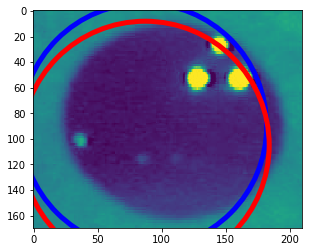

In [16]:
from matplotlib.patches import Circle
# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')

# Show the image
ax.imshow(crop_img)

# Now, loop through coord arrays, and create a circle at each x,y pair
 
circ1 = Circle((86,90),96, color = 'b', linewidth=5, fill=False)
ax.add_patch(circ1)
circ2 = Circle((87,105),97, color = 'r', linewidth=5, fill=False)
ax.add_patch(circ2)

# Show the image
plt.show()

# Ex. 3.2 Generalized Hough Transform

* implement the Generalized Hough Transform as described in the lecture for localizing a given template
* find the given template (see below) and mark its location in the image "animals.png" (**RESULT**)

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import sobel_h, sobel_v, gaussian
from skimage.feature import canny
from skimage.color import rgb2gray
from skimage.draw import circle
import numpy as np

full_circle = 2 * np.pi


def get_theta(img, gauss_sigma):
    blurred = gaussian(img, gauss_sigma)
    g_x, g_y = sobel_v(blurred), sobel_h(blurred)
    return (np.arctan2(g_y, g_x) + full_circle) % full_circle


def edges(img, gauss_sigma):
    return canny(img, gauss_sigma).nonzero()


def create_R_table(img, num_steps, gauss_sigma=1):
    theta = get_theta(img, gauss_sigma)

    edge_y, edge_x = edges(img, gauss_sigma)
    cy, cx = edge_y.mean(), edge_x.mean()

    step_size = full_circle / num_steps
    table = {index: [] for index in range(num_steps)}
    for y, x in zip(edge_y, edge_x):
        v = (cy - y, cx - x)
        bin_index = int(theta[y, x] // step_size)
        table[bin_index].append(v)
    return table


def GHT(img, table, gauss_sigma=1):
    accumulator = np.zeros_like(img)
    H, W = accumulator.shape

    theta = get_theta(img, gauss_sigma)
    edge_y, edge_x = edges(img, gauss_sigma)
    num_steps = len(table)
    step_size = full_circle / num_steps
    for y, x in zip(edge_y, edge_x):
        bin_index = int(theta[y, x] // step_size)
        for (offset_y, offset_x) in table[bin_index]:
            cy = int(y + offset_y)
            cx = int(x + offset_x)
            if H > cy >= 0 and W > cx >= 0:
                accumulator[cy, cx] += 1

    return accumulator

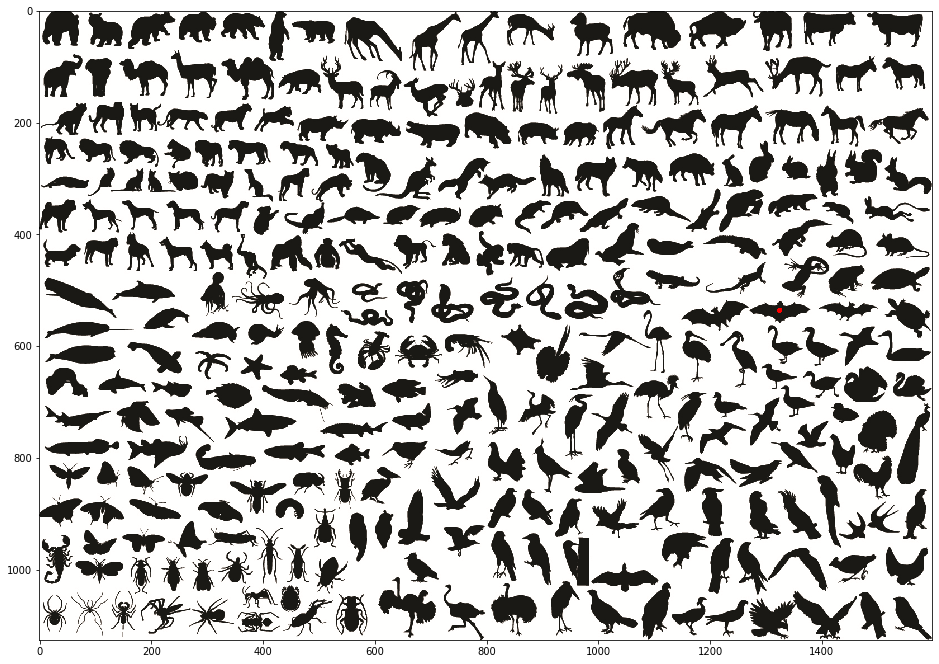

In [2]:
animals = io.imread('images/animals.png')
bat = animals[519:561, 1271:1381]

angle_steps = 180
table = create_R_table(rgb2gray(bat), angle_steps)
acc = GHT(rgb2gray(animals), table)

cy, cx = np.unravel_index(np.argmax(acc), acc.shape)
animals[circle(cy, cx, 5)] = np.array([255, 0, 0])

plt.figure(figsize=(16, 16))
plt.imshow(animals)
plt.show()

## BONUS 
* now implement an extended version of the GHT that find rotated and scaled variants of the template. 
* find Italy (see "italy.jpg") and the map of Europe ("europe_map_political.gif")
* note that you can binarize your italy template by using a simple color lookup
* draw the location of italy on the map and print its scale and orientation (**BONUS**)